# Part 3: Analysis

    In this notebook we will do univariate and bi-variate analysis.
    We will check out distribution of each categorical col
    Then we will check distribution of numerical col
    Then we will check cat and num cols with the loan status
    Then we will check interdependencies of cat-cat or cat-num or num-num

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#adding path of our function and plot files in dir src and data files in dir cleaned_data
import sys
sys.path.insert(0, '/Users/manish/Documents/Projects/data_science/Lending_club_case_study/src')


pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
path = '/Users/manish/Documents/Projects/data_science/Lending_club_case_study/data/clean_data/loan_for_analysis.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2        old           RENT     24000.0            Verified   
1     C        C4        new           RENT     30000.0     Source Verified   
2     C        C5        old           RENT     12252.0        Not Verified   
3     C        C1        old           RENT     49200.0     Source Verified   
4     A        A4        new           RENT     36000.0     Source Verified   

   loan_status         purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0   Fully Paid     credit_card  27.65            0               1         3   
1  Charged Off             car   1.00            0               5         3   
2   Fully Paid  small_business   8.72            0               2         2   
3   Fully Paid           other  20.00            0               1        10   
4   Fully Paid         wedding  11.20            0               3         9   

   pub_rec  revol_bal  revol_util  total_acc   total_pymnt  total_pymnt_inv  \
0        0      13648        83.7          9   5863.155187          5833.84   
1        0       1687         9.4          4   1008.710000          1008.71   
2        0       2956        98.5         10   3005.666844          3005.67   
3        0       5598        21.0         37  12231.890000         12231.89   
4        0       7963        28.3         12   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
4          5000.00         632.21                0.00        0.00   

   collection_recovery_fee  last_pymnt_amnt  pub_rec_bankruptcies  
0                     0.00           171.62                   0.0  
1                     1.11           119.66                   0.0  
2                     0.00           649.91                   0.0  
3                     0.00           357.48                   0.0  
4                     0.00           161.03                   0.0

In [5]:
#dividing to categorical and numerical columns

cat_cols = list(df.columns[df.dtypes == 'object'])
num_cols = list(df.columns[df.dtypes != 'object'])

## 1. Univariate Analysis


In [6]:
def plot_categorical(df, hue = None):
    
    for i in cat_cols:
        if i != 'purpose':
            sns.catplot(data = df,
                   x =  i, 
                   kind = 'count', palette = sns.color_palette('Pastel1', n_colors = 3),
                   height = 5, hue = hue,
                   aspect = 1.5, order = df[i].value_counts().index,
                   )
        else:
            sns.catplot(data = df,
                   y =  i, 
                   kind = 'count', palette = sns.color_palette('Pastel1', n_colors = 3),
                   height = 5, hue = hue,
                   aspect = 1.5, order = df[i].value_counts().index,
                   )
        
        #if input('Proceed to save as .png ?(y,n) ').lower() == 'y':
            #plt.savefig(f'{i}.png', dpi = 500)
        
        #else:
        plt.show()


In [7]:
def plot_numerical(df, y = None):
    
    for i in num_cols:
    
        
        plt.figure(figsize = (8,10))
        plt.subplot(2,1, 1)
        sns.violinplot(data = df,
             x = i,
             y = y,
             palette = sns.color_palette('Pastel1', n_colors = 3)
             )
        
        plt.subplot(2,1,2)
        sns.distplot(
            x = df[i],
            color = 'teal',
            bins = 10
            )
        plt.xlabel(i)
        
        #if input('Proceed to save as .png ?(y,n) ').lower() == 'y':
            #plt.savefig(f'{i}.png', dpi = 500)
        #else:
        plt.show()


### 1.1 Categorical columns

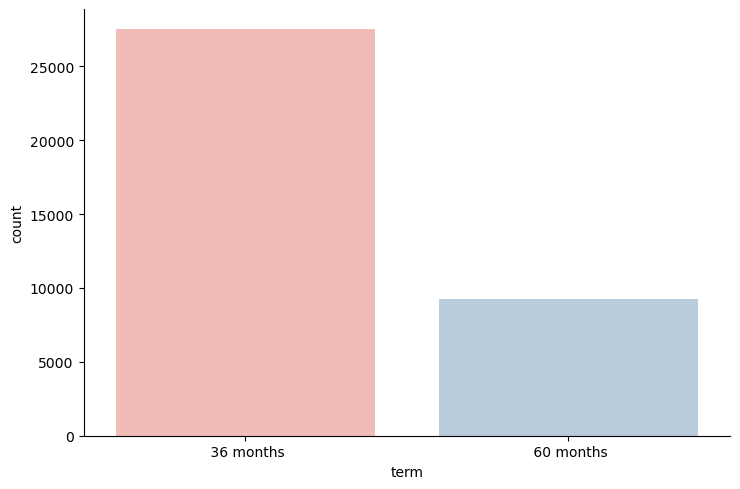

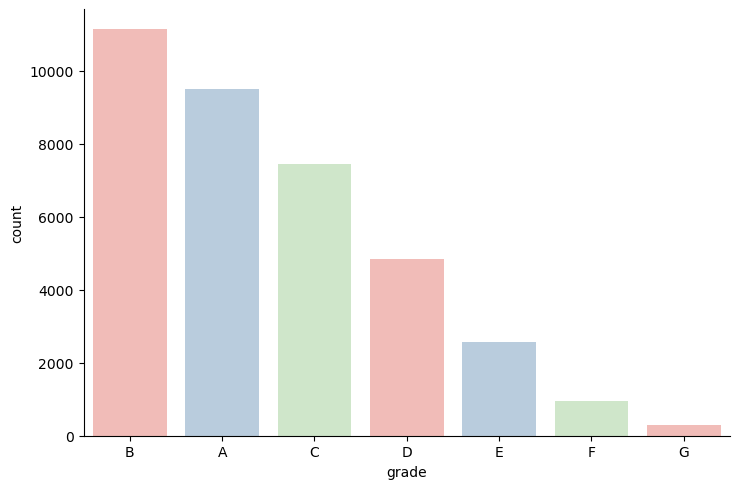

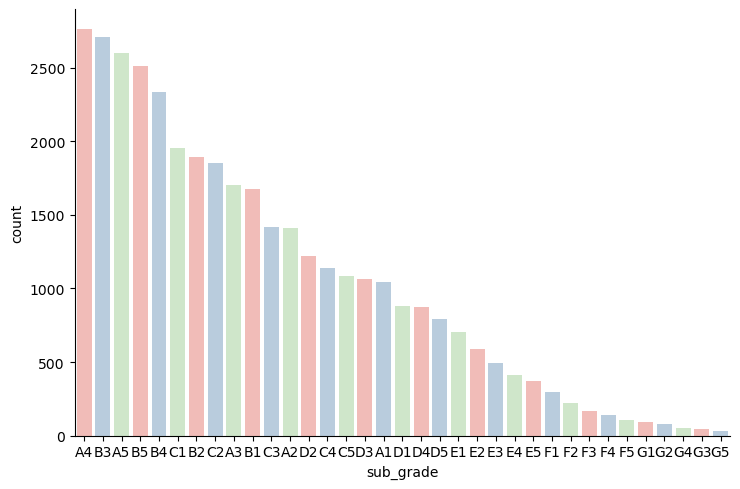

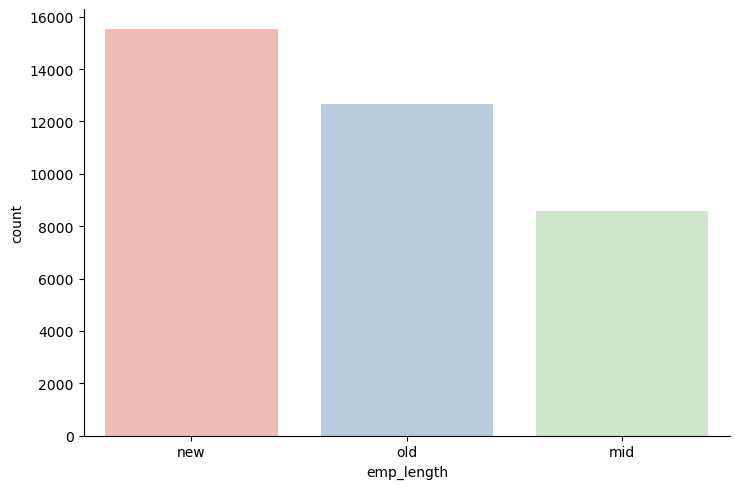

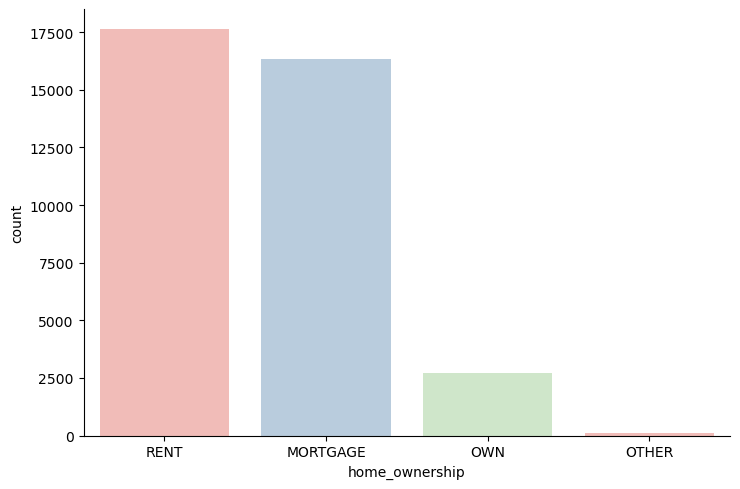

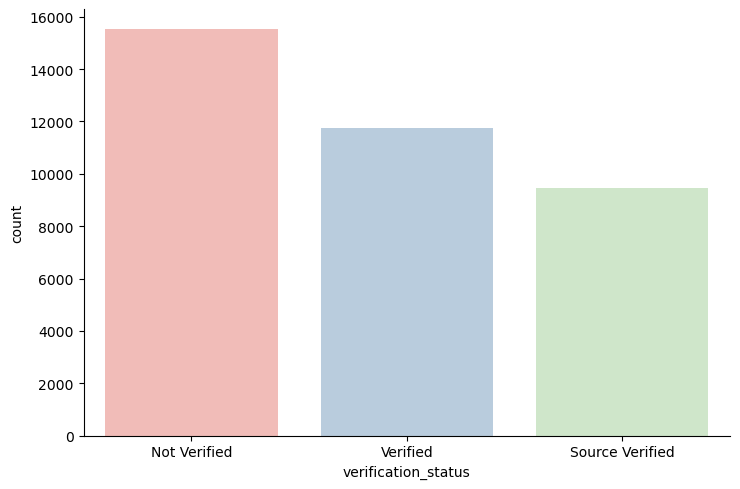

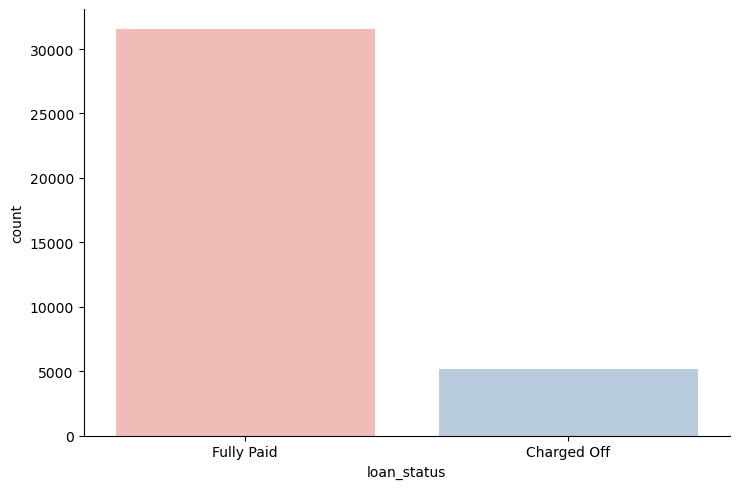

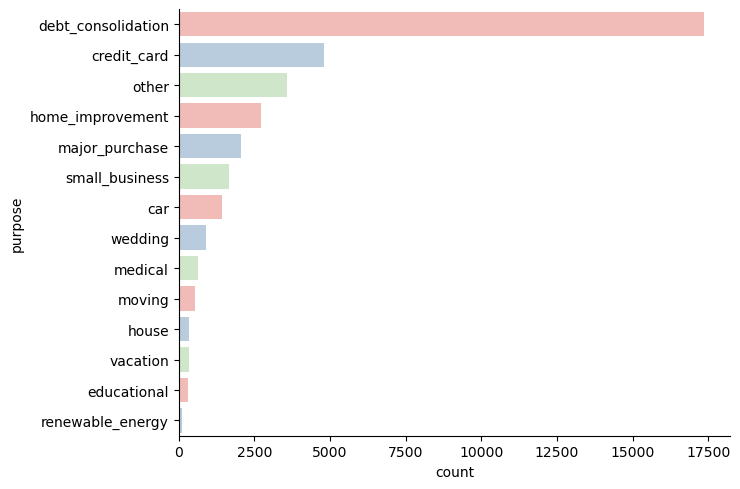

In [8]:
#showing some categorical plots
plot_categorical(df)

### 1.2 Numerical columns

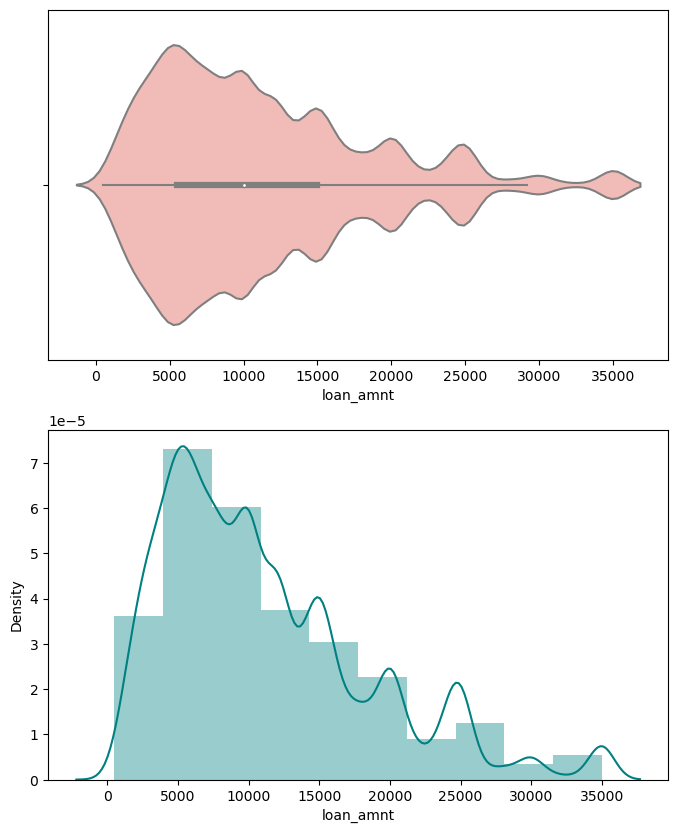

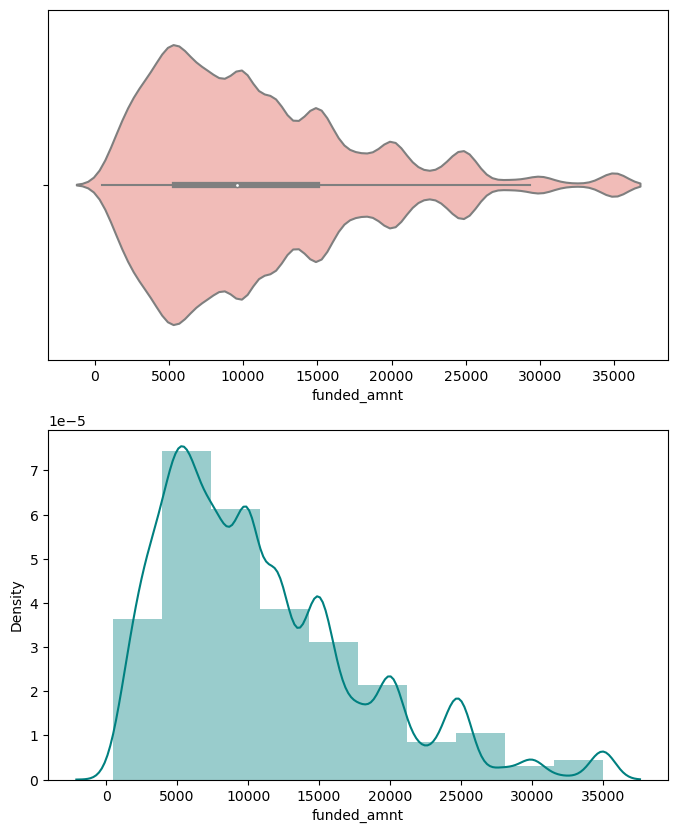

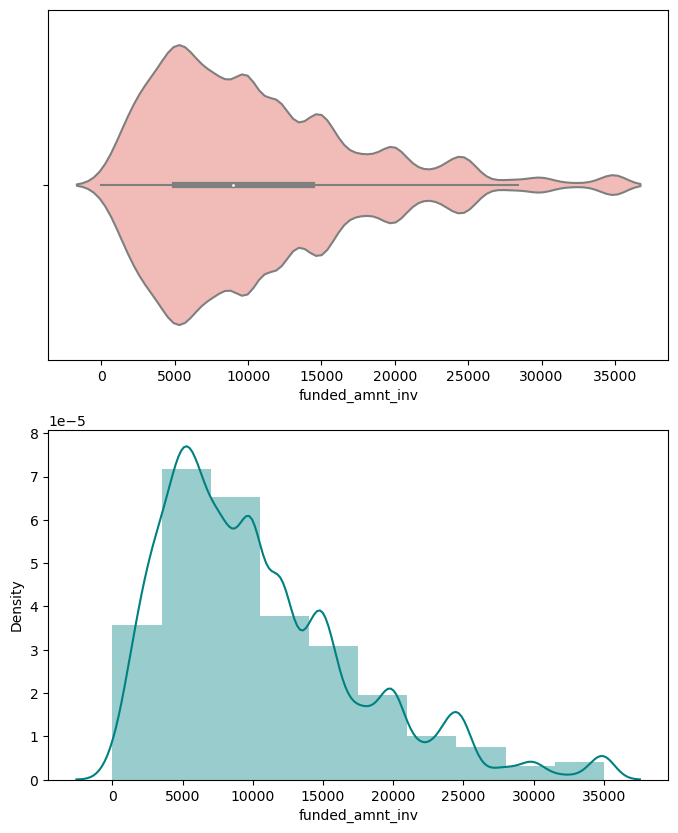

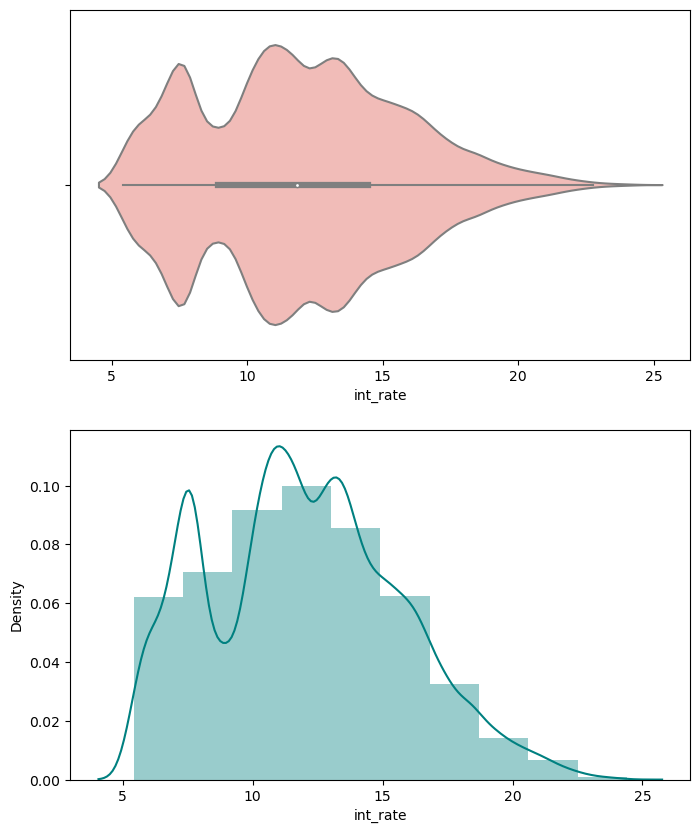

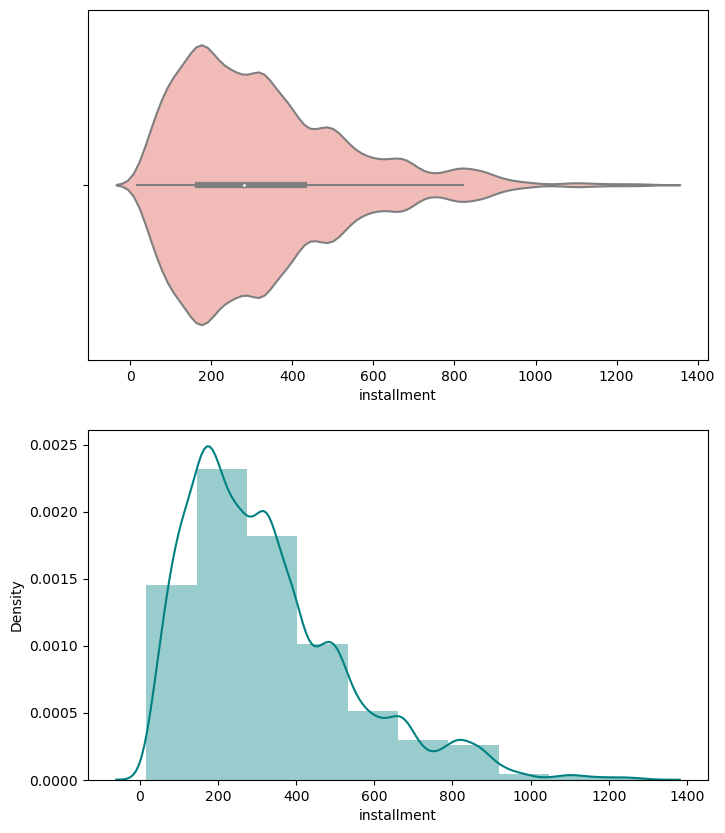

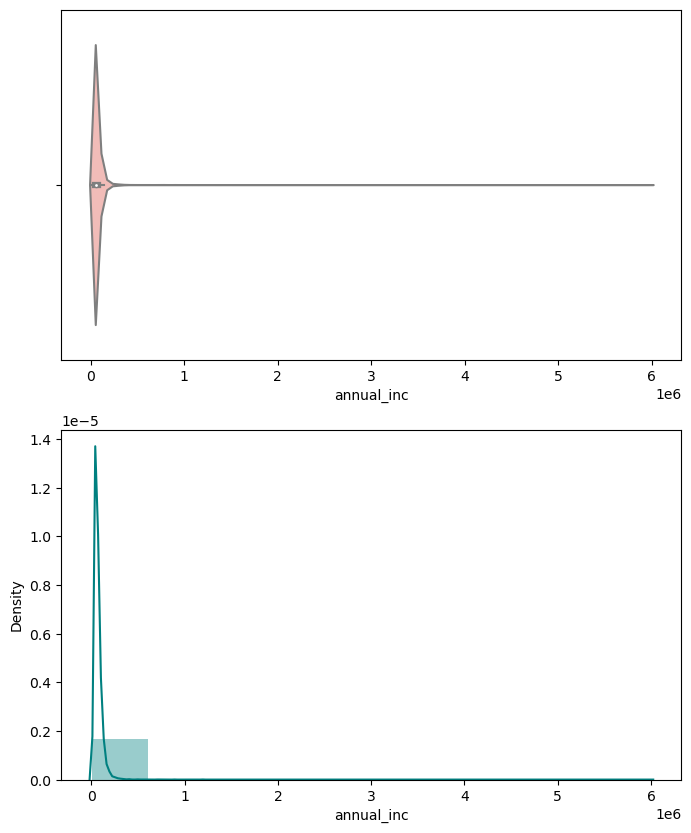

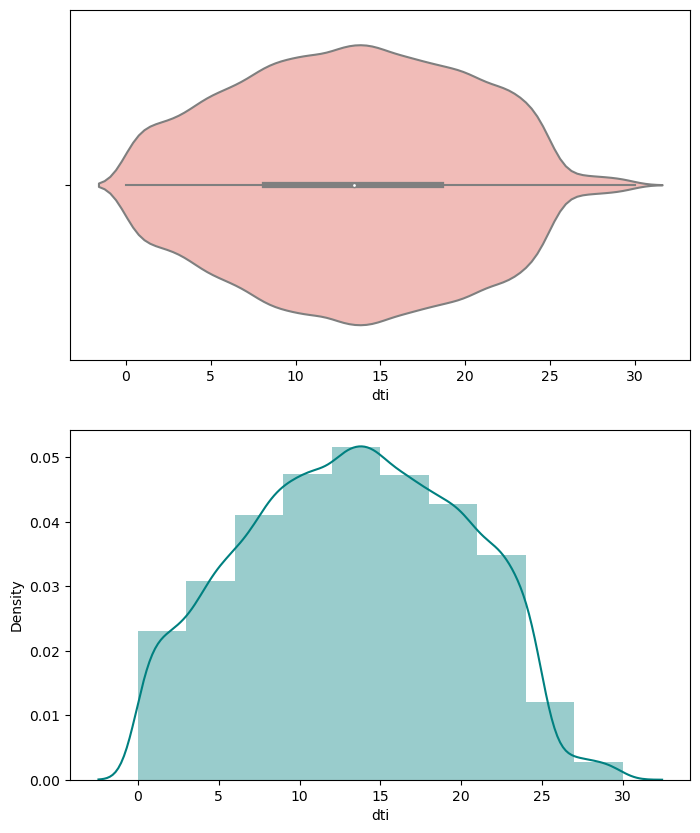

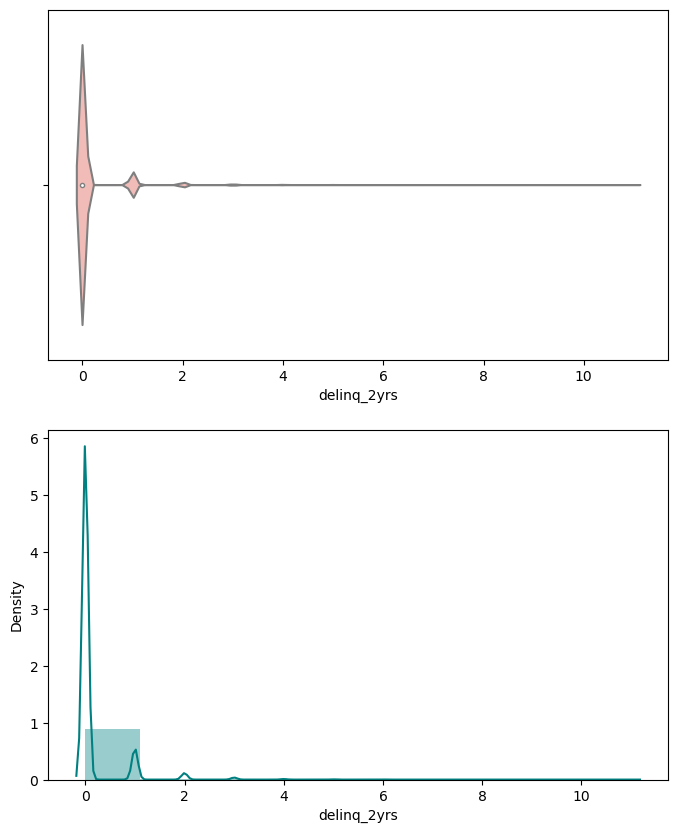

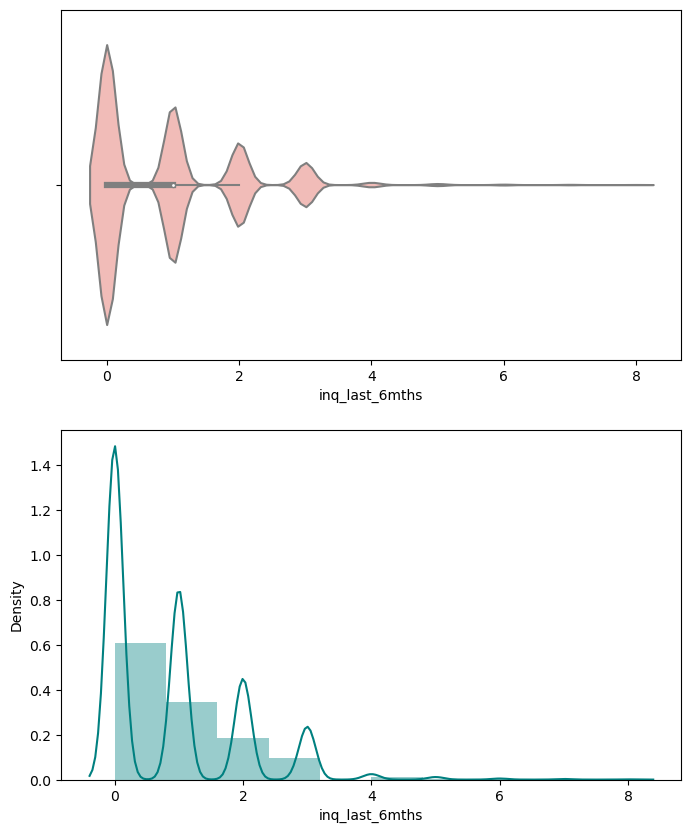

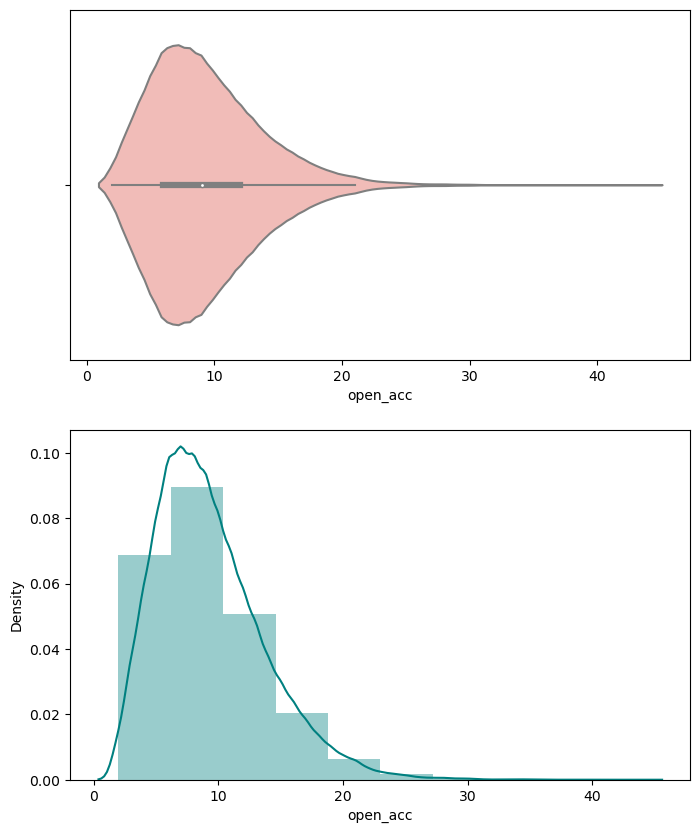

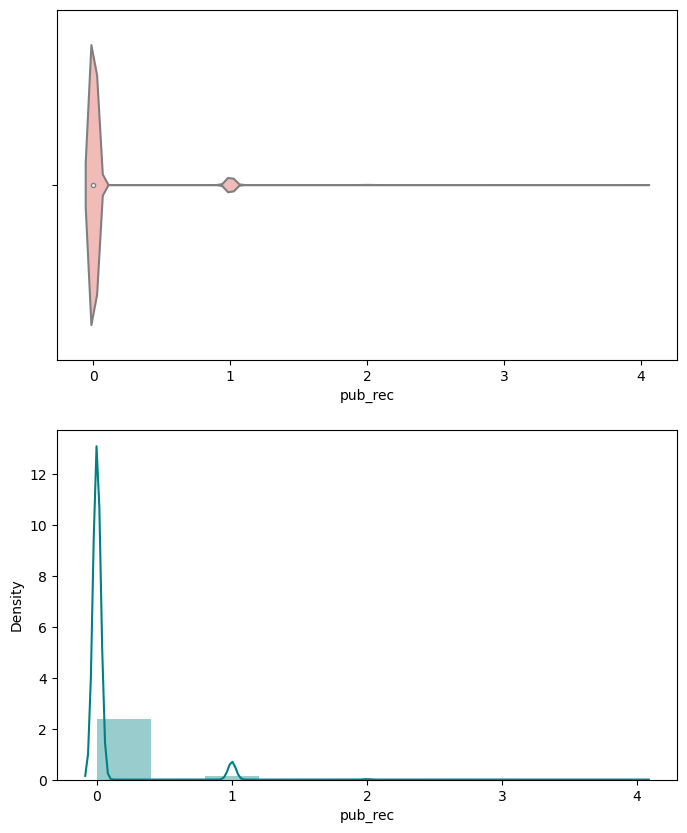

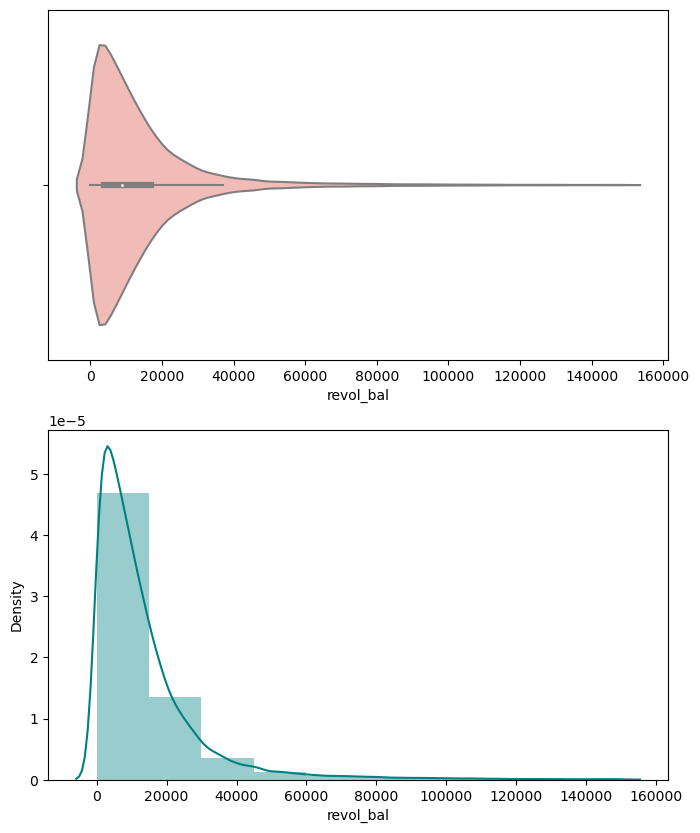

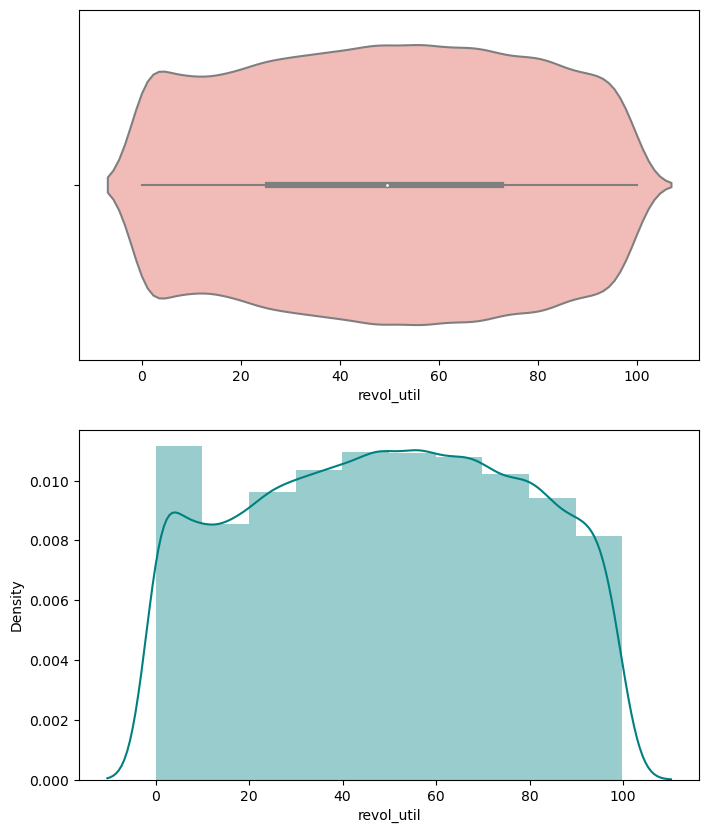

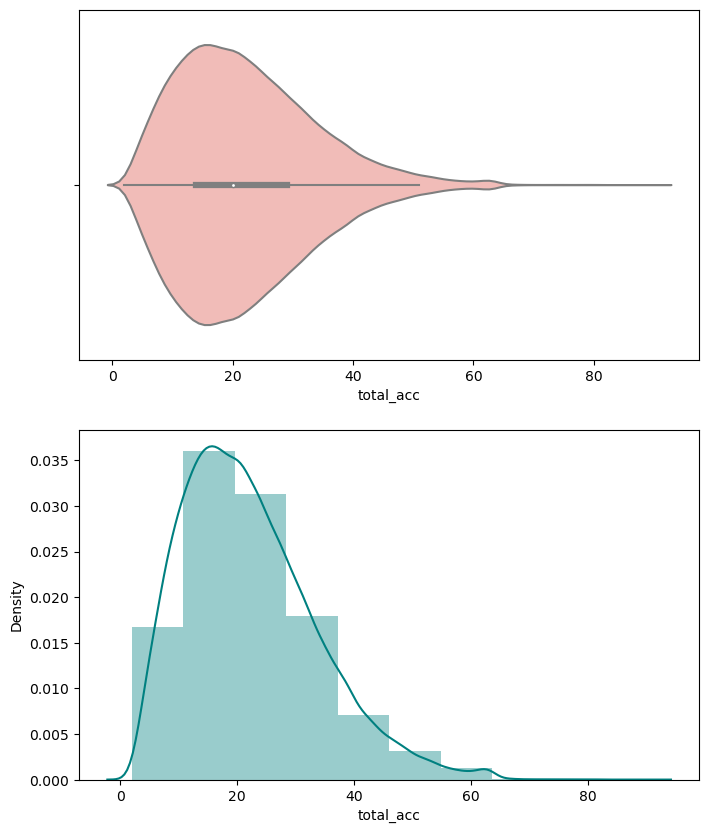

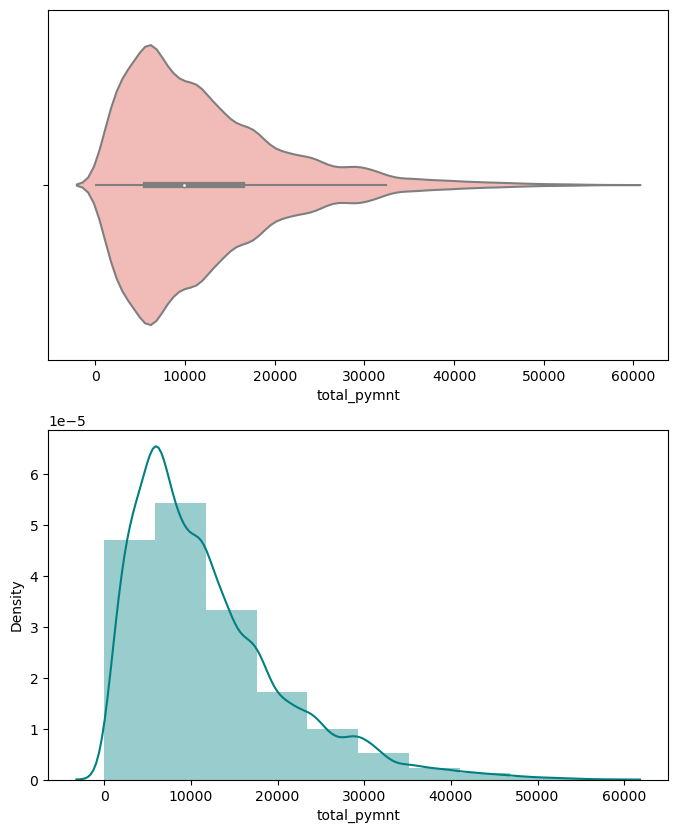

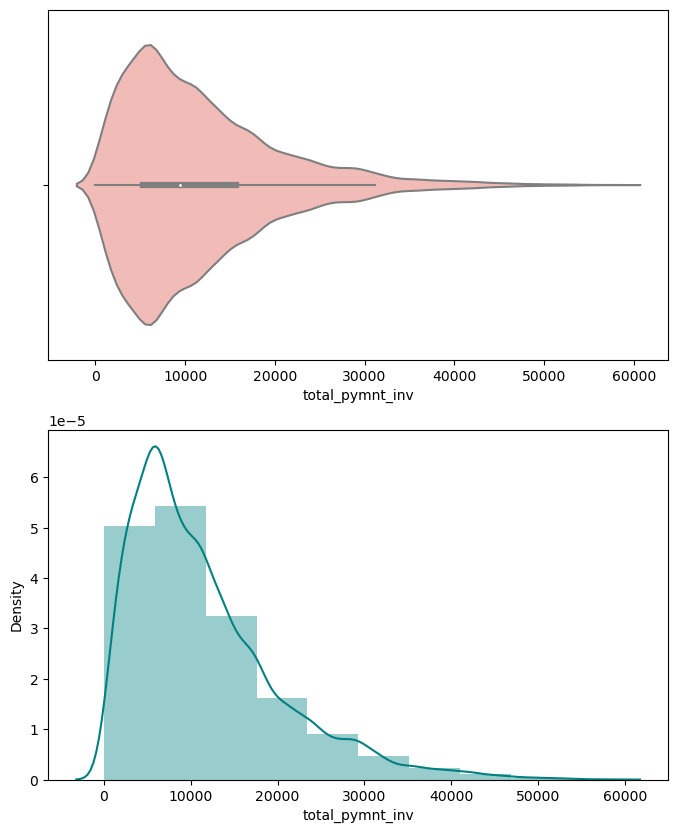

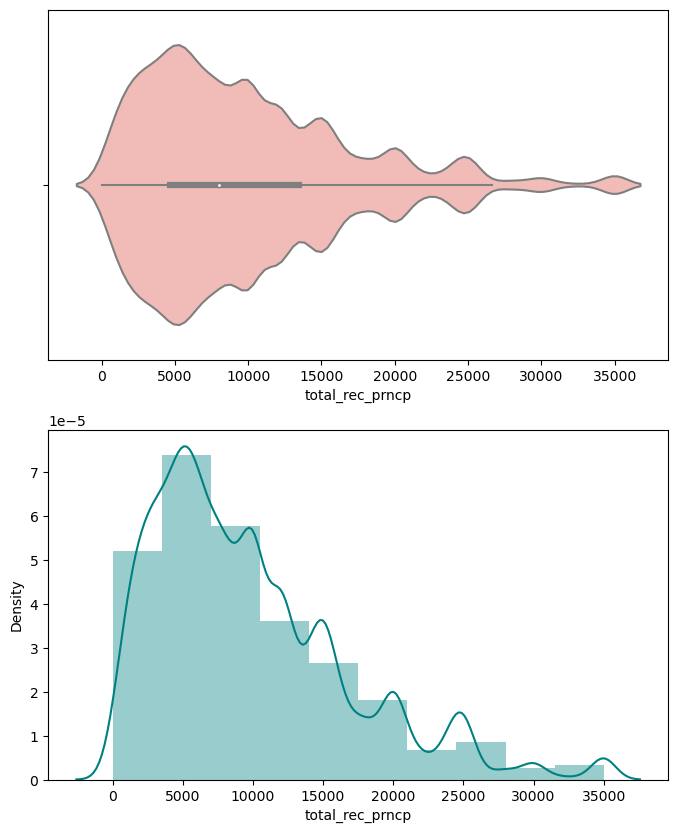

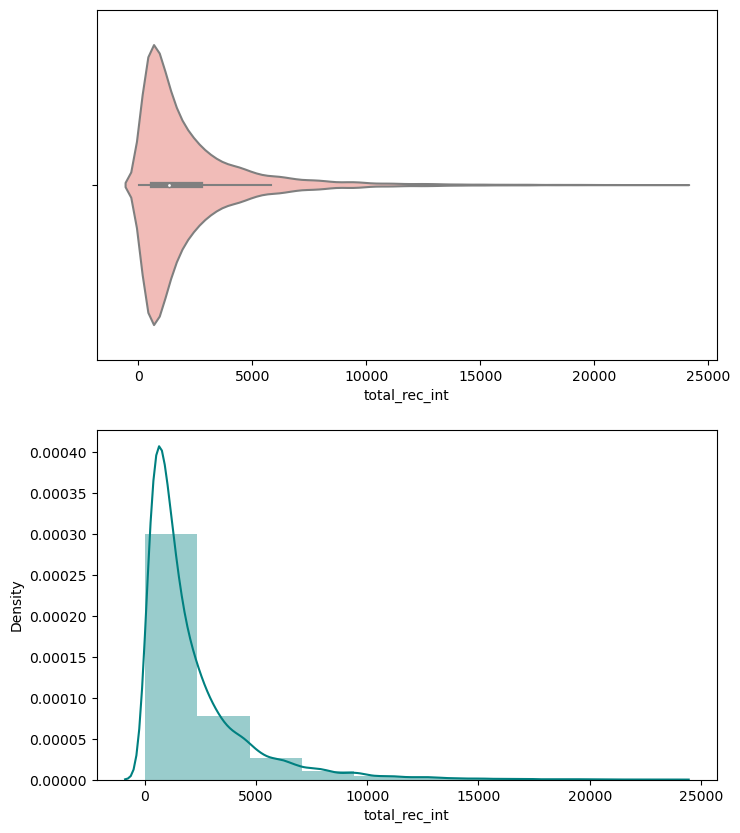

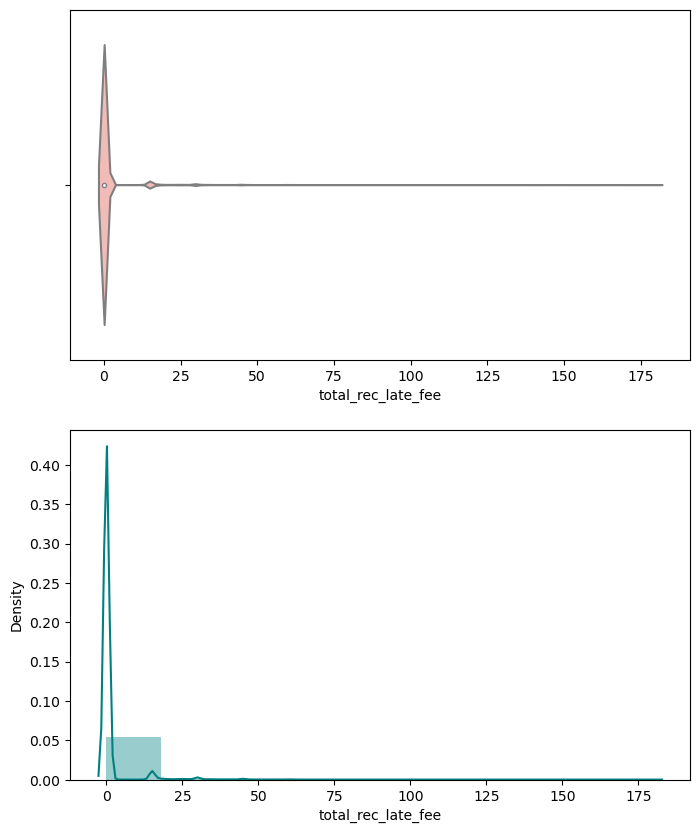

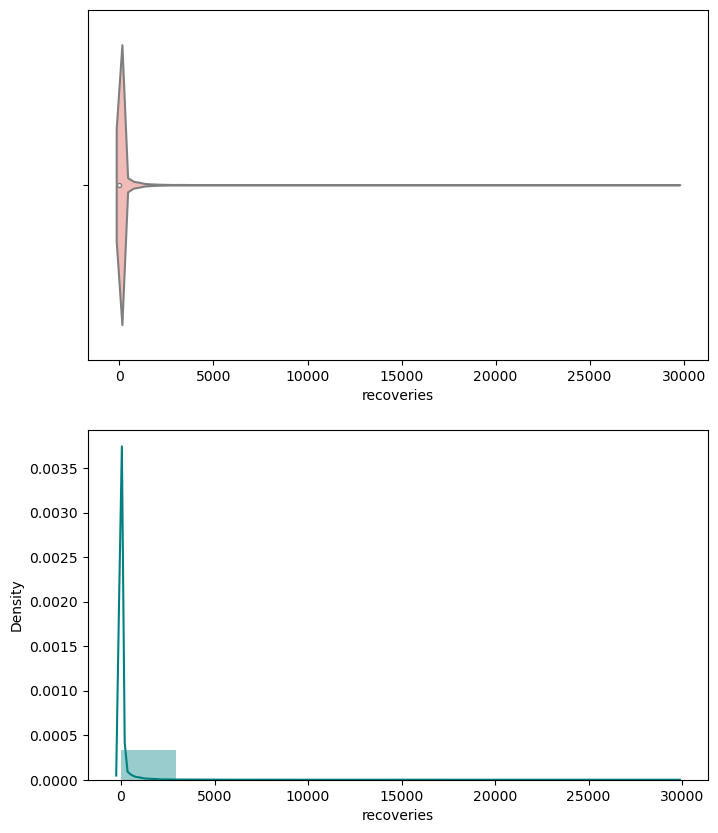

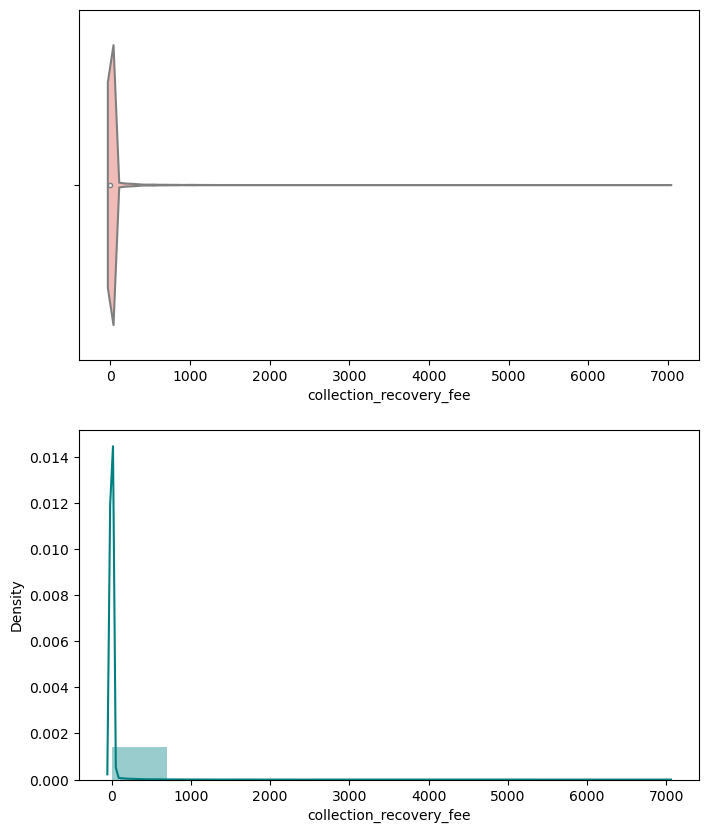

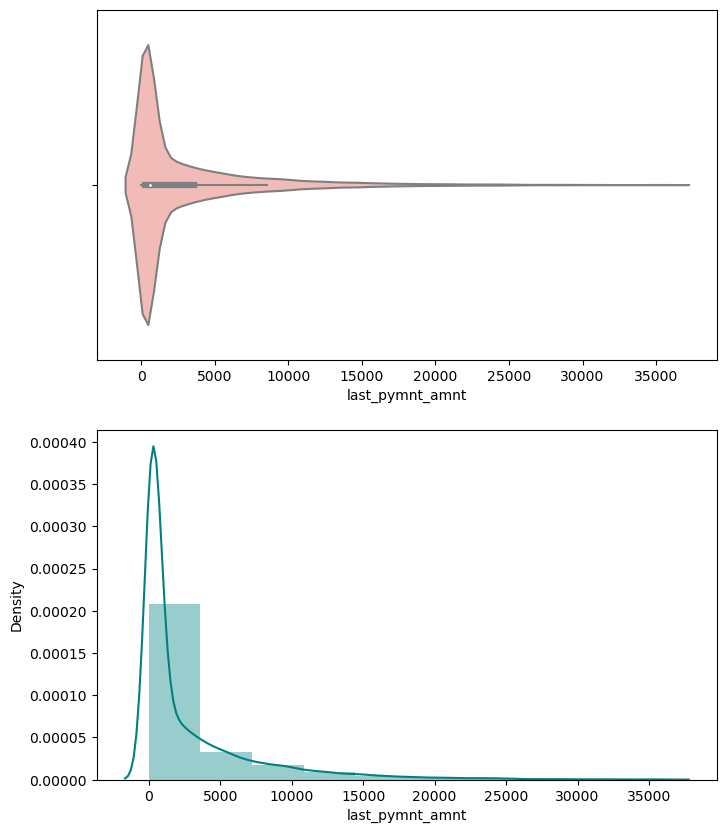

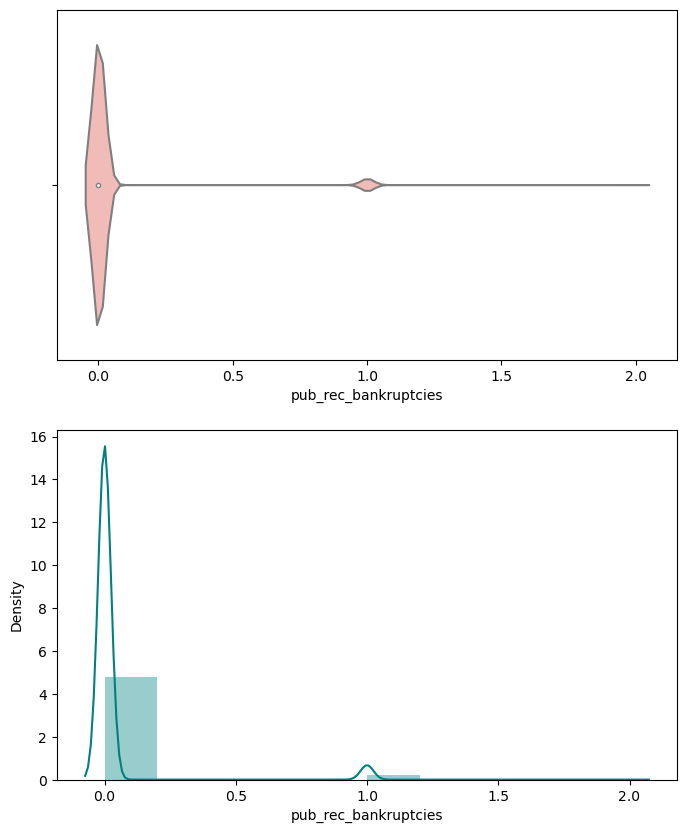

In [9]:
# some plots for numerical cols
plot_numerical(df)

## 2.Bivariate analysis


### 2.1 Categorical columns vs loan_status

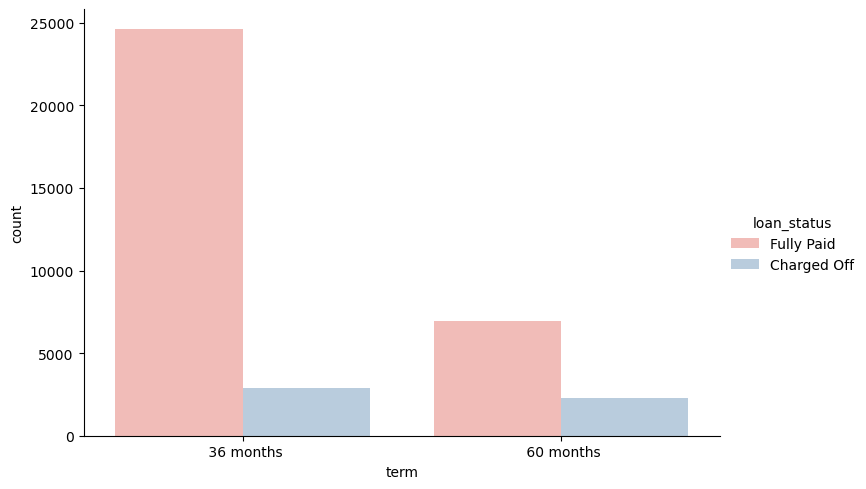

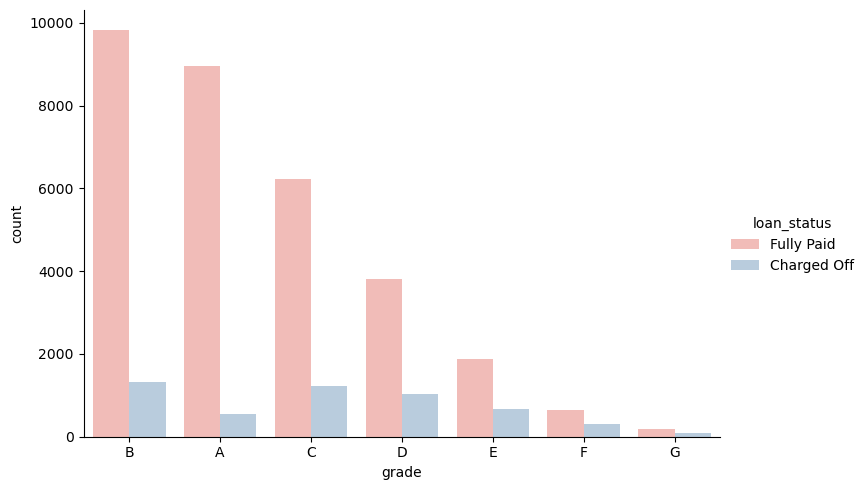

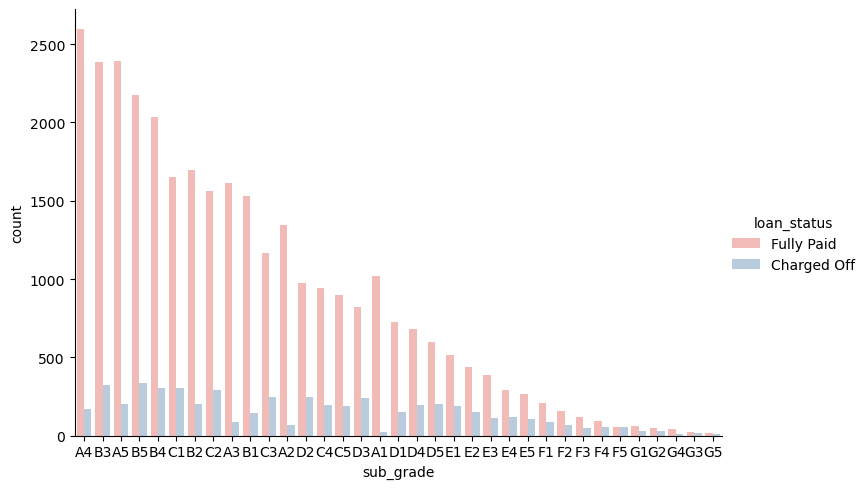

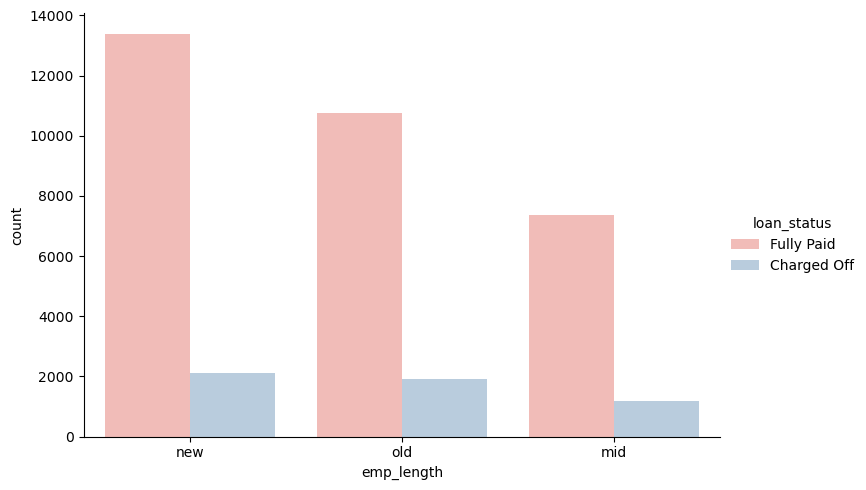

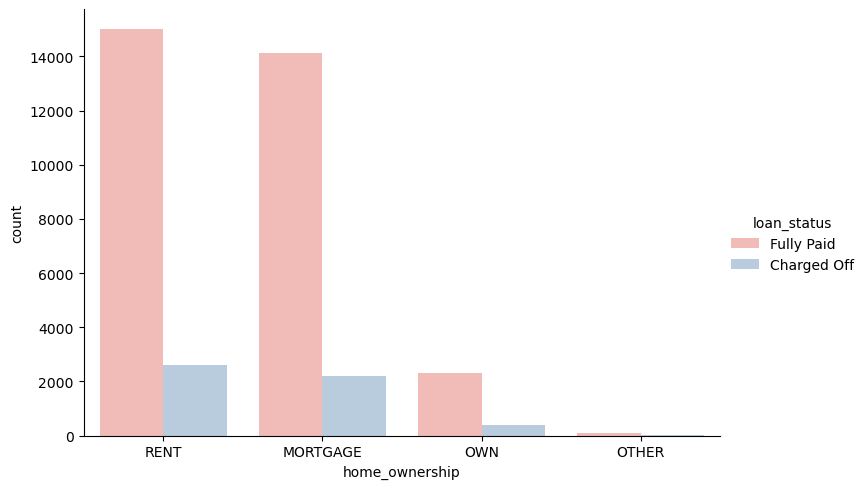

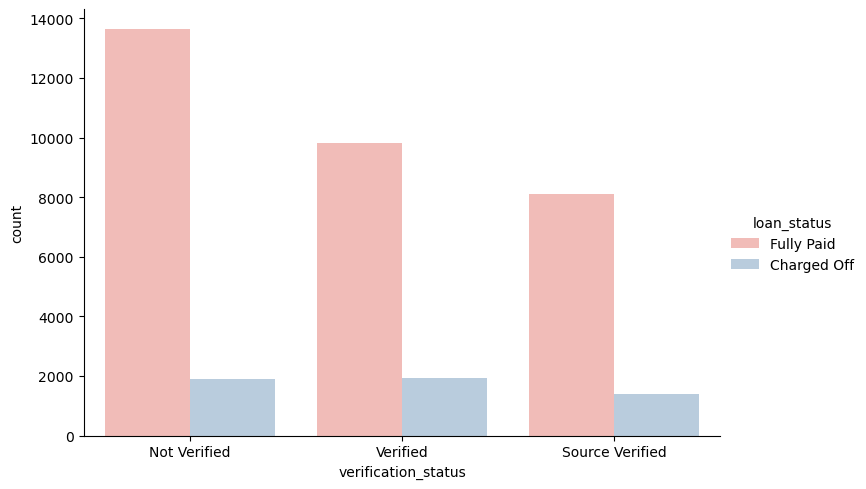

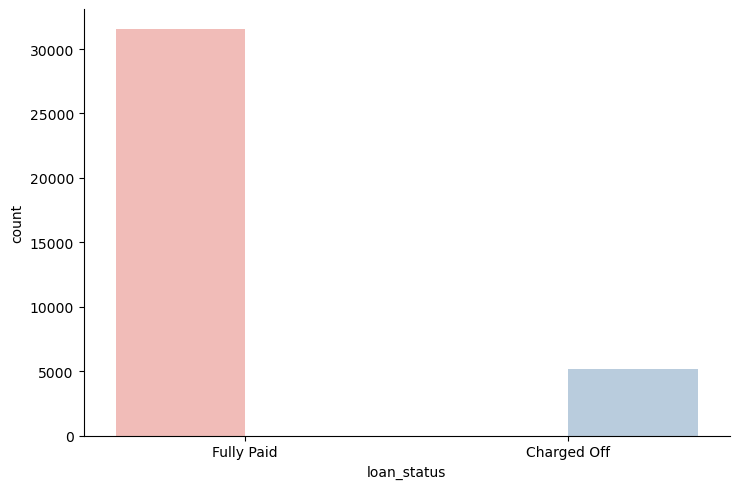

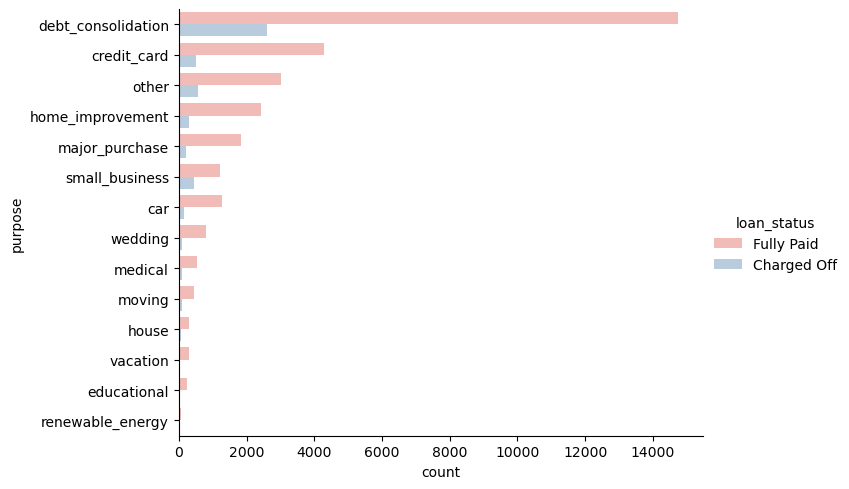

In [10]:
plot_categorical(df, hue = 'loan_status')

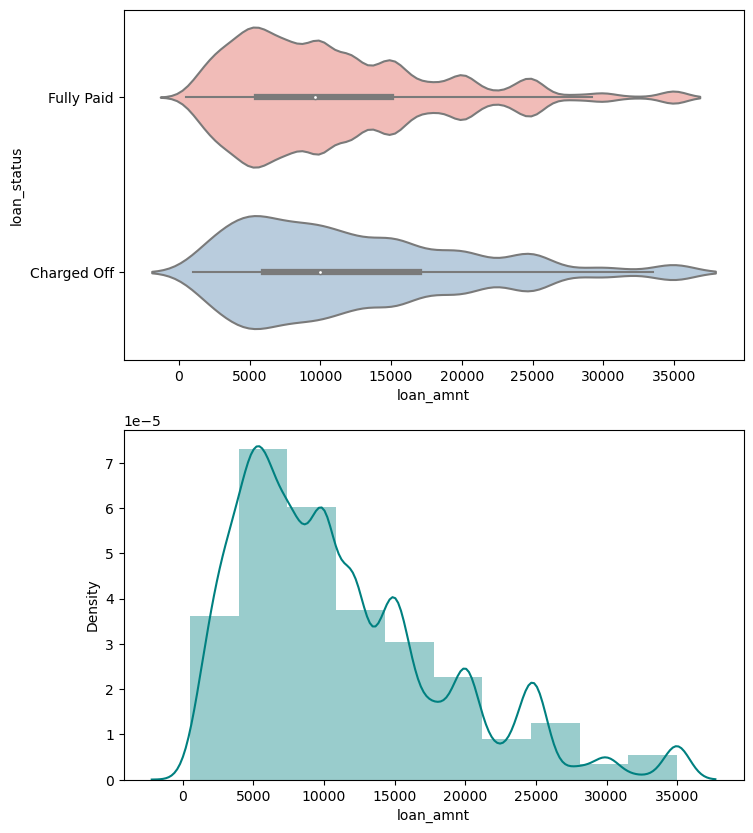

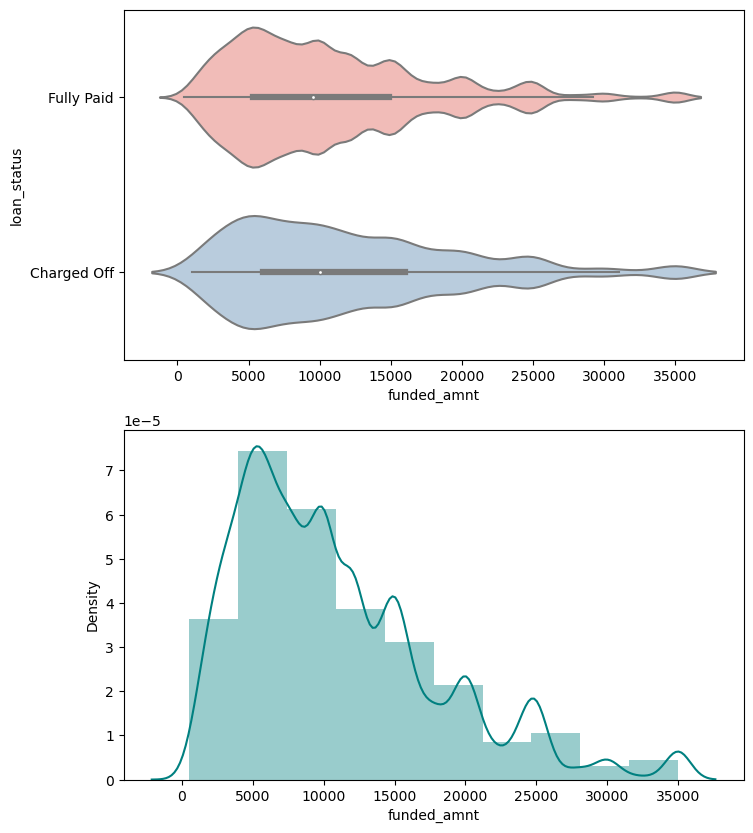

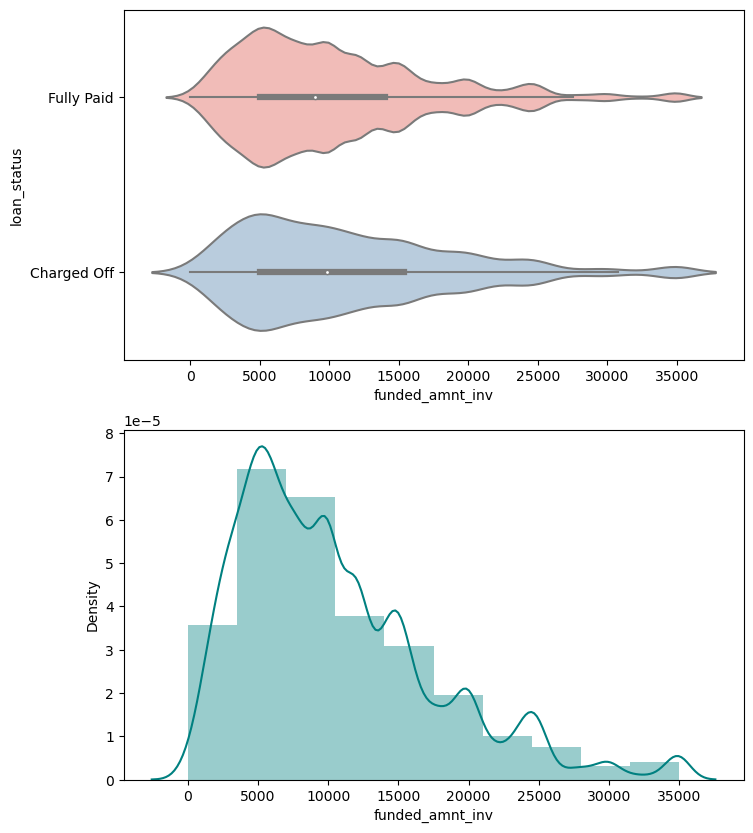

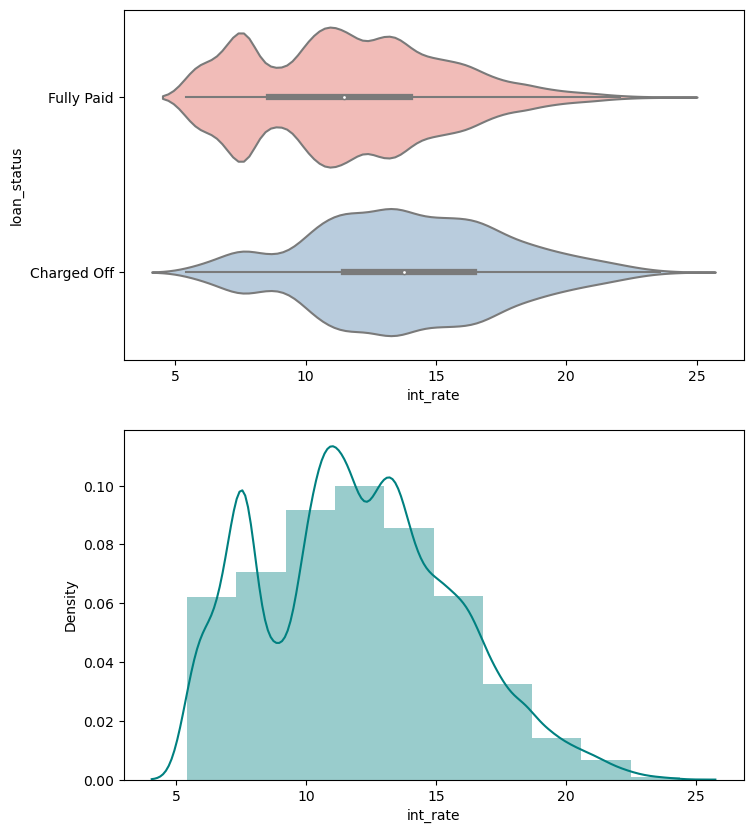

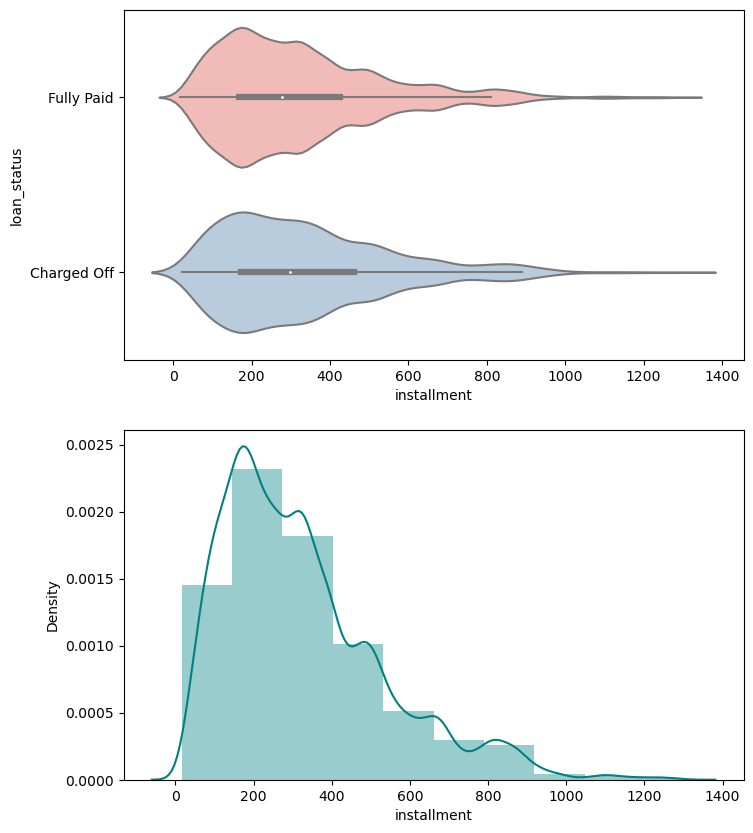

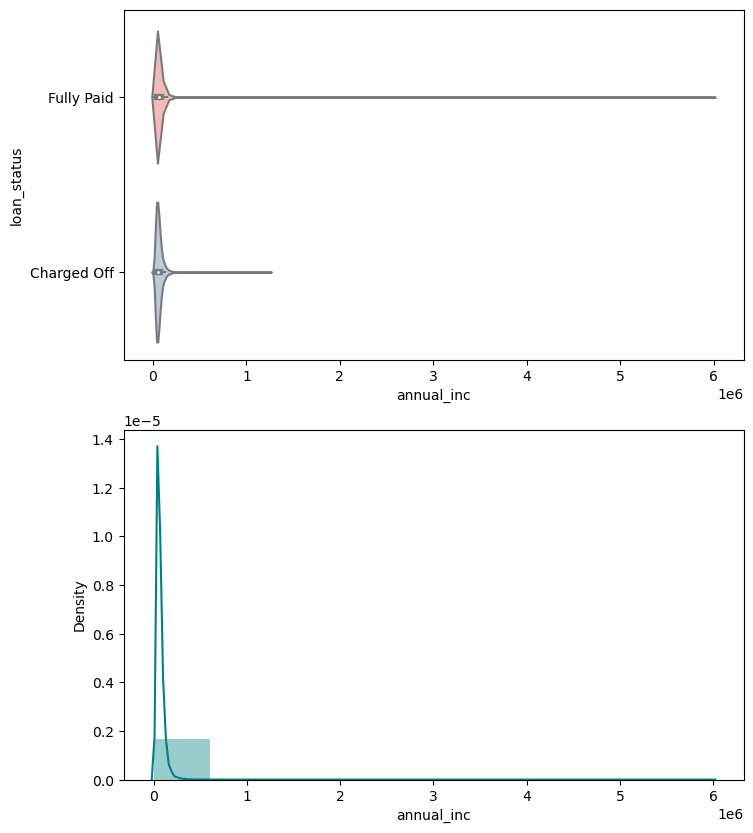

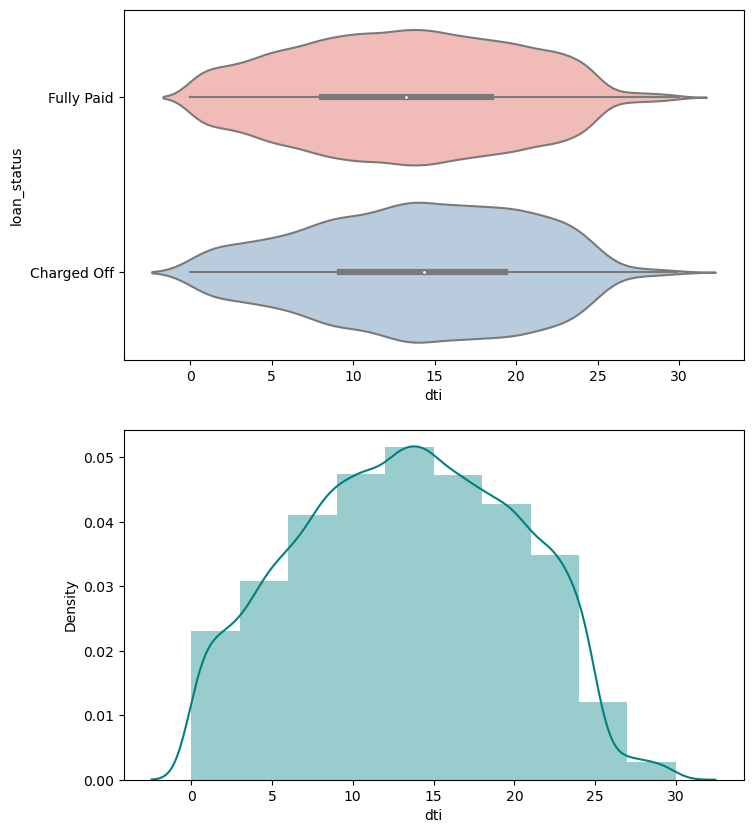

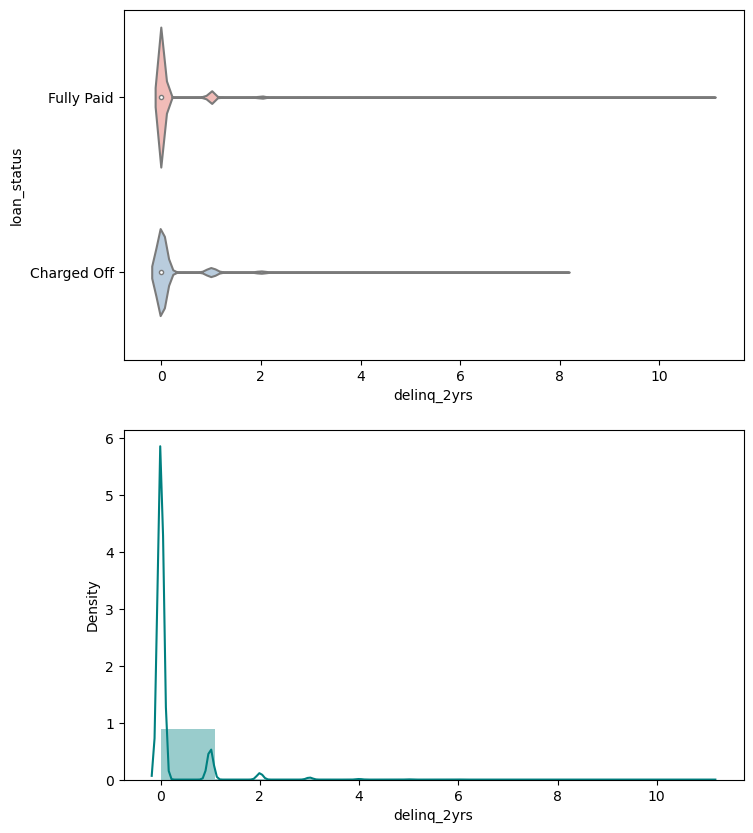

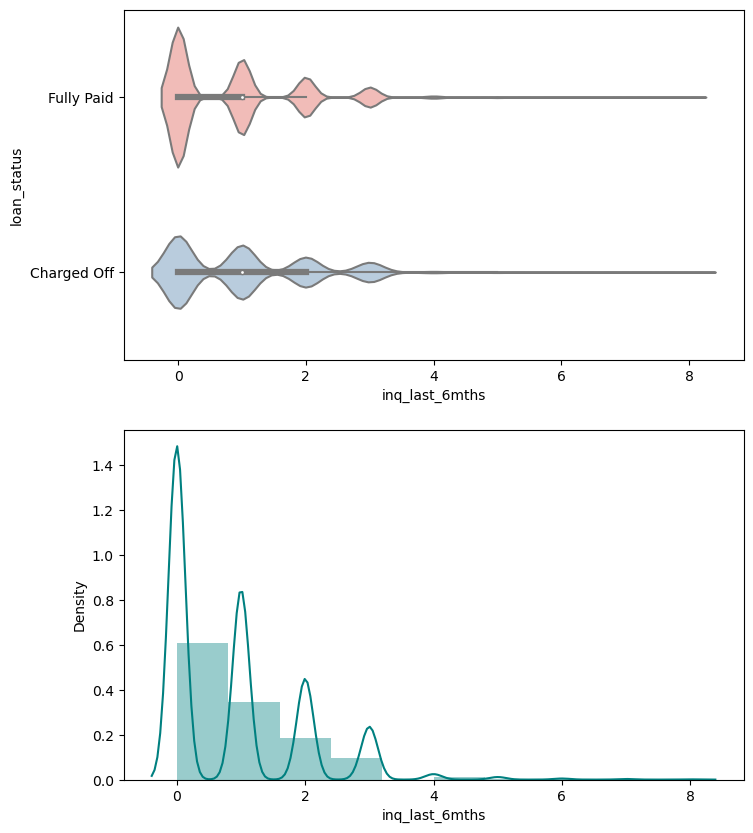

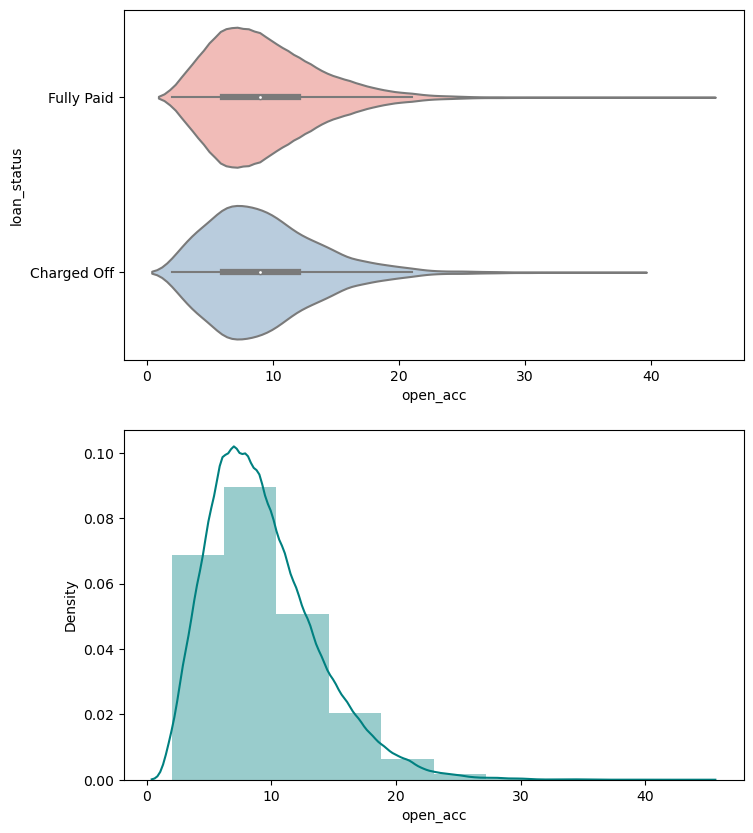

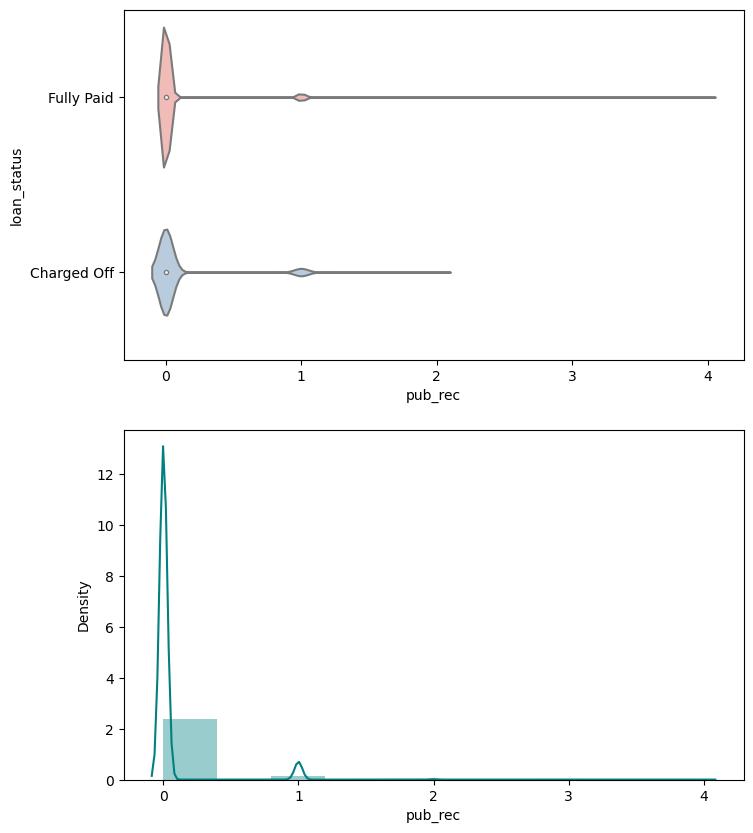

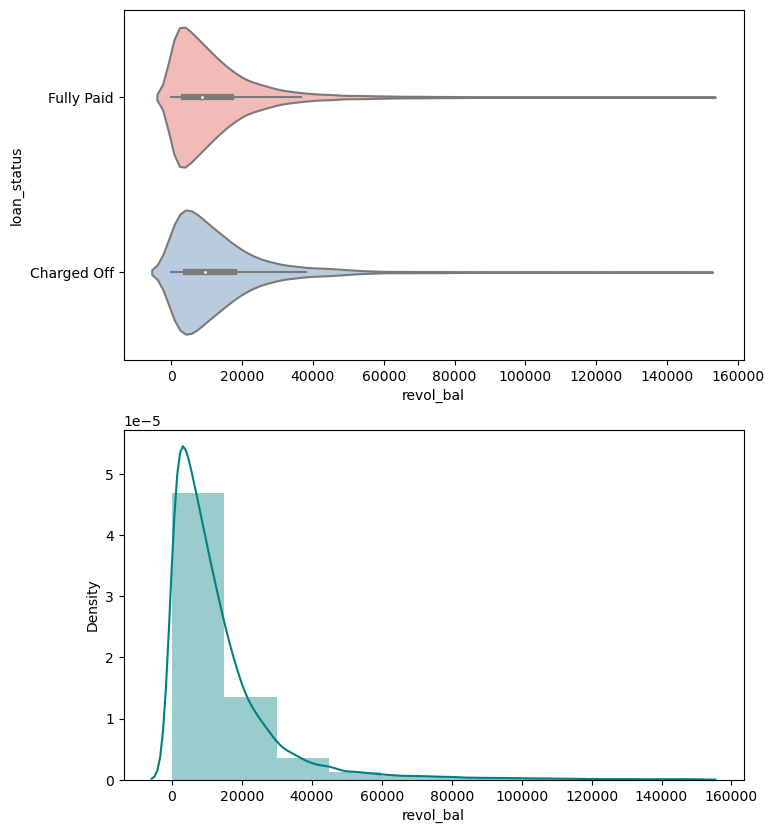

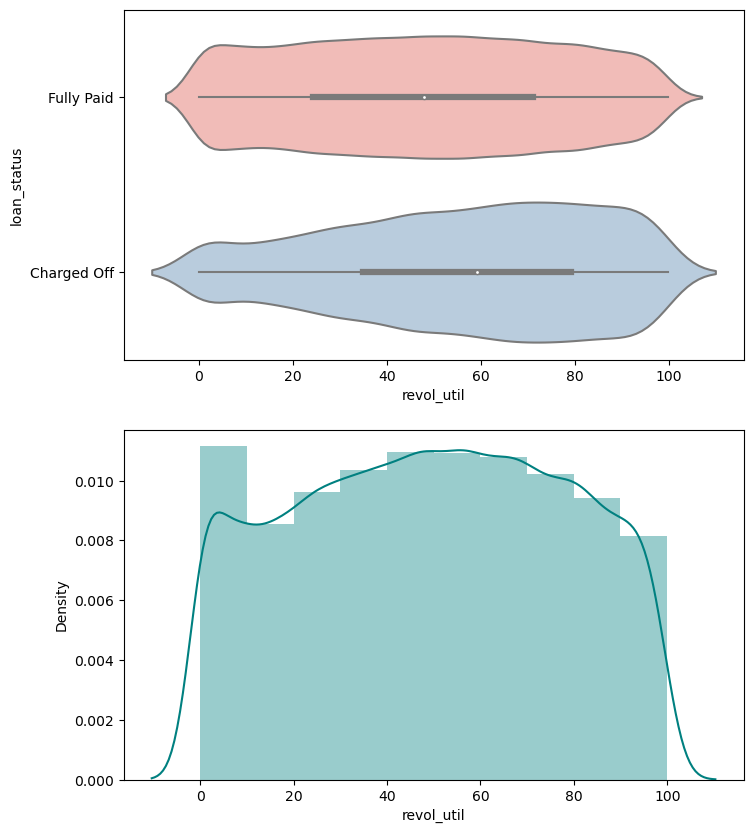

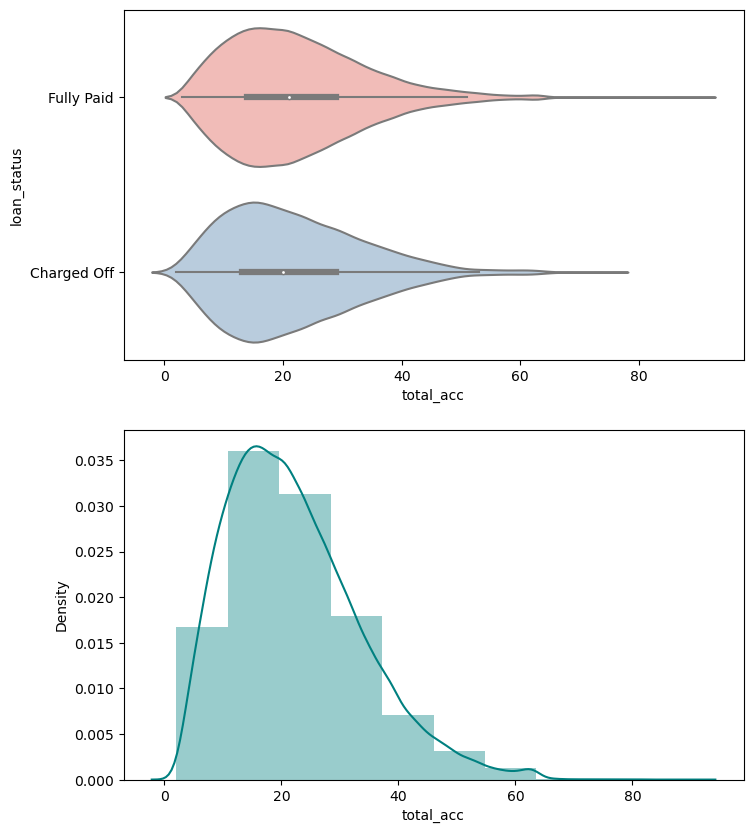

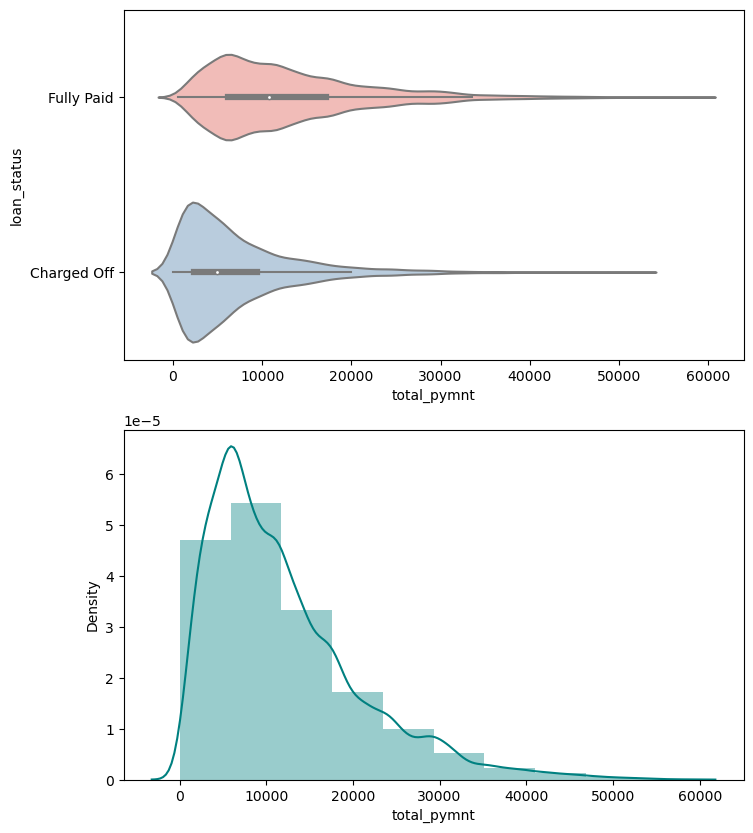

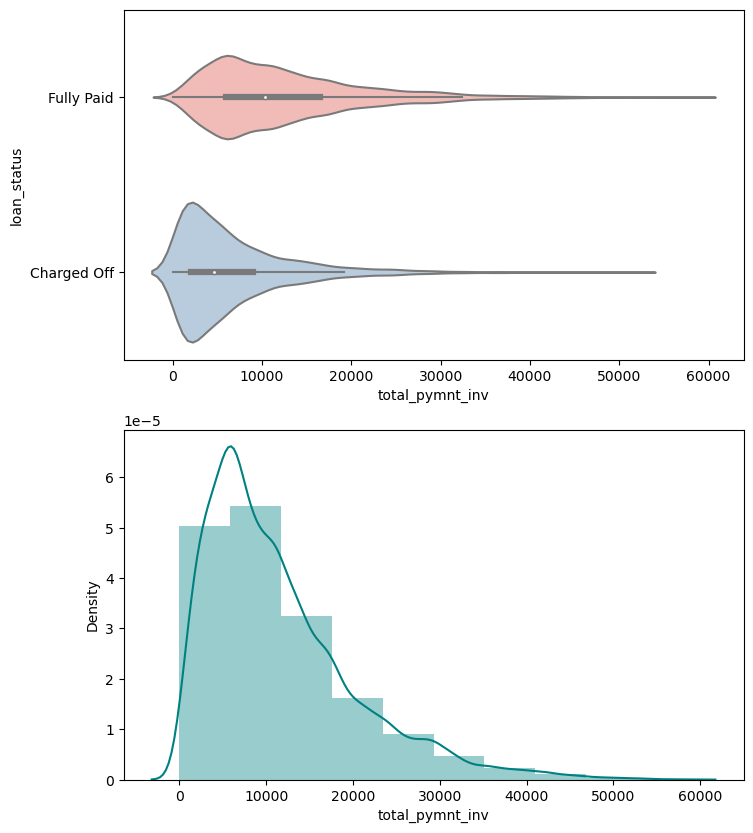

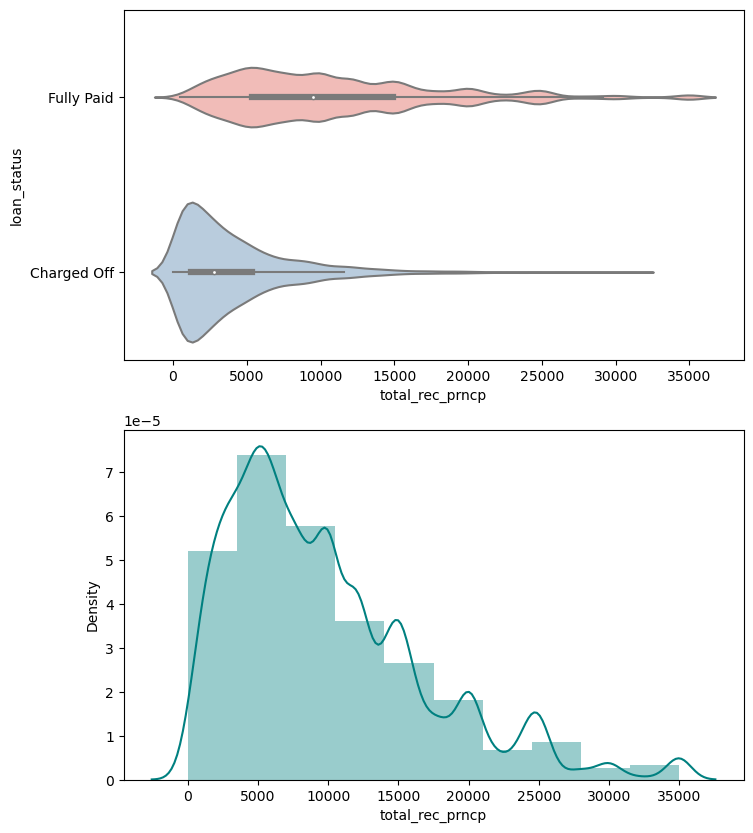

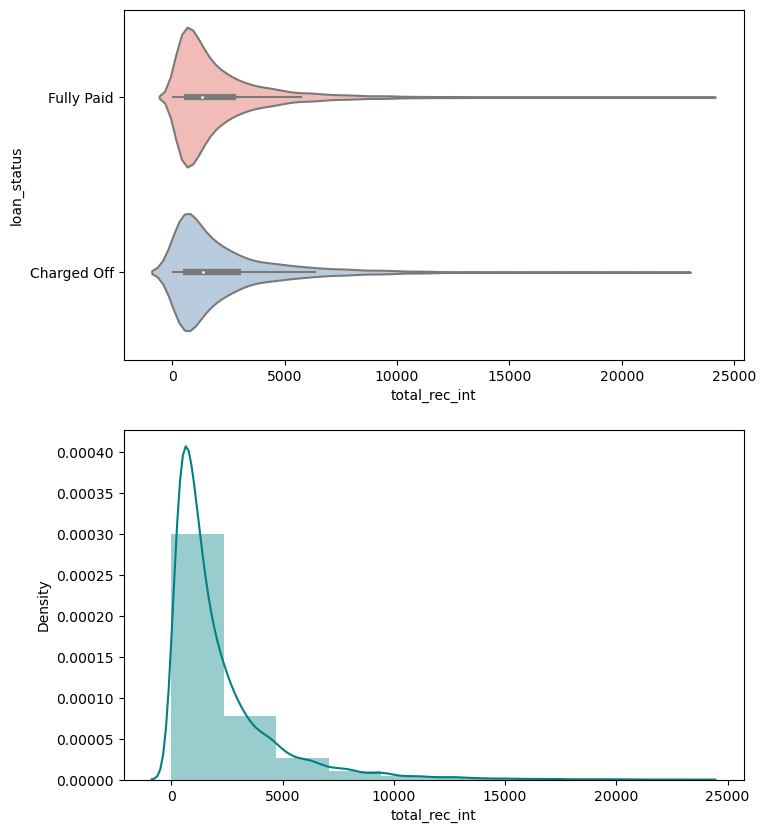

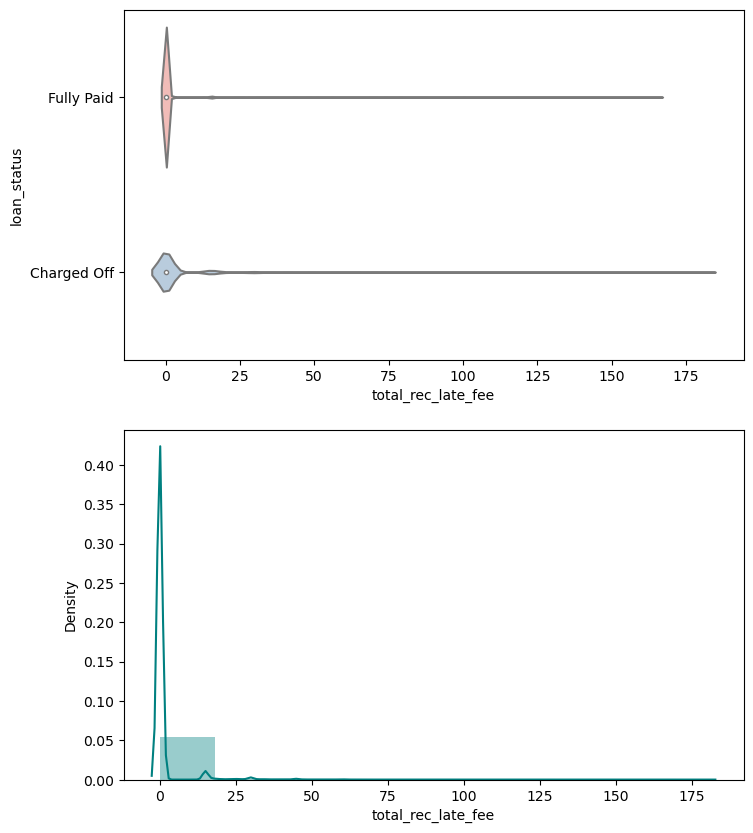

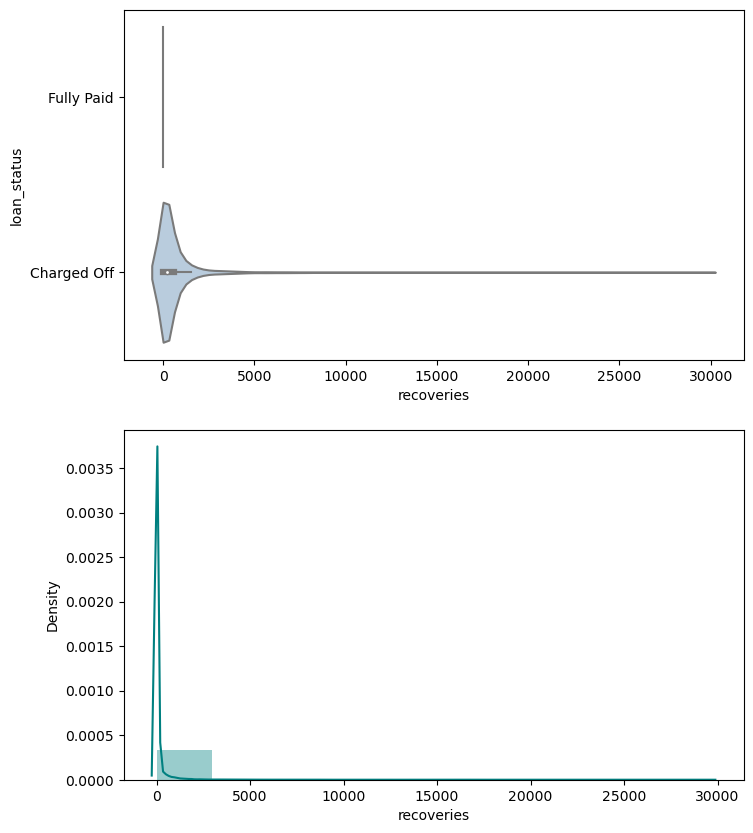

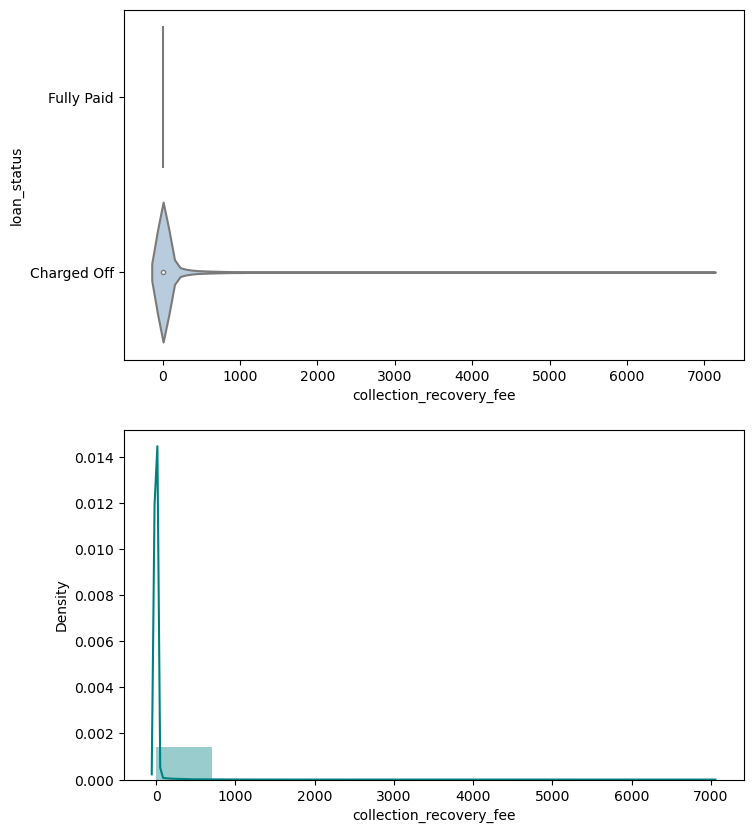

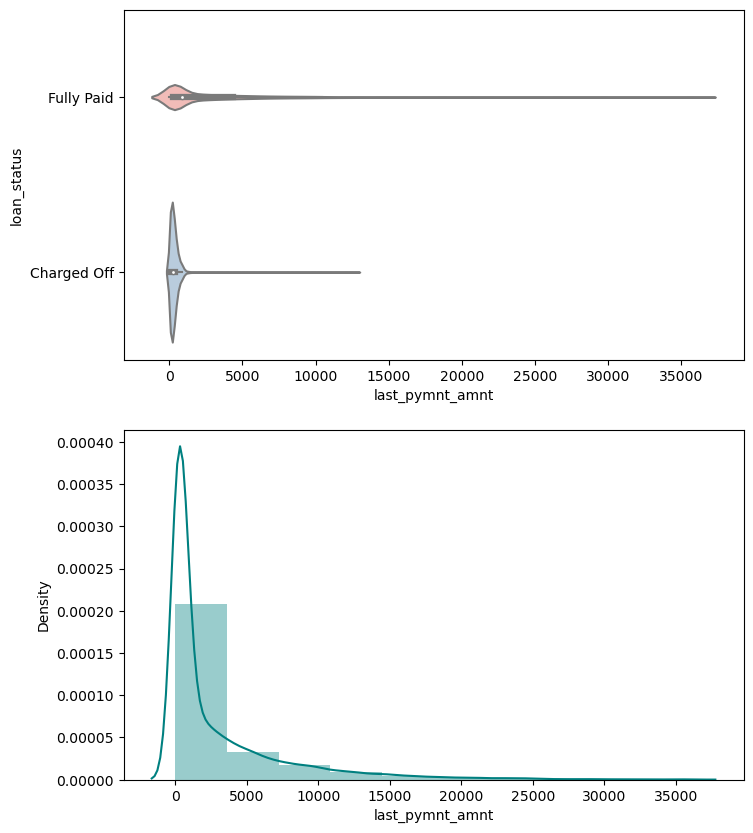

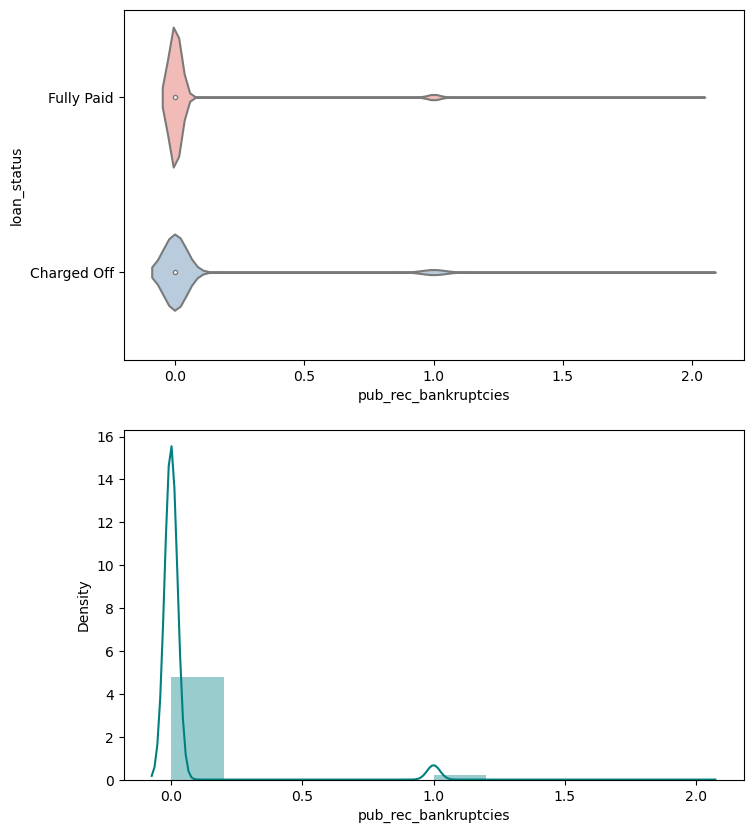

In [11]:
plot_numerical(df, y ='loan_status')

#### Observations: 

    Categorical columns

    1. Term is an important factor for determining the defaulters. If the term of loan is 60 months they are more likely to default than fully pay. Although both terms have similar counts of defaulters

    2. Proportions of defaulters to fully paid is most when grade is C, followed by D and E. Although grade B loans are most in count.
    
    3. Proportions of people with employment length of more than 7 years are more  likely to default than fully pay.
    
    4. Proportion of people with mortgage are more likely to default. But number of defaulters who have rented property are more in count.
    
    5. Proportions of verified loan defaulters are more although non-verified and verified loans are equal in numbers.
    
    6. loan for the purpose of debt_consolidations have higher proportions of defaulters. Followed by those in others category and credit card loans.

     Numerical columns - 

    1. The median loan amount for both defaulters and fully paid are similar to 10k USD.The third quartiles and outliers amount are more in defaulters than fully paid loans.

    2. funded_amnt and funded_amnt_inv have similar readings to that of loan amnt, so we will not further use them in analysis.
    
    3. Interest rate is a distinctor for defaulters, who have higher median int_rate than those who have fully paid their loans.
    
    4. Annual income, delinq_2yrs, have huge outliers which have to correct
    
    5. Revol_util is an important indiactor as it has a s higher median for defaulters.
    
    6. Total_payment is as such not that useful, we have to look at the balance and int_rate along with annual
    income of such individuals to get a clear picture.
    
    
    
    Out of the 23 numerican cols:
    
        - we can check the following against:

`'loan_amnt', 'int_rate', 'annual_inc', 'installment', 'revol_bal', 'revol_util', 'dti', 'total_pymnt'` 

    Out of the categories:
        
        -we can check the following:
`'term', 'grade', 'purpose', 'emp_length', 'home_ownership', 'verification_status'`

In [8]:
final_cat = ['term', 'grade', 'purpose', 'emp_length', 'home_ownership', 'verification_status']
final_num = ['loan_amnt', 'int_rate', 'annual_inc',
             'installment', 'revol_bal', 'revol_util',
             'dti', 'total_pymnt']

### 2.3 analysis of categorical columns over various numerical cols with loan status

In [9]:
def plot_combo(data = None, x = None, row = None, y = None, palette = None, col = None):
    
    sns.catplot(data = df,
               y = y,
               x = x,
               col = col, row = 'loan_status',
               kind = 'violin',
               palette = palette,
               height = 5, aspect = 1.5,
               order = df[y].value_counts().index
               )
    
    if input('Save image?\n(y/n):\n').lower() == 'y':
        plt.savefig(f'Loan status vs {x} for various {y}.', dpi = 1000)
    else:
        plt.show()

In [10]:
def get_pivot_plots(data, num = None, cat = None, palette = None):   
    
    print(f'{cat}'.upper())
    
    
    print('---'*20)
    
    print(pd.pivot_table(data = data, 
              values = num,
              index = cat, columns = 'loan_status',
              
              aggfunc = np.median))
    
    print('---'*20)
    
    print('\n'*2)
    
    plot_combo(data, x = num, y = cat, palette = palette)
    
    
    
    
                  
            
    
    

In [11]:
def draw_pivot(data, num):
    for i in final_cat:
        print(i.upper())
        print('--'*50)
        print(pd.pivot_table(data, columns = i, index = 'loan_status',
               values = num,
               aggfunc = 'median'))
        print('\n'*3)
    

#### 2.3.1 Loan amount

In [16]:
#Loan_amnt vs various categories
draw_pivot(df, 'loan_amnt')

TERM
----------------------------------------------------------------------------------------------------
term          36 months   60 months
loan_status                        
Charged Off        8000       15000
Fully Paid         8000       14500




GRADE
----------------------------------------------------------------------------------------------------
grade           A      B     C      D      E      F      G
loan_status                                               
Charged Off  7000  10000  9975  10050  15000  20000  19100
Fully Paid   7750  10000  9600  10000  15000  17400  23250




PURPOSE
----------------------------------------------------------------------------------------------------
purpose       car  credit_card  debt_consolidation  educational  \
loan_status                                                       
Charged Off  6000        12000               12000         6000   
Fully Paid   6000        10000               11000         5000   

purpose      home_imp

PURPOSE
------------------------------------------------------------
loan_status         Charged Off  Fully Paid
purpose                                    
car                        6000        6000
credit_card               12000       10000
debt_consolidation        12000       11000
educational                6000        5000
home_improvement          10000        9600
house                     10000       11000
major_purchase             7000        6000
medical                    6100        6000
moving                     5000        5000
other                      6000        6000
renewable_energy           6000        6075
small_business            12700       10000
vacation                   5000        4800
wedding                    9000        8000
------------------------------------------------------------





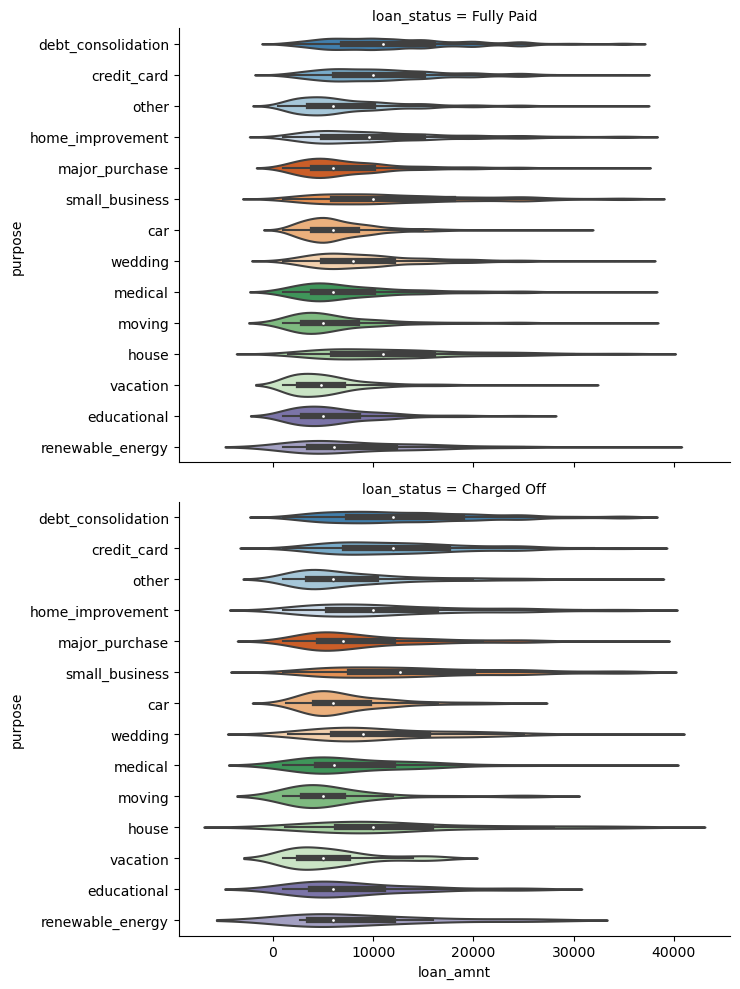

In [17]:
#Loan_amnt vs purpose

get_pivot_plots(data = df, num = 'loan_amnt', cat = 'purpose', palette = 'tab20c') 

GRADE
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
grade                               
A                   7000        7750
B                  10000       10000
C                   9975        9600
D                  10050       10000
E                  15000       15000
F                  20000       17400
G                  19100       23250
------------------------------------------------------------





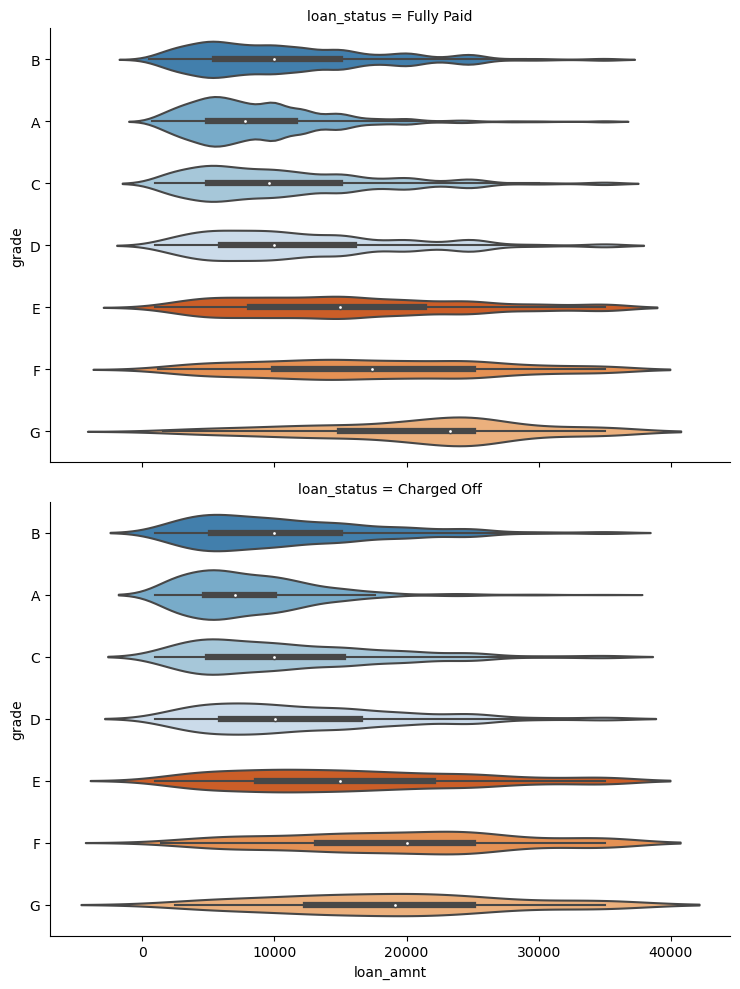

In [18]:
# Loan amount vs grade
get_pivot_plots(data = df, num = 'loan_amnt', cat = 'grade', palette = 'tab20c')

HOME_OWNERSHIP
------------------------------------------------------------
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE              12600       10000
OTHER                 14000        8500
OWN                   10000        8225
RENT                   9000        8000
------------------------------------------------------------





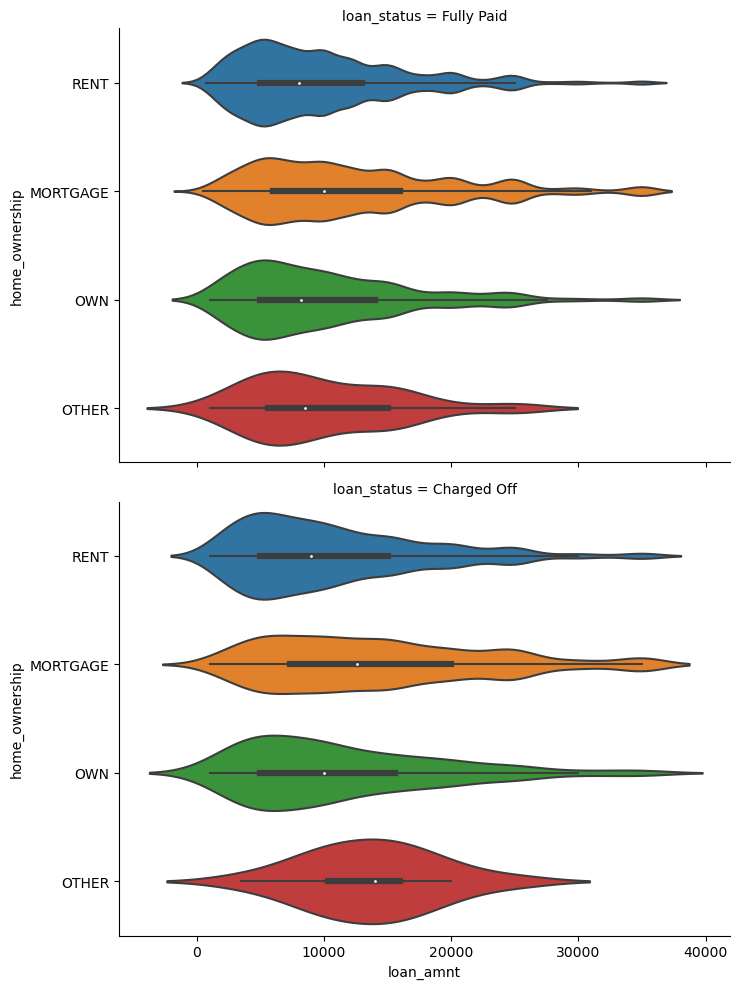

In [19]:
#loan amount vs home_ownership
get_pivot_plots(data = df, num = 'loan_amnt', cat = 'home_ownership')

VERIFICATION_STATUS
------------------------------------------------------------
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                7550        7500
Source Verified             9600        8600
Verified                   16000       15000
------------------------------------------------------------





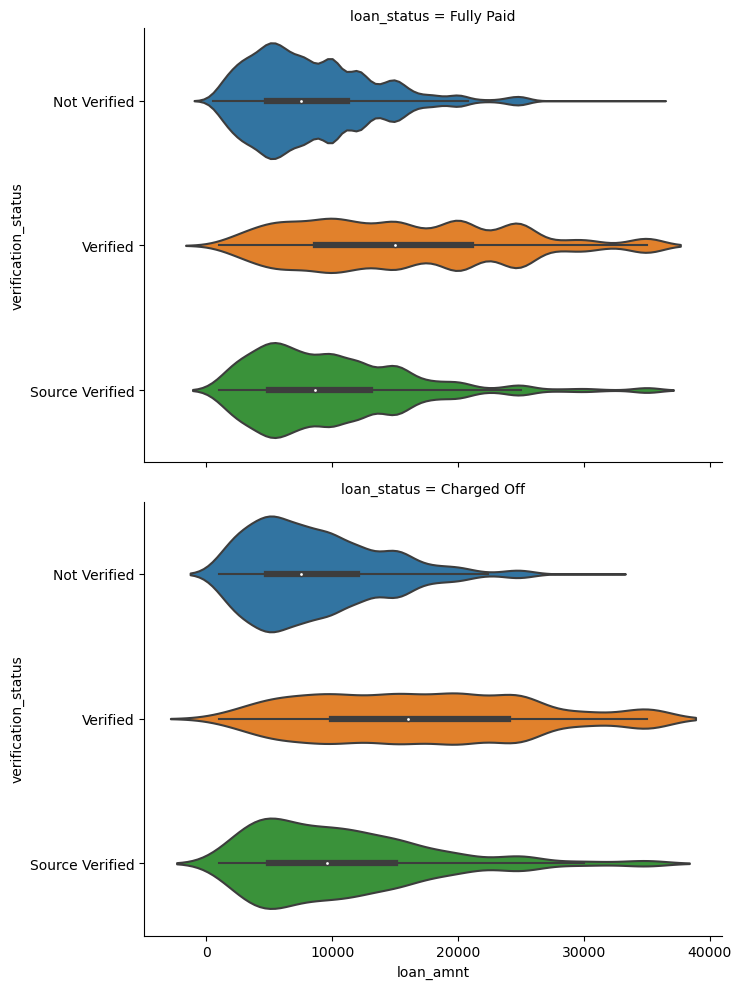

In [20]:
#loan amount vs verification_status
get_pivot_plots(df, 'loan_amnt', 'verification_status')

EMP_LENGTH
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
emp_length                          
mid                10000       10000
new                 9000        8125
old                12000       10000
------------------------------------------------------------





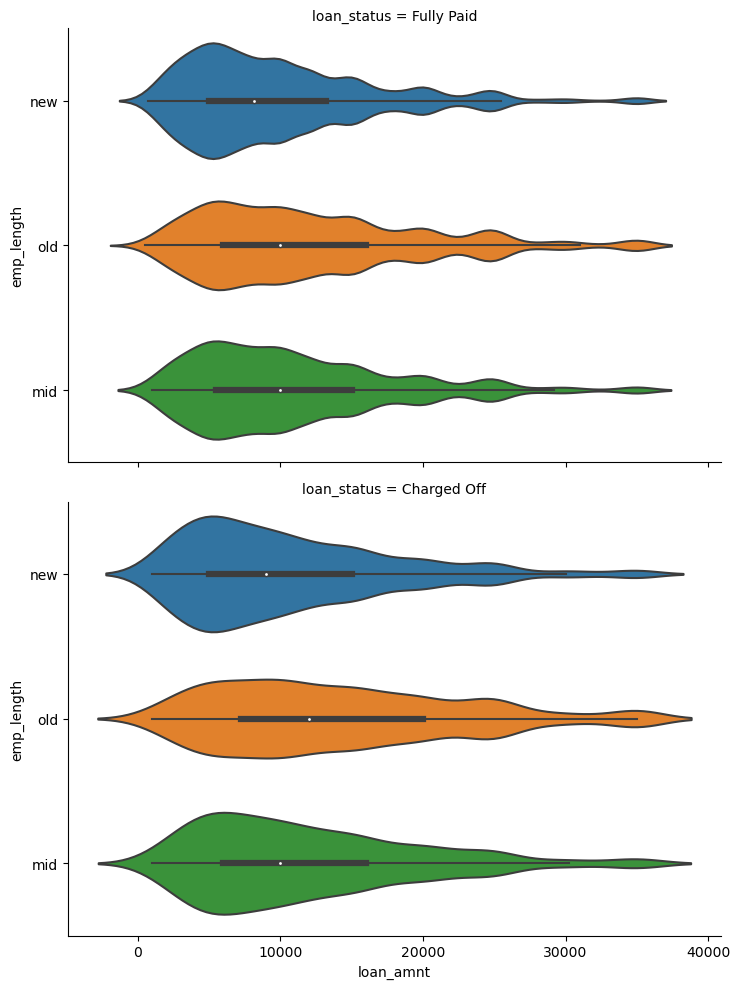

In [21]:
#loan_amnt vs emp_length
get_pivot_plots(df, 'loan_amnt', 'emp_length')

#### 2.3.2 Interest rates

In [22]:
#Interest vs various categories
draw_pivot(df, 'int_rate')

TERM
----------------------------------------------------------------------------------------------------
term          36 months   60 months
loan_status                        
Charged Off       12.53      16.005
Fully Paid        10.99      14.270




GRADE
----------------------------------------------------------------------------------------------------
grade           A      B      C      D      E      F      G
loan_status                                                
Charged Off  7.51  11.14  13.49  15.95  17.88  20.25  21.22
Fully Paid   7.49  10.99  13.49  15.62  17.39  19.13  20.85




PURPOSE
----------------------------------------------------------------------------------------------------
purpose        car  credit_card  debt_consolidation  educational  \
loan_status                                                        
Charged Off  11.99        13.43               14.27        12.53   
Fully Paid   10.00        11.26               11.97        11.83   

purpose      

TERM
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
term                                
 36 months        12.530       10.99
 60 months        16.005       14.27
------------------------------------------------------------





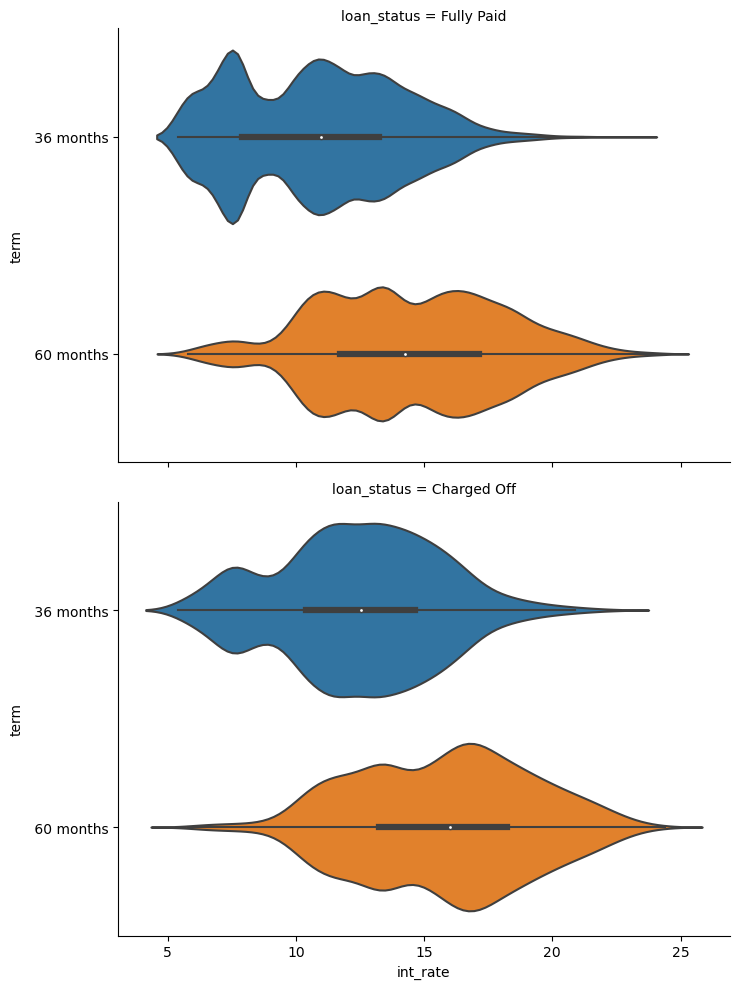

In [23]:
#int_rate vs term
get_pivot_plots(df, 'int_rate', 'term')

PURPOSE
------------------------------------------------------------
loan_status         Charged Off  Fully Paid
purpose                                    
car                      11.990       10.00
credit_card              13.430       11.26
debt_consolidation       14.270       11.97
educational              12.530       11.83
home_improvement         13.190       10.99
house                    15.455       11.58
major_purchase           13.060       10.59
medical                  13.490       10.99
moving                   11.860       11.12
other                    13.490       11.48
renewable_energy         11.360       11.05
small_business           14.195       12.53
vacation                 11.490       10.62
wedding                  13.430       11.49
------------------------------------------------------------





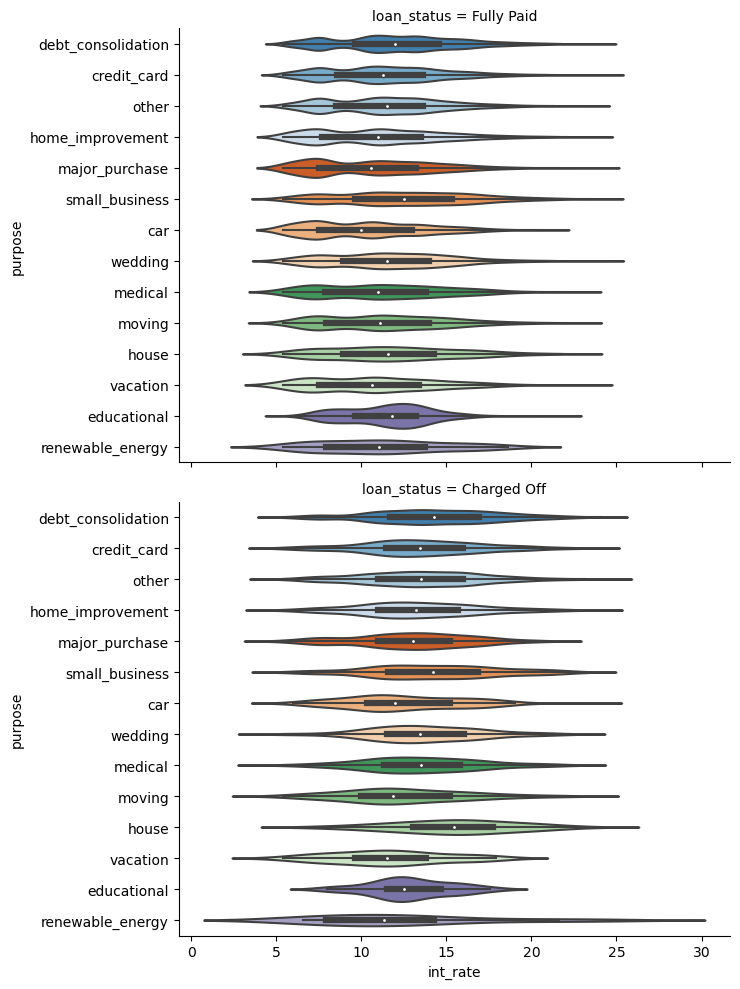

In [24]:
#int_rate vs purpose
get_pivot_plots(df, 'int_rate', 'purpose', palette = 'tab20c')

EMP_LENGTH
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
emp_length                          
mid                13.98       11.49
new                13.49       11.58
old                13.98       11.48
------------------------------------------------------------





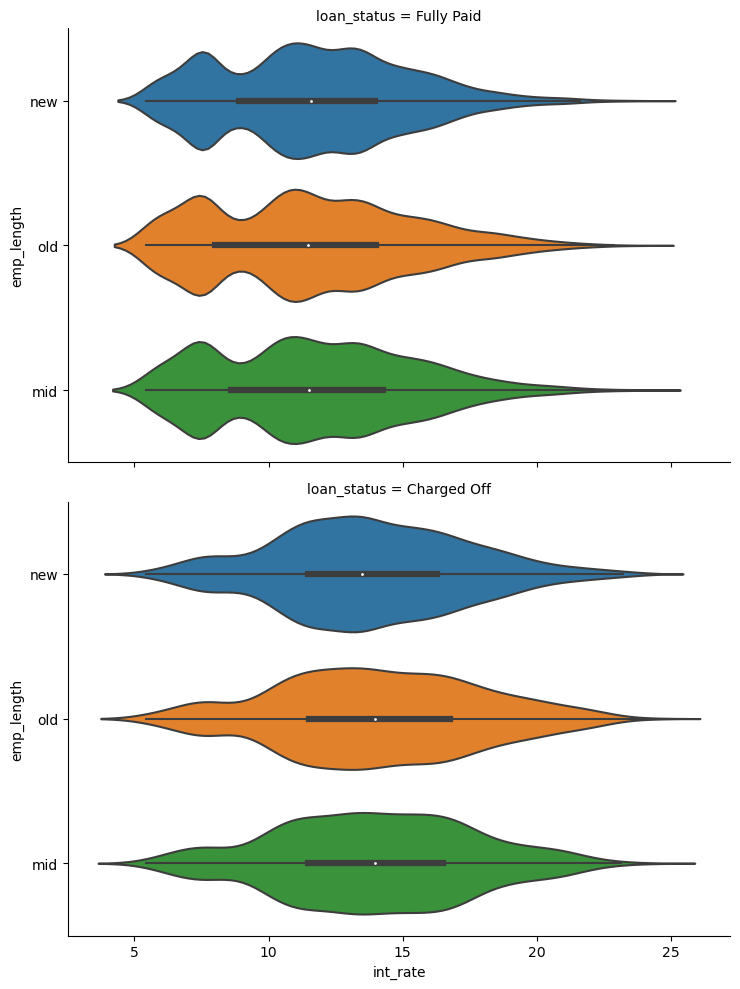

In [25]:
#int_rates vs emp_length
get_pivot_plots(df, 'int_rate', 'emp_length')

VERIFICATION_STATUS
------------------------------------------------------------
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified               12.87       10.99
Source Verified            14.17       11.49
Verified                   14.84       12.53
------------------------------------------------------------





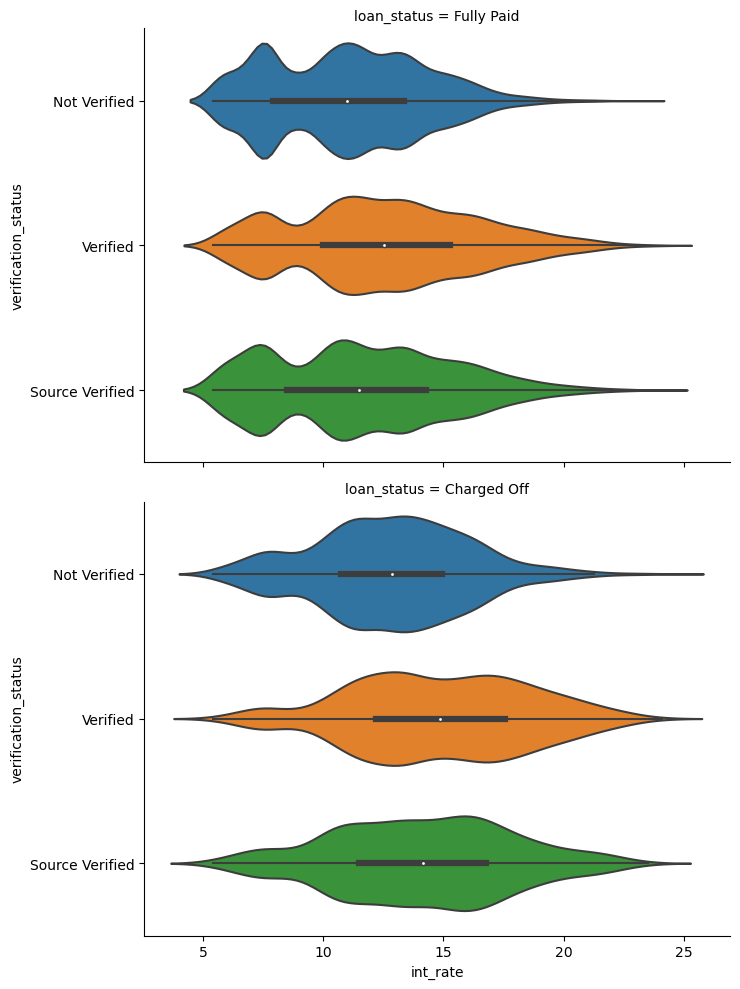

In [26]:
#int_rates vs verification_status
get_pivot_plots(df,'int_rate', 'verification_status')

HOME_OWNERSHIP
------------------------------------------------------------
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE              13.72       11.11
OTHER                 12.21       11.83
OWN                   13.61       11.48
RENT                  13.80       11.86
------------------------------------------------------------





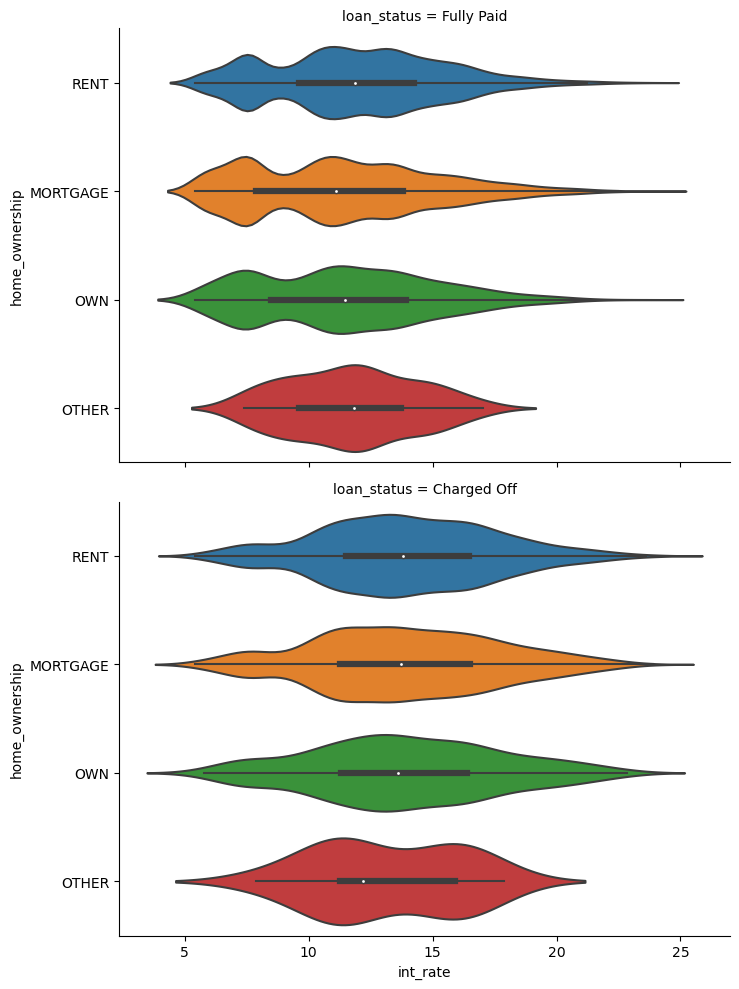

In [27]:
#int_rate vs home_ownership
get_pivot_plots(df, 'int_rate', 'home_ownership')

#### 2.3.3 Annual_inc


In [12]:
draw_pivot(df, 'annual_inc')

TERM
----------------------------------------------------------------------------------------------------
term          36 months   60 months
loan_status                        
Charged Off     50000.0     60000.0
Fully Paid      58800.0     65000.0




GRADE
----------------------------------------------------------------------------------------------------
grade              A        B        C        D        E        F        G
loan_status                                                               
Charged Off  48000.0  50004.0  51600.0  55000.0  60000.0  66950.0  68500.0
Fully Paid   60000.0  60000.0  58000.0  60000.0  66000.0  75000.0  85000.0




PURPOSE
----------------------------------------------------------------------------------------------------
purpose          car  credit_card  debt_consolidation  educational  \
loan_status                                                          
Charged Off  48000.0      55000.0             54996.0     44000.00   
Fully Paid   569

LOAN_AMNT
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
loan_amnt                           
500                  NaN     59000.0
725                  NaN     12000.0
1000             32676.0     40000.0
1050             31200.0     36000.0
1075                 NaN     38000.0
...                  ...         ...
34475            60000.0     72051.0
34525                NaN    112000.0
34675                NaN    120000.0
34800                NaN    128500.0
35000            93500.0    115000.0

[855 rows x 2 columns]
------------------------------------------------------------



Save image?
(y/n):
y
INT_RATE
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
int_rate                            
5.42            54400.00   60000.000
5.79            45444.00   60000.000
5.99            42000.00   60000.000
6.00                 NaN   54000.000
6.03            54000.00   64000.000
6.17      

Save image?
(y/n):
y
ANNUAL_INC
------------------------------------------------------------


ValueError: Grouper for 'annual_inc' not 1-dimensional

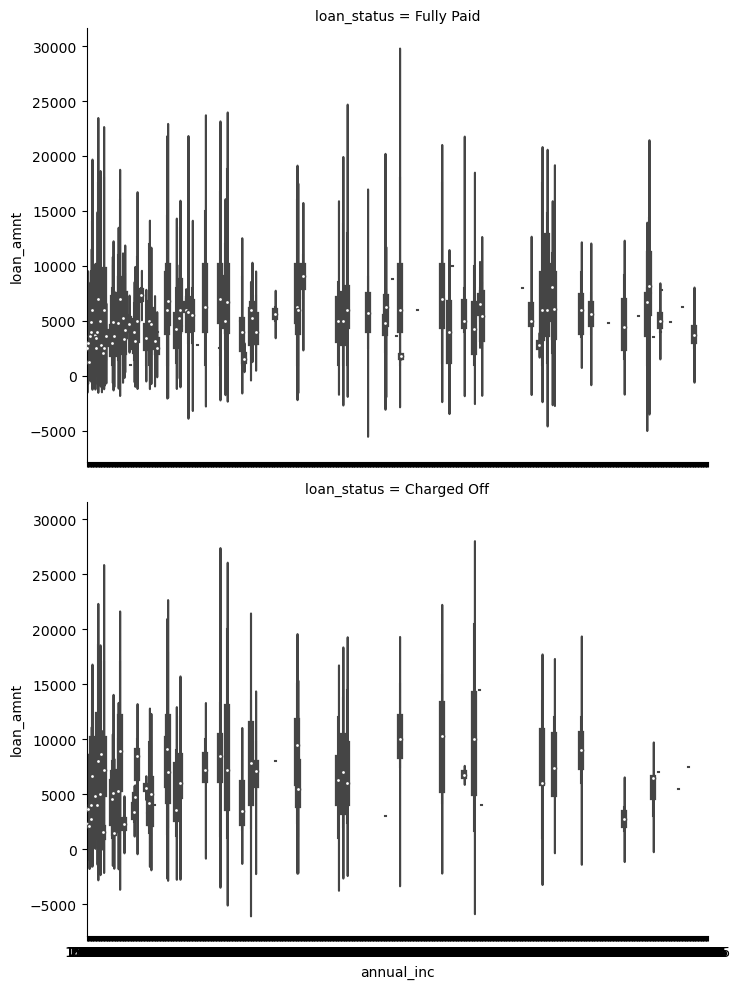

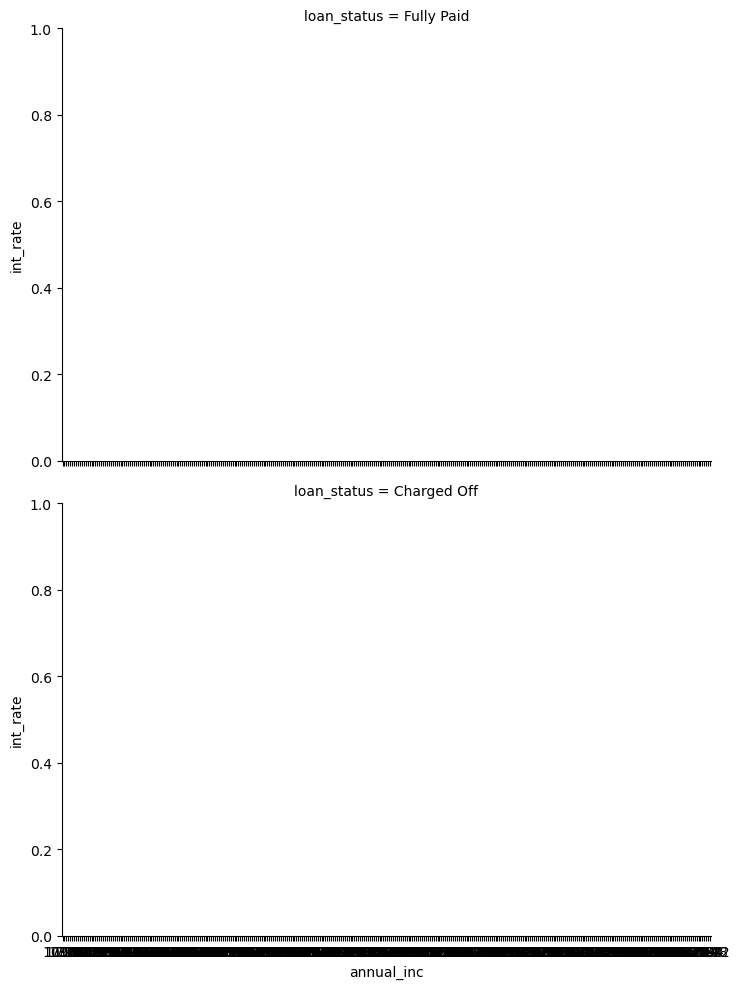

In [13]:
for i in final_num:
    get_pivot_plots(df, 'annual_inc', i)

    From all the sub categories in categories the median annual income is always low for those who are charged 
    off to those who have fully paid.

    Also the annual income has huge outliers so will not print the distribution plots

#### 2.3.4 Revol_util

In [29]:
draw_pivot(df, 'revol_util')

TERM
----------------------------------------------------------------------------------------------------
term          36 months   60 months
loan_status                        
Charged Off        58.2       60.15
Fully Paid         46.9       51.70




GRADE
----------------------------------------------------------------------------------------------------
grade            A     B     C      D      E     F      G
loan_status                                              
Charged Off  33.35  47.7  59.3  65.95  75.90  77.2  82.35
Fully Paid   25.80  47.6  59.6  68.60  72.45  76.0  85.65




PURPOSE
----------------------------------------------------------------------------------------------------
purpose       car  credit_card  debt_consolidation  educational  \
loan_status                                                       
Charged Off  42.3         65.8                63.3         50.0   
Fully Paid   30.5         57.9                54.0         29.8   

purpose      home_improve

TERM
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
term                                
 36 months         58.20        46.9
 60 months         60.15        51.7
------------------------------------------------------------





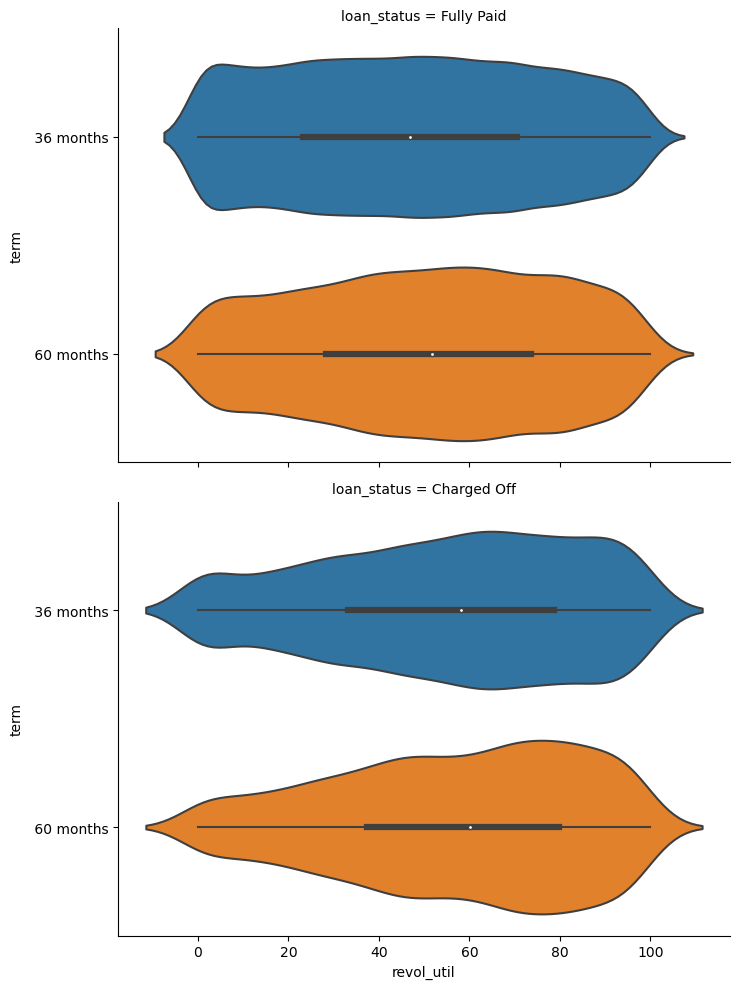

GRADE
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
grade                               
A                  33.35       25.80
B                  47.70       47.60
C                  59.30       59.60
D                  65.95       68.60
E                  75.90       72.45
F                  77.20       76.00
G                  82.35       85.65
------------------------------------------------------------





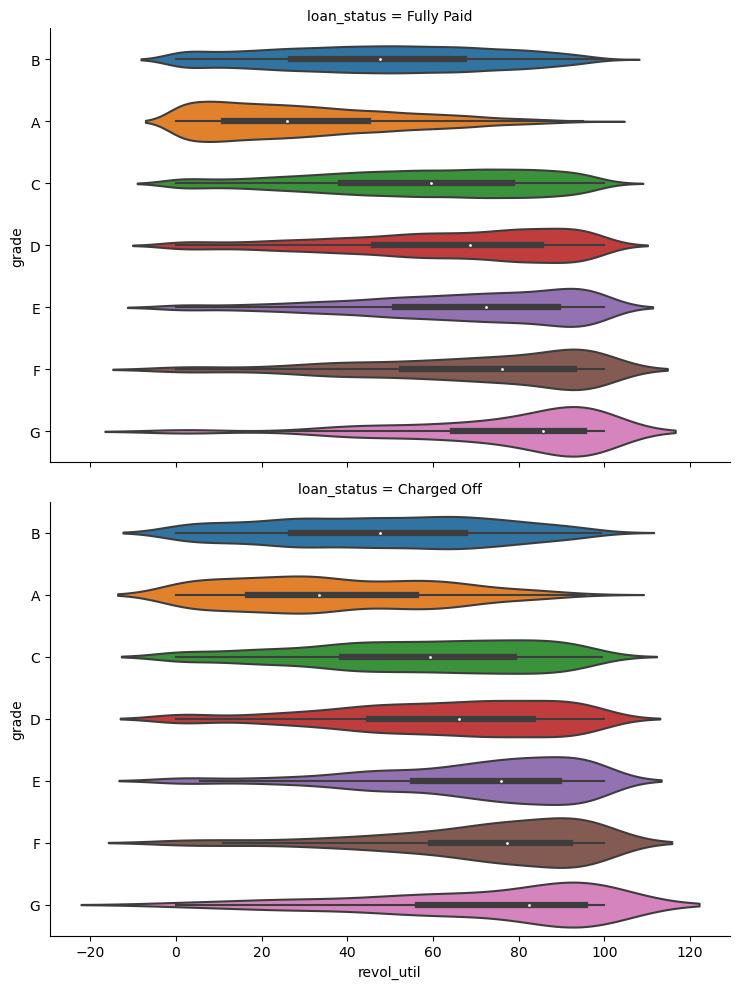

PURPOSE
------------------------------------------------------------
loan_status         Charged Off  Fully Paid
purpose                                    
car                       42.30       30.50
credit_card               65.80       57.90
debt_consolidation        63.30       54.00
educational               50.00       29.80
home_improvement          48.10       30.00
house                     56.65       26.40
major_purchase            40.30       29.70
medical                   52.90       36.65
moving                    46.80       39.50
other                     57.40       42.00
renewable_energy          73.40       44.20
small_business            47.55       33.95
vacation                  57.20       34.60
wedding                   55.70       39.80
------------------------------------------------------------





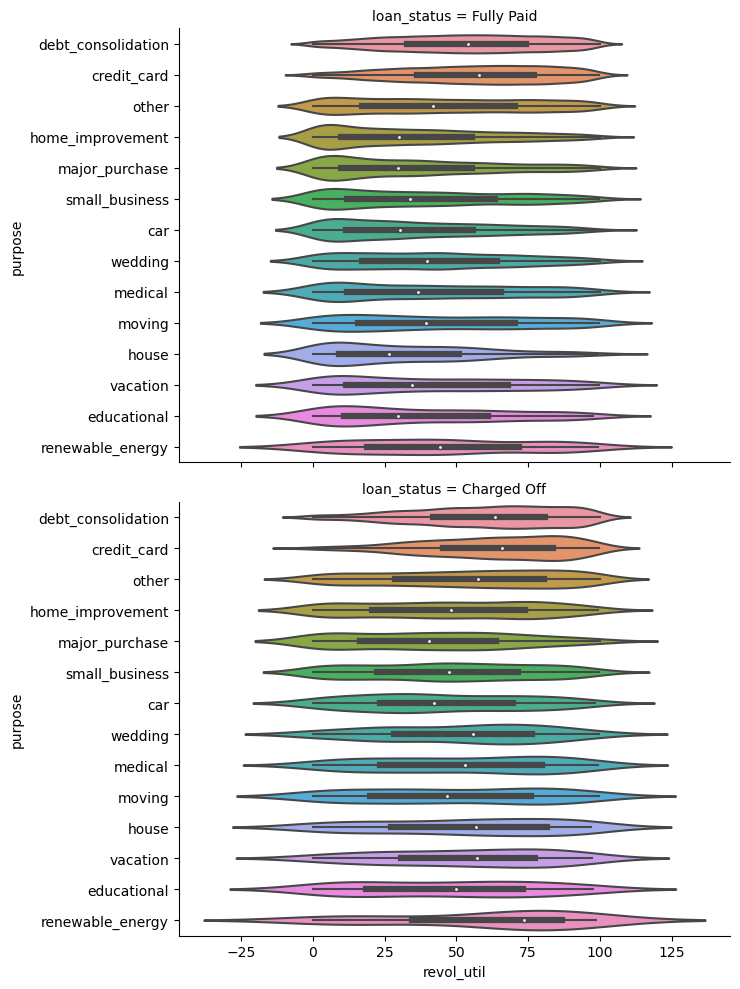

EMP_LENGTH
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
emp_length                          
mid                60.45        48.0
new                56.95        47.6
old                60.10        48.3
------------------------------------------------------------





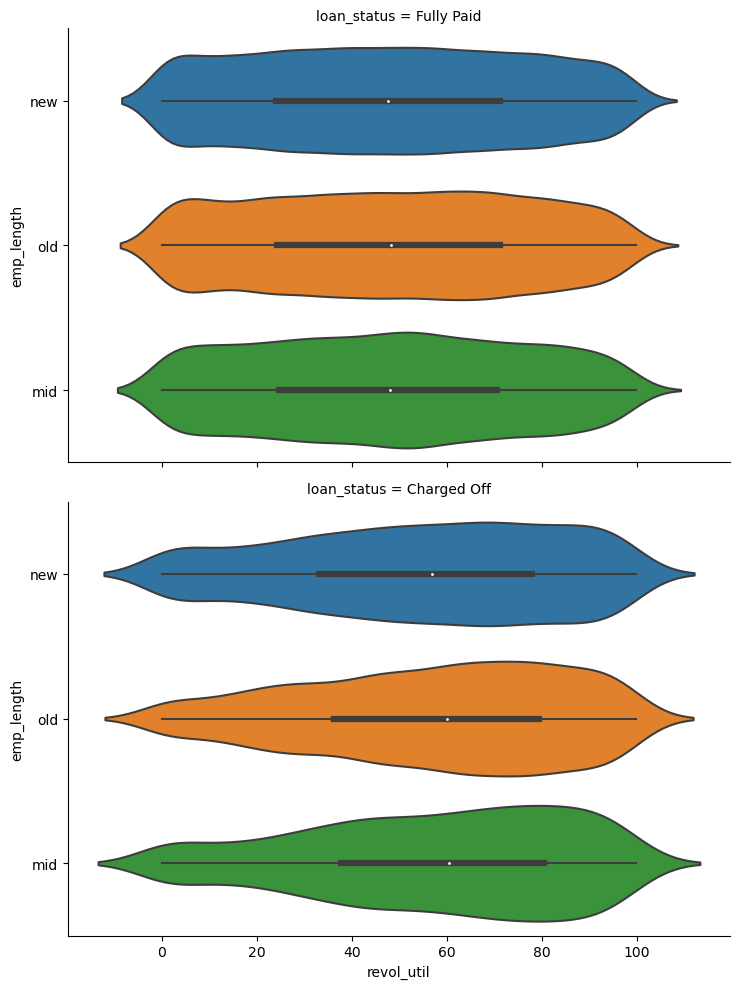

HOME_OWNERSHIP
------------------------------------------------------------
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE              57.90        44.6
OTHER                 33.50        39.3
OWN                   55.25        41.7
RENT                  60.60        52.1
------------------------------------------------------------





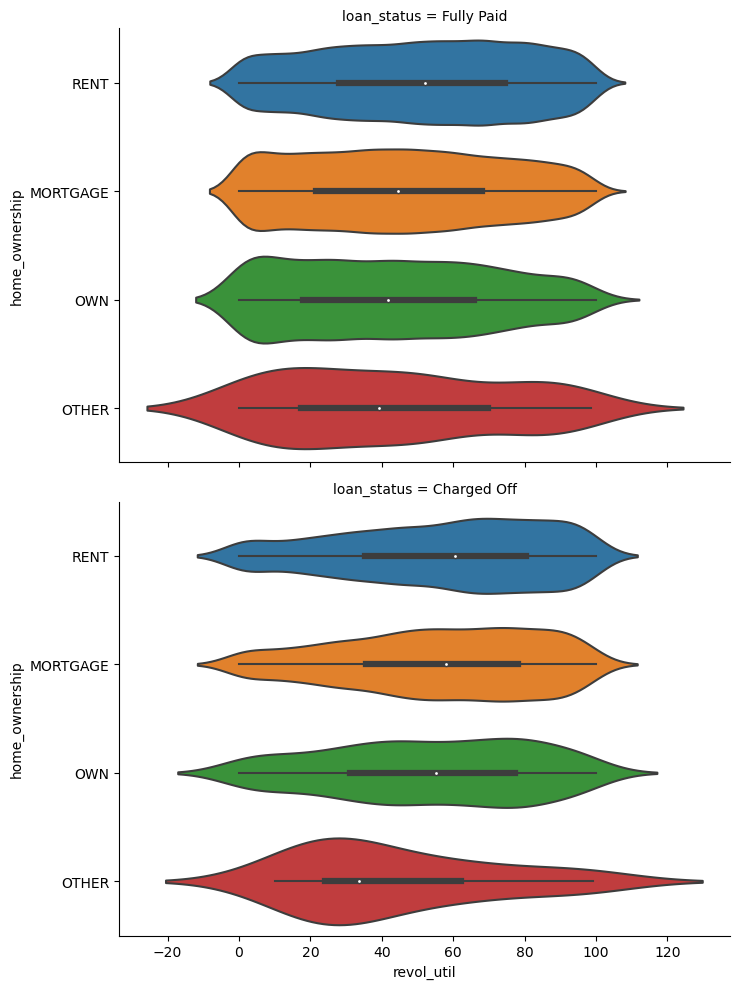

VERIFICATION_STATUS
------------------------------------------------------------
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                57.9        45.6
Source Verified             59.8        48.2
Verified                    59.9        50.9
------------------------------------------------------------





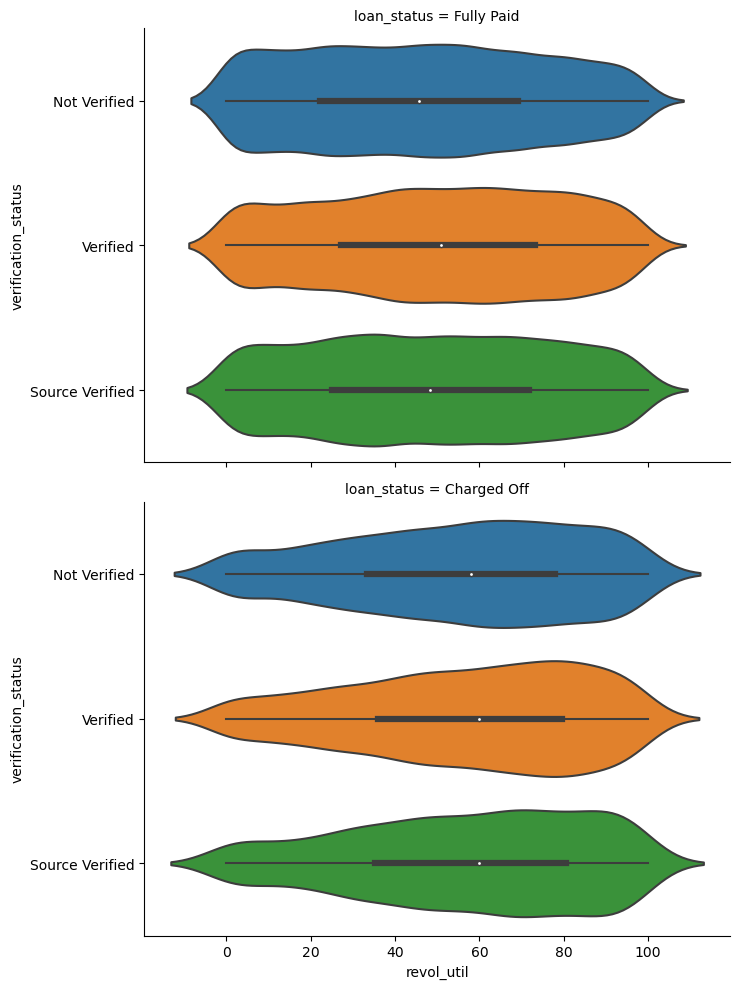

In [30]:
for i in final_cat:
    get_pivot_plots(df, 'revol_util', i)

#### 2.3.5 Installments

In [31]:
draw_pivot(df, 'installment')

TERM
----------------------------------------------------------------------------------------------------
term          36 months   60 months
loan_status                        
Charged Off      260.95     348.435
Fully Paid       264.61     318.640




GRADE
----------------------------------------------------------------------------------------------------
grade              A       B       C        D        E        F        G
loan_status                                                             
Charged Off  214.930  259.57  277.49  301.765  377.330  523.215  535.520
Fully Paid   225.935  280.97  277.53  322.560  386.115  456.220  606.845




PURPOSE
----------------------------------------------------------------------------------------------------
purpose          car  credit_card  debt_consolidation  educational  \
loan_status                                                          
Charged Off  166.770       327.39              339.31       195.37   
Fully Paid   162.765    

TERM
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
term                                
 36 months       260.950      264.61
 60 months       348.435      318.64
------------------------------------------------------------





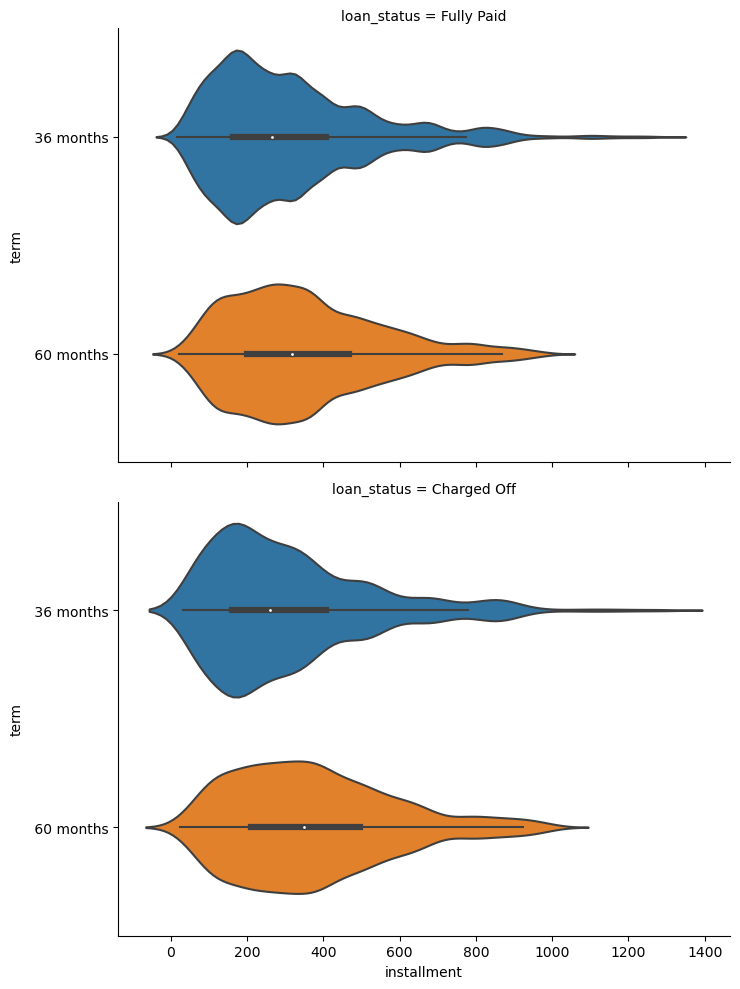

GRADE
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
grade                               
A                214.930     225.935
B                259.570     280.970
C                277.490     277.530
D                301.765     322.560
E                377.330     386.115
F                523.215     456.220
G                535.520     606.845
------------------------------------------------------------





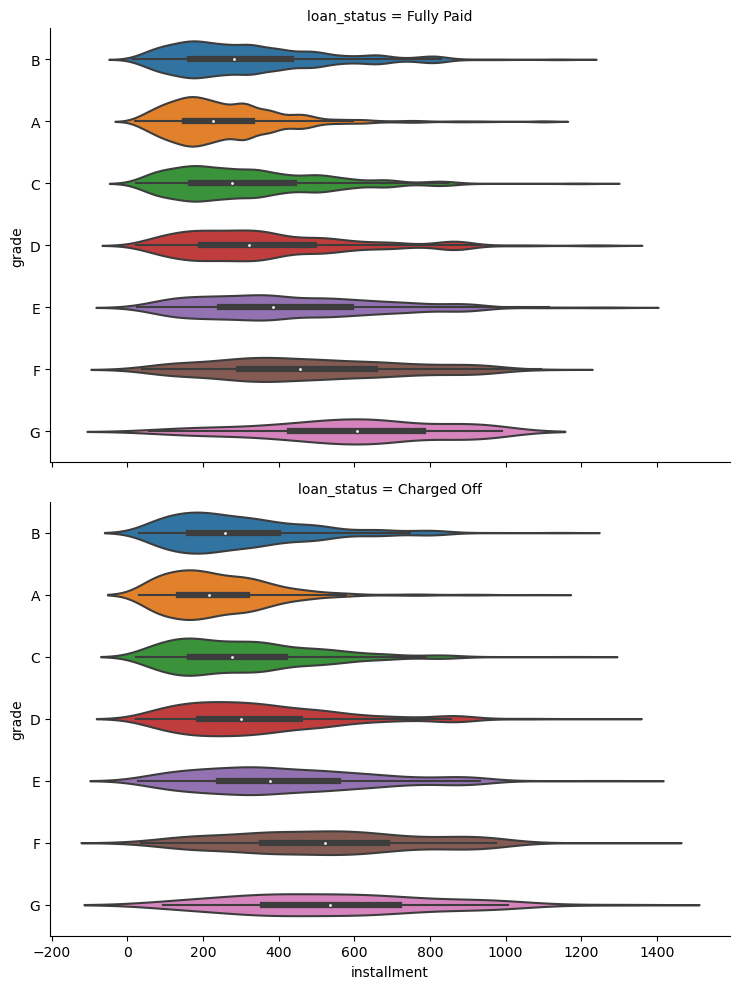

PURPOSE
------------------------------------------------------------
loan_status         Charged Off  Fully Paid
purpose                                    
car                     166.770     162.765
credit_card             327.390     311.110
debt_consolidation      339.310     326.160
educational             195.370     167.340
home_improvement        279.935     263.860
house                   307.805     323.850
major_purchase          198.050     186.610
medical                 197.470     187.045
moving                  152.090     157.740
other                   173.850     186.860
renewable_energy        137.240     195.550
small_business          359.255     320.600
vacation                154.375     147.370
wedding                 260.360     247.395
------------------------------------------------------------





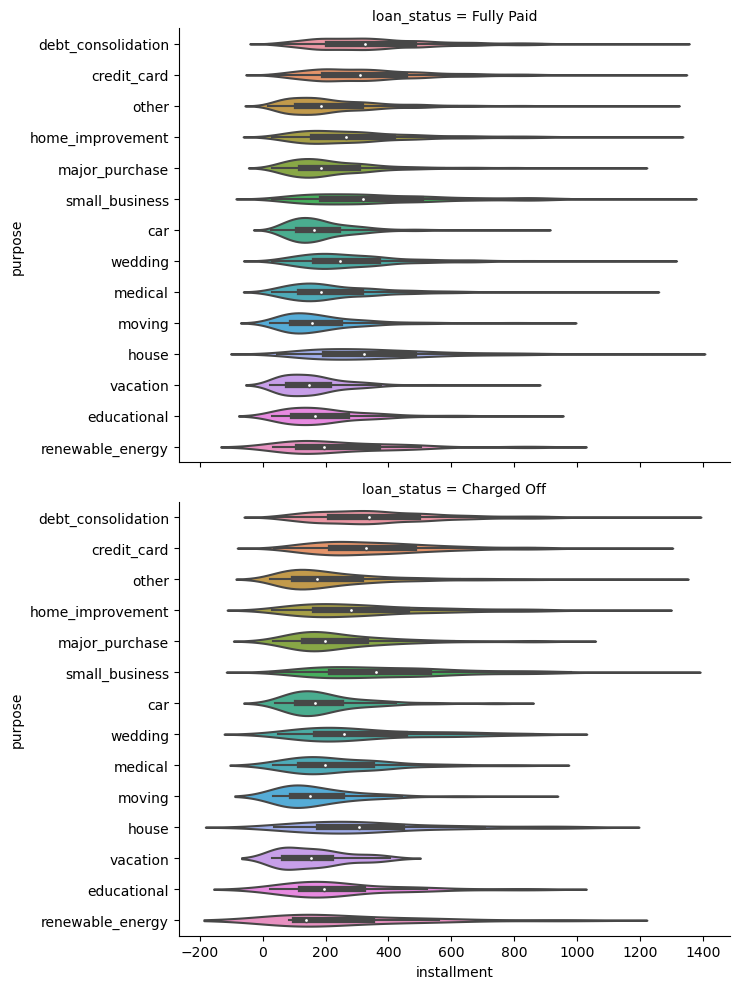

EMP_LENGTH
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
emp_length                          
mid              292.910      279.33
new              259.305      254.33
old              339.690      310.15
------------------------------------------------------------





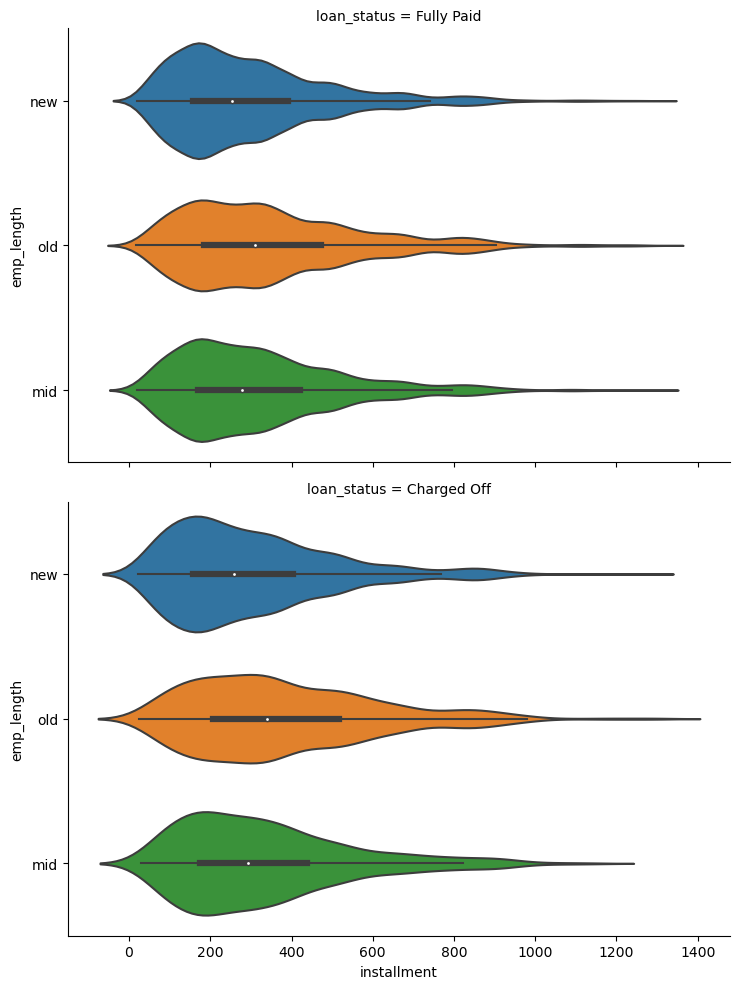

HOME_OWNERSHIP
------------------------------------------------------------
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE            343.090     309.535
OTHER               439.705     257.885
OWN                 263.990     254.105
RENT                263.860     256.760
------------------------------------------------------------





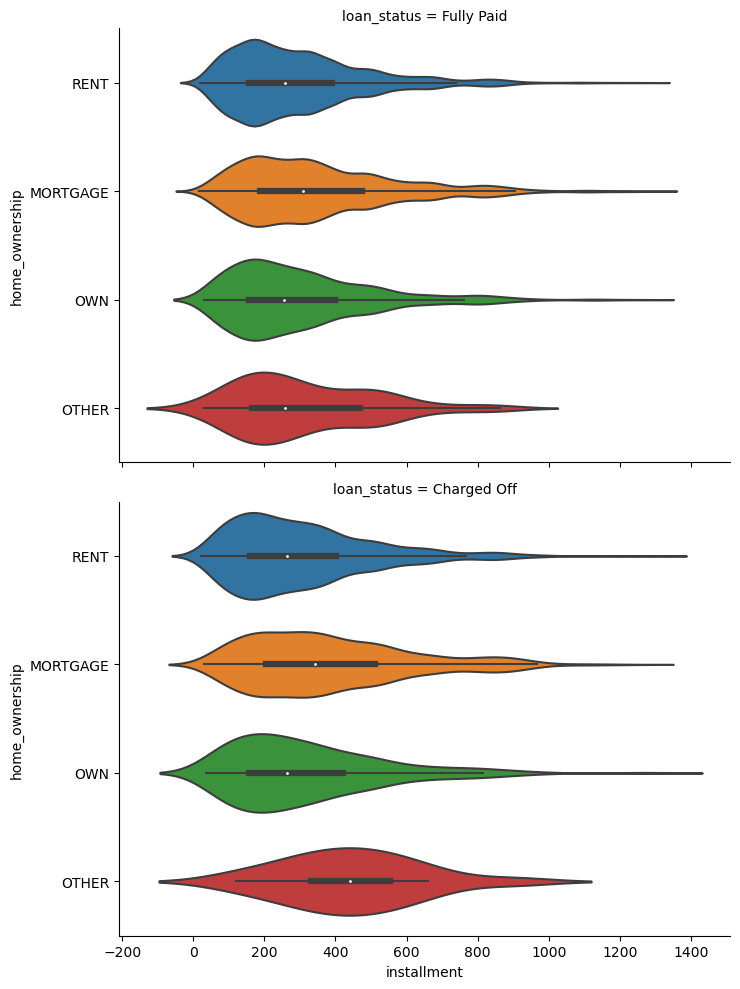

VERIFICATION_STATUS
------------------------------------------------------------
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified             225.880      224.66
Source Verified          258.805      254.91
Verified                 421.475      400.99
------------------------------------------------------------





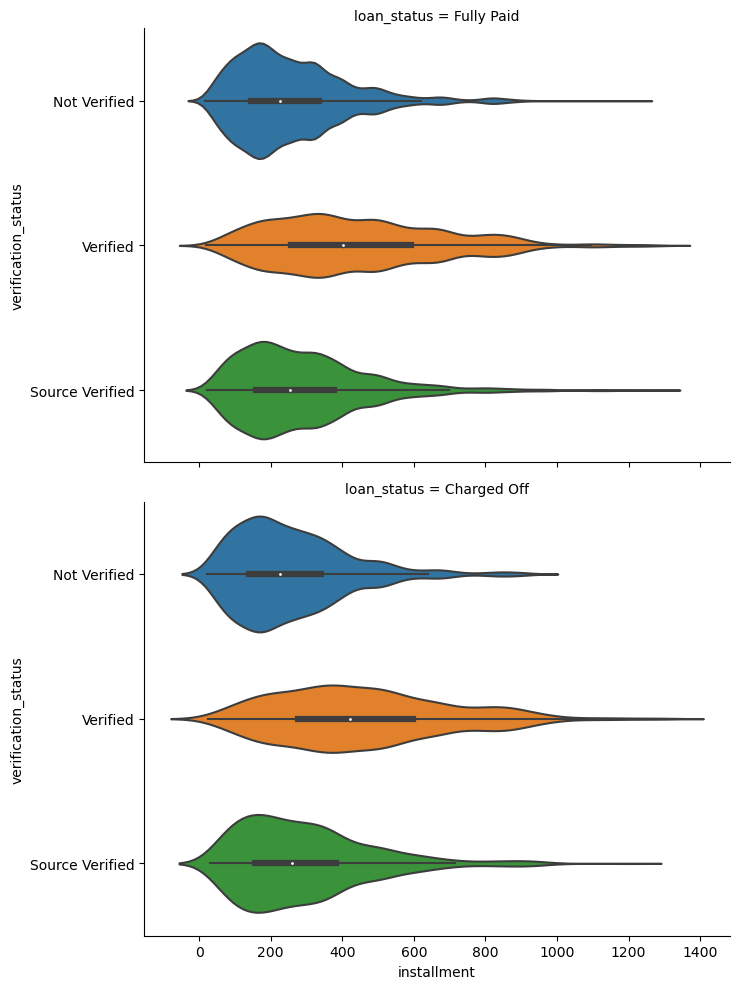

In [32]:
for i in final_cat:
    get_pivot_plots(df, 'installment', i)

    Installments are simialar for various sub categories of the categories for those who are charged off to those who have fully paid.
    
    But among the sub categoris the installment amount is different.
    
    This indicator is inconclusive and only feedback is that various sub categories have different
    median installments

#### 2.3.6 dti

In [33]:
draw_pivot(df, 'dti')

TERM
----------------------------------------------------------------------------------------------------
term          36 months   60 months
loan_status                        
Charged Off       14.00       14.87
Fully Paid        12.96       14.24




GRADE
----------------------------------------------------------------------------------------------------
grade           A      B      C       D      E       F       G
loan_status                                                   
Charged Off  13.2  14.35  14.81  14.035  14.54  14.555  14.970
Fully Paid   11.5  13.49  13.96  14.330  14.32  14.730  14.615




PURPOSE
----------------------------------------------------------------------------------------------------
purpose        car  credit_card  debt_consolidation  educational  \
loan_status                                                        
Charged Off  12.01       16.040               15.54        10.88   
Fully Paid   10.52       14.645               14.44        11.47   

p

TERM
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
term                                
 36 months         14.00       12.96
 60 months         14.87       14.24
------------------------------------------------------------





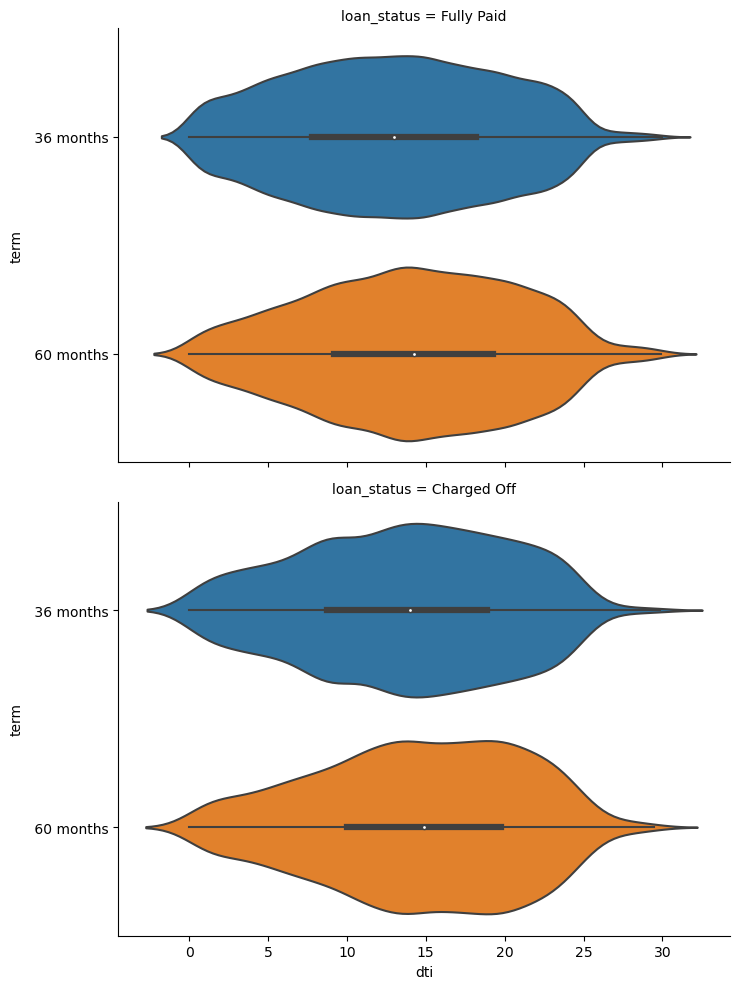

GRADE
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
grade                               
A                 13.200      11.500
B                 14.350      13.490
C                 14.810      13.960
D                 14.035      14.330
E                 14.540      14.320
F                 14.555      14.730
G                 14.970      14.615
------------------------------------------------------------





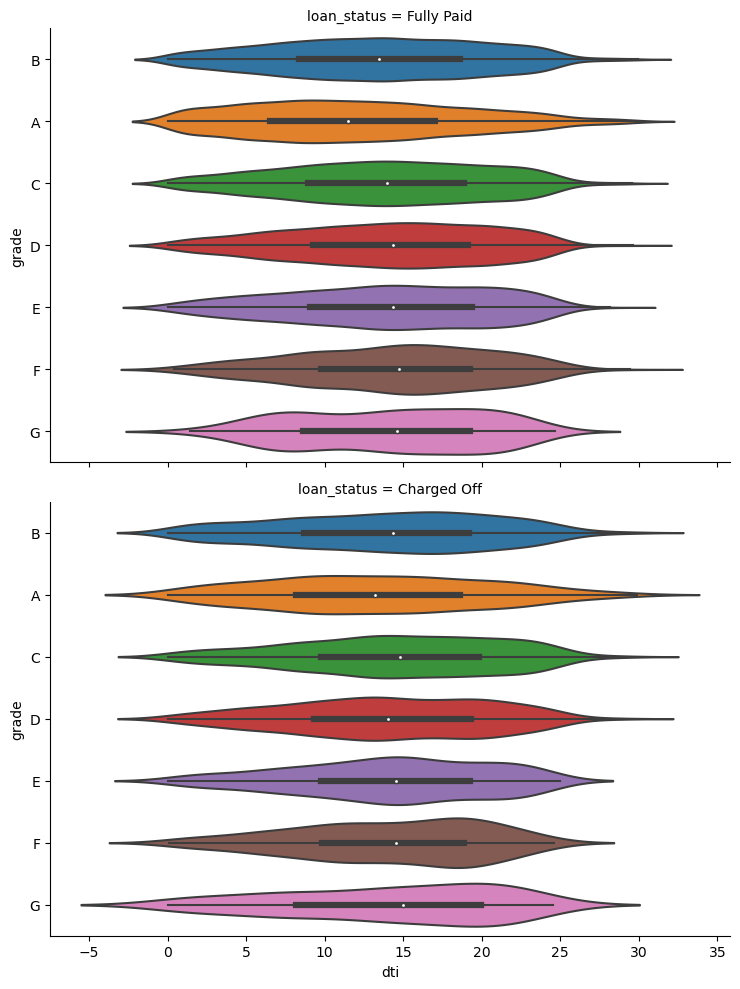

PURPOSE
------------------------------------------------------------
loan_status         Charged Off  Fully Paid
purpose                                    
car                      12.010      10.520
credit_card              16.040      14.645
debt_consolidation       15.540      14.440
educational              10.880      11.470
home_improvement         12.140      10.430
house                    11.705      10.050
major_purchase           11.410      10.230
medical                  11.700      12.595
moving                   13.680      11.530
other                    13.490      12.240
renewable_energy         11.250      11.465
small_business           11.525      10.170
vacation                 13.815      11.120
wedding                  12.280      12.470
------------------------------------------------------------





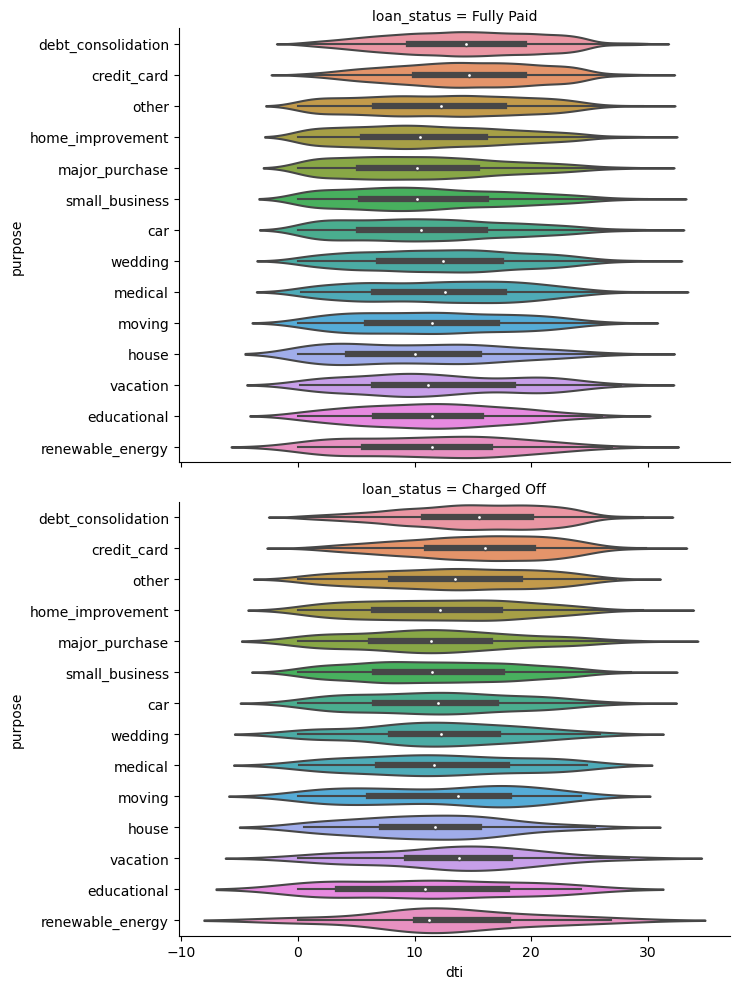

EMP_LENGTH
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
emp_length                          
mid               14.375      13.385
new               13.970      12.900
old               14.840      13.620
------------------------------------------------------------





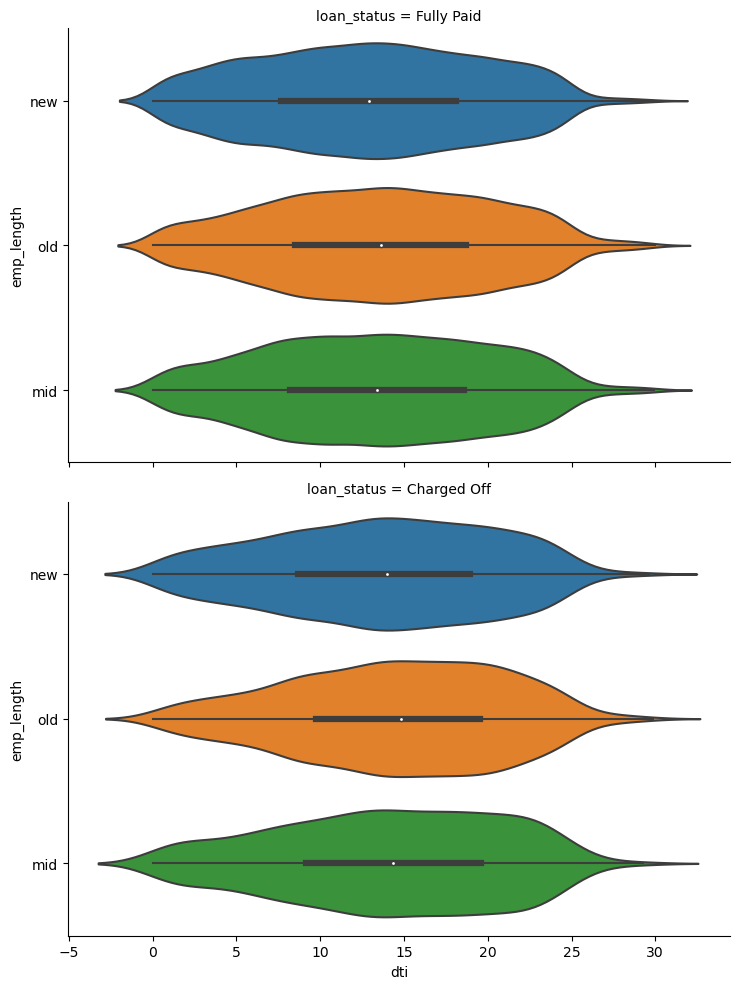

HOME_OWNERSHIP
------------------------------------------------------------
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE             14.340      12.960
OTHER                12.065      10.790
OWN                  15.045      13.255
RENT                 14.335      13.580
------------------------------------------------------------





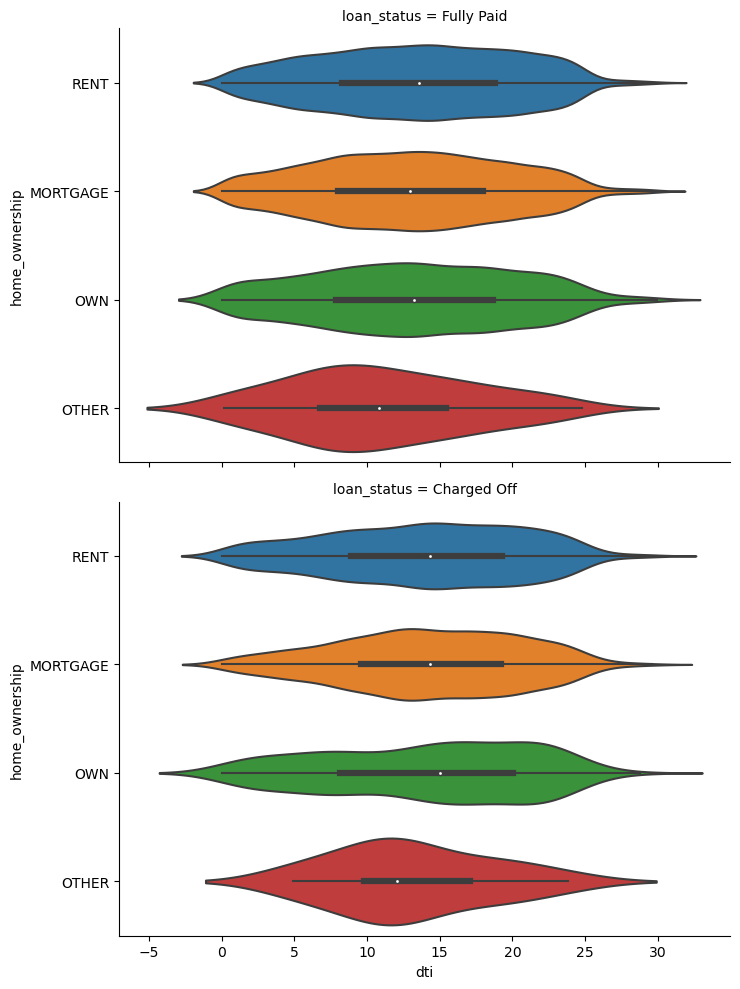

VERIFICATION_STATUS
------------------------------------------------------------
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified              14.490      13.060
Source Verified           13.165      12.585
Verified                  15.325      14.230
------------------------------------------------------------





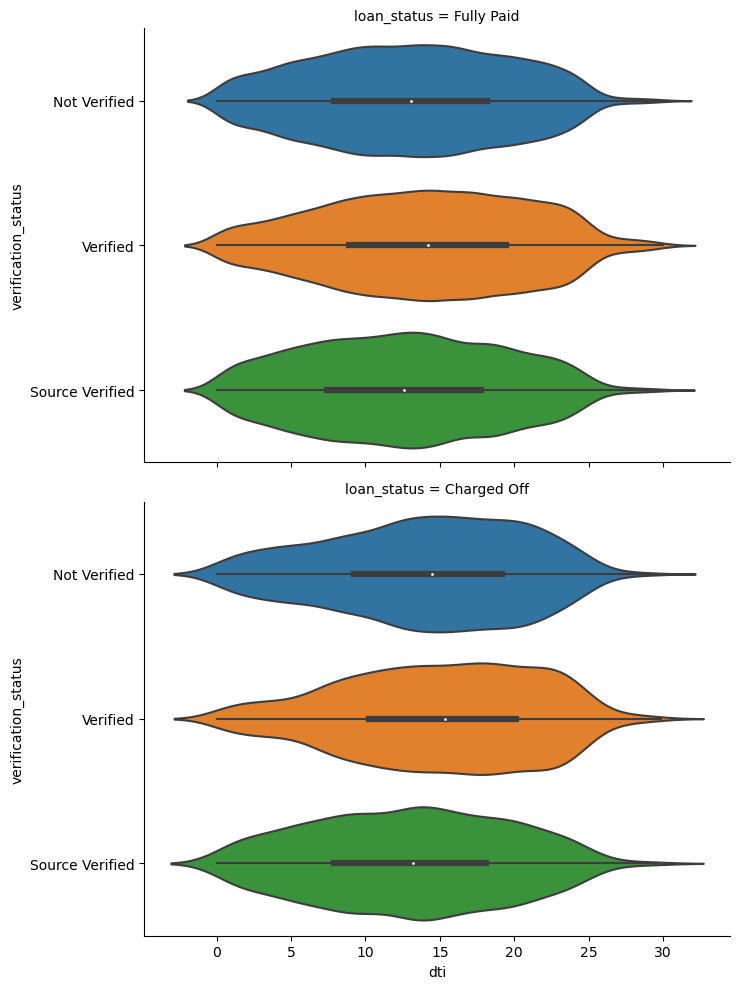

In [34]:
for i in final_cat:
    get_pivot_plots(df, 'dti', i)

#### 2.3.7 Revol_bal

In [35]:
draw_pivot(df, 'revol_bal')

TERM
----------------------------------------------------------------------------------------------------
term          36 months   60 months
loan_status                        
Charged Off        8427       11148
Fully Paid         8315       10677




GRADE
----------------------------------------------------------------------------------------------------
grade             A       B       C       D        E        F        G
loan_status                                                           
Charged Off  8268.5  8349.0  9731.0  8798.0  12032.0  12947.0  12574.0
Fully Paid   6822.0  9200.0  9192.0  9653.0  11670.0  12016.0  14550.0




PURPOSE
----------------------------------------------------------------------------------------------------
purpose         car  credit_card  debt_consolidation  educational  \
loan_status                                                         
Charged Off  4883.0      13742.0             11001.0       4949.0   
Fully Paid   5136.5      12900.5   

TERM
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
term                                
 36 months          8427        8315
 60 months         11148       10677
------------------------------------------------------------





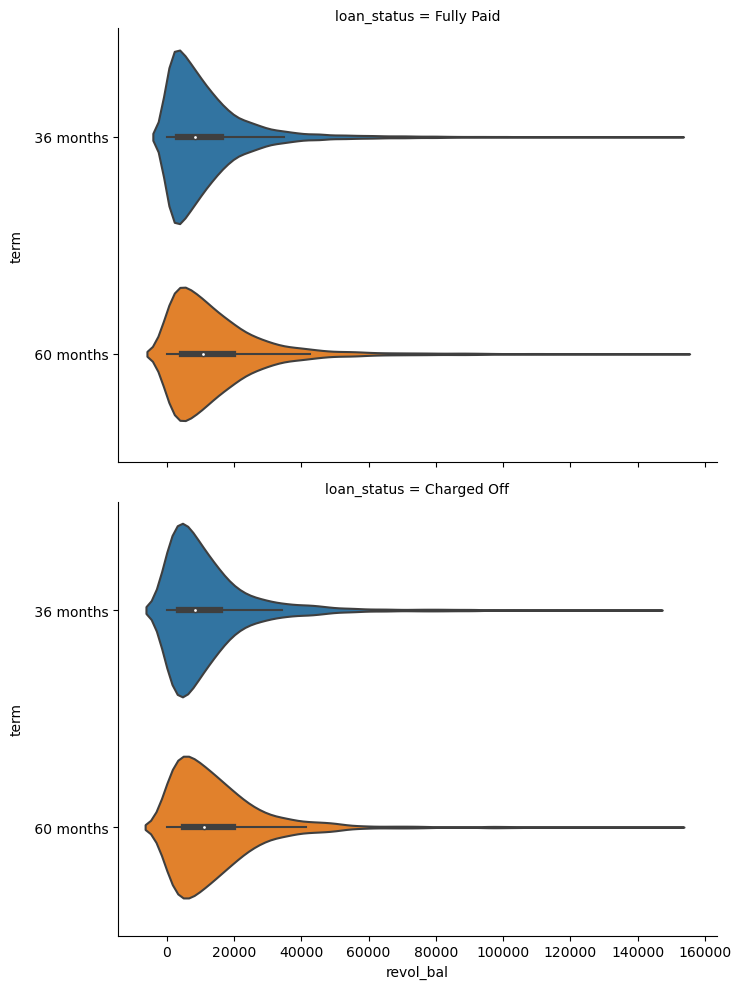

GRADE
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
grade                               
A                 8268.5      6822.0
B                 8349.0      9200.0
C                 9731.0      9192.0
D                 8798.0      9653.0
E                12032.0     11670.0
F                12947.0     12016.0
G                12574.0     14550.0
------------------------------------------------------------





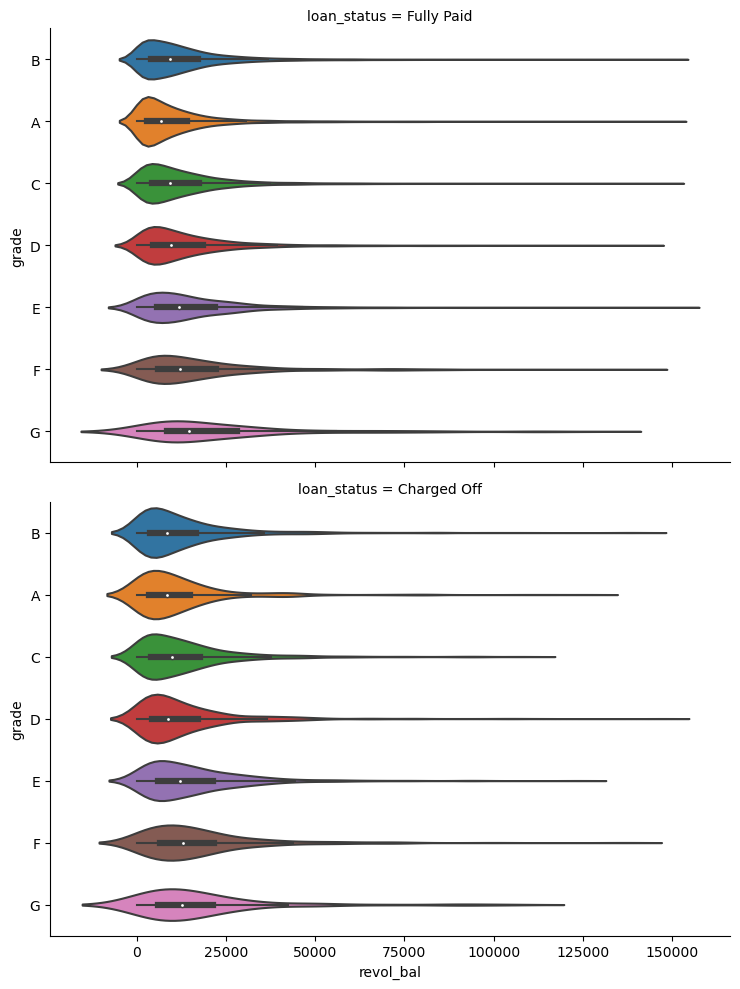

PURPOSE
------------------------------------------------------------
loan_status         Charged Off  Fully Paid
purpose                                    
car                      4883.0      5136.5
credit_card             13742.0     12900.5
debt_consolidation      11001.0     10614.5
educational              4949.0      3524.0
home_improvement         8009.5      6111.0
house                    5920.5      4666.0
major_purchase           4277.0      4172.0
medical                  6721.0      4657.5
moving                   4034.0      4329.5
other                    6161.0      5330.0
renewable_energy         9630.0      6627.5
small_business           7241.5      5926.5
vacation                 6987.0      3710.0
wedding                  7119.0      5119.0
------------------------------------------------------------





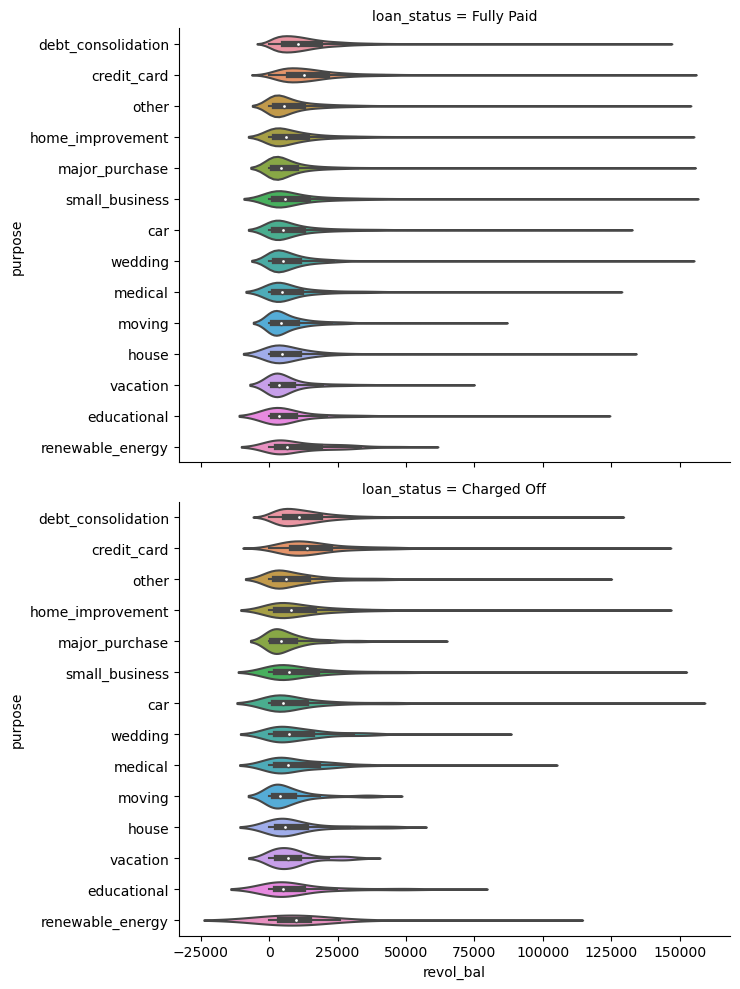

EMP_LENGTH
------------------------------------------------------------
loan_status  Charged Off  Fully Paid
emp_length                          
mid               9152.5      8475.5
new               7725.5      7327.5
old              12246.0     11342.5
------------------------------------------------------------





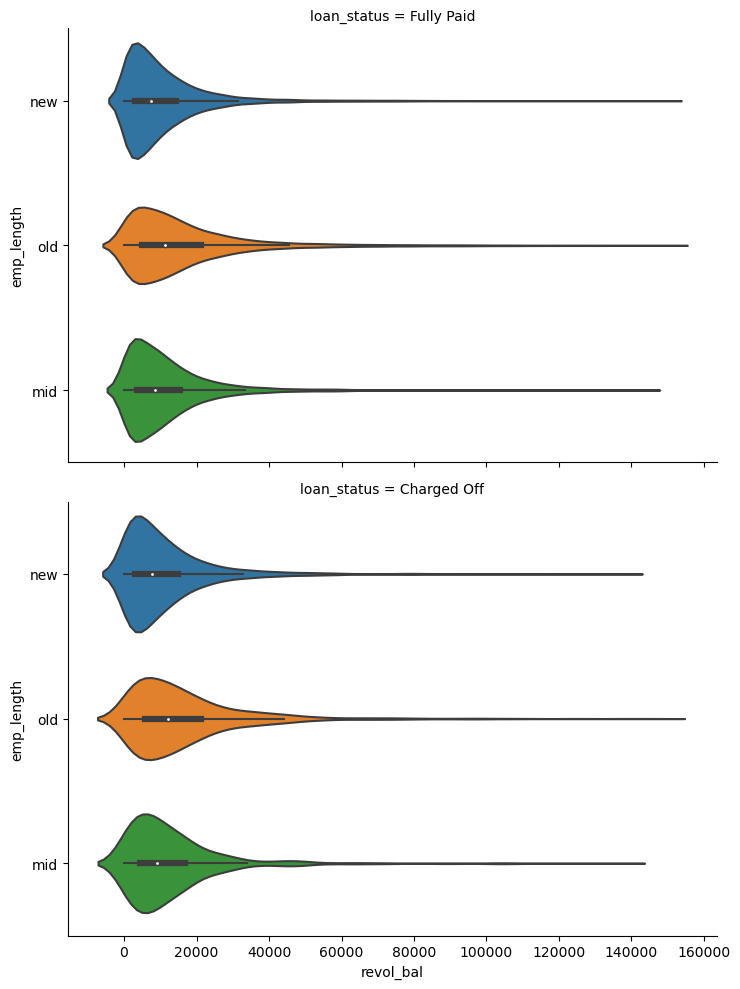

HOME_OWNERSHIP
------------------------------------------------------------
loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE            12703.0     11078.5
OTHER               11613.0      9412.0
OWN                  7366.0      7511.0
RENT                 7712.5      7336.0
------------------------------------------------------------





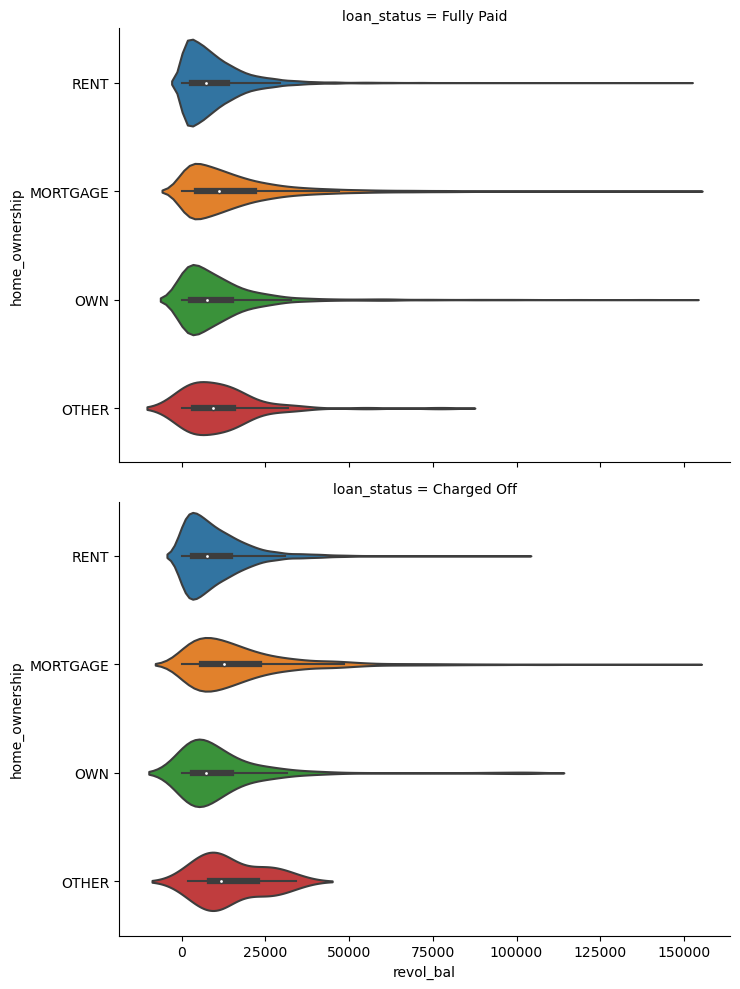

VERIFICATION_STATUS
------------------------------------------------------------
loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified              8641.0      7850.5
Source Verified           7935.5      7503.5
Verified                 12173.0     12184.0
------------------------------------------------------------





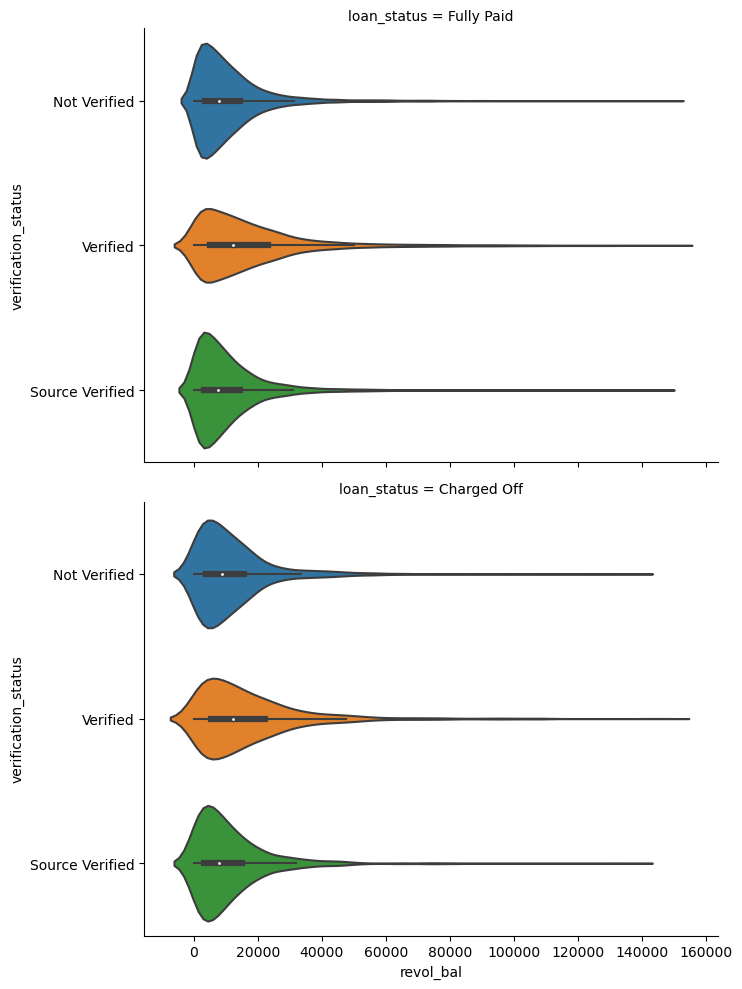

In [36]:
for i in final_cat:
    get_pivot_plots(df, num = 'revol_bal', cat = i)

#### 2.3.8 total_pymnt

In [37]:
draw_pivot(df, 'total_pymnt')

TERM
----------------------------------------------------------------------------------------------------
term           36 months    60 months
loan_status                          
Charged Off  3900.910000   6563.75000
Fully Paid   9345.249613  17388.03001




GRADE
----------------------------------------------------------------------------------------------------
grade                  A            B            C            D             E  \
loan_status                                                                     
Charged Off  3450.230000   4500.77000   4535.79000   4981.68500   6551.050000   
Fully Paid   8215.814726  11163.24319  11156.85421  12815.17832  18697.364275   

grade                  F            G  
loan_status                            
Charged Off   8677.24000   8523.93000  
Fully Paid   22868.77003  30566.04029  




PURPOSE
----------------------------------------------------------------------------------------------------
purpose              car   credit

TERM
------------------------------------------------------------
loan_status  Charged Off    Fully Paid
term                                  
 36 months       3900.91   9345.249613
 60 months       6563.75  17388.030010
------------------------------------------------------------





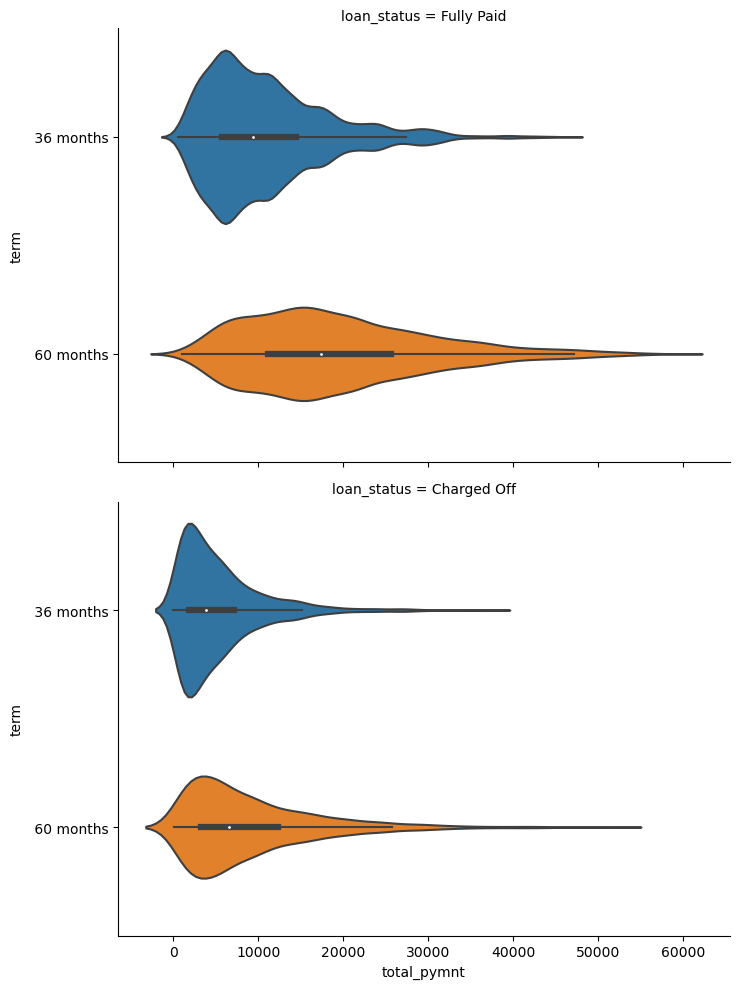

GRADE
------------------------------------------------------------
loan_status  Charged Off    Fully Paid
grade                                 
A               3450.230   8215.814726
B               4500.770  11163.243190
C               4535.790  11156.854210
D               4981.685  12815.178320
E               6551.050  18697.364275
F               8677.240  22868.770030
G               8523.930  30566.040290
------------------------------------------------------------





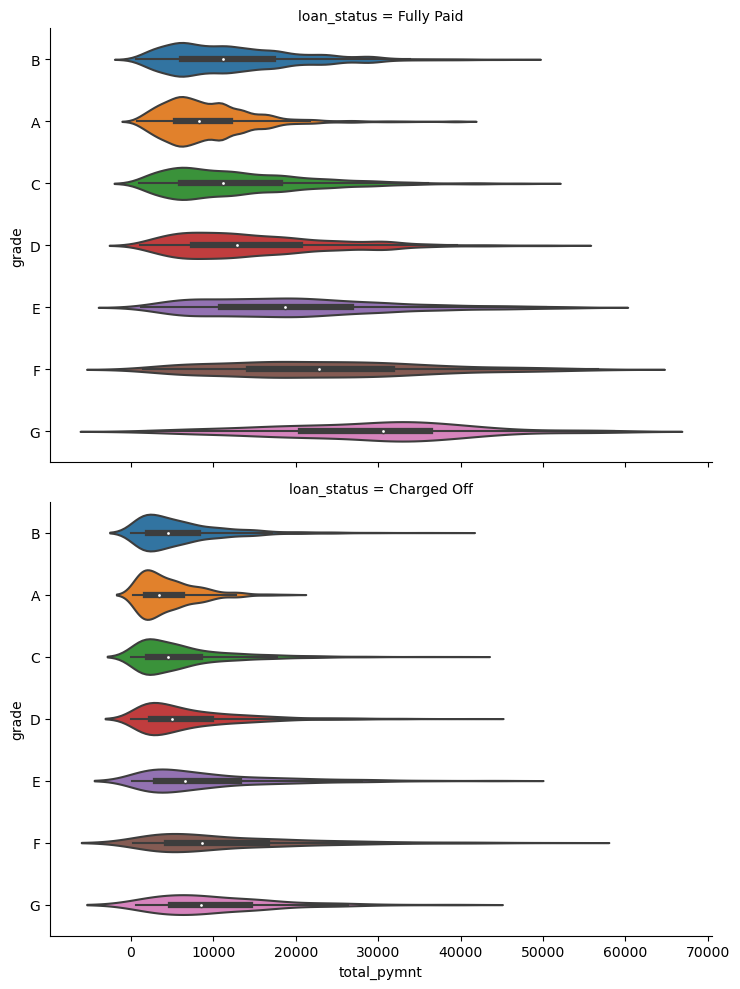

PURPOSE
------------------------------------------------------------
loan_status         Charged Off    Fully Paid
purpose                                      
car                 3213.540000   6621.882483
credit_card         5957.586183  11673.274765
debt_consolidation  5726.745000  12676.157520
educational         3295.240000   6023.866044
home_improvement    4583.920000  10500.621340
house               5159.770000  12376.989410
major_purchase      3487.680000   6960.590002
medical             2357.500000   7083.532452
moving              2693.000000   5706.750138
other               2820.410000   6909.729564
renewable_energy    4379.290000   7609.758524
small_business      5391.615000  12456.807720
vacation            2336.535000   5429.446209
wedding             5311.100000   9507.304180
------------------------------------------------------------





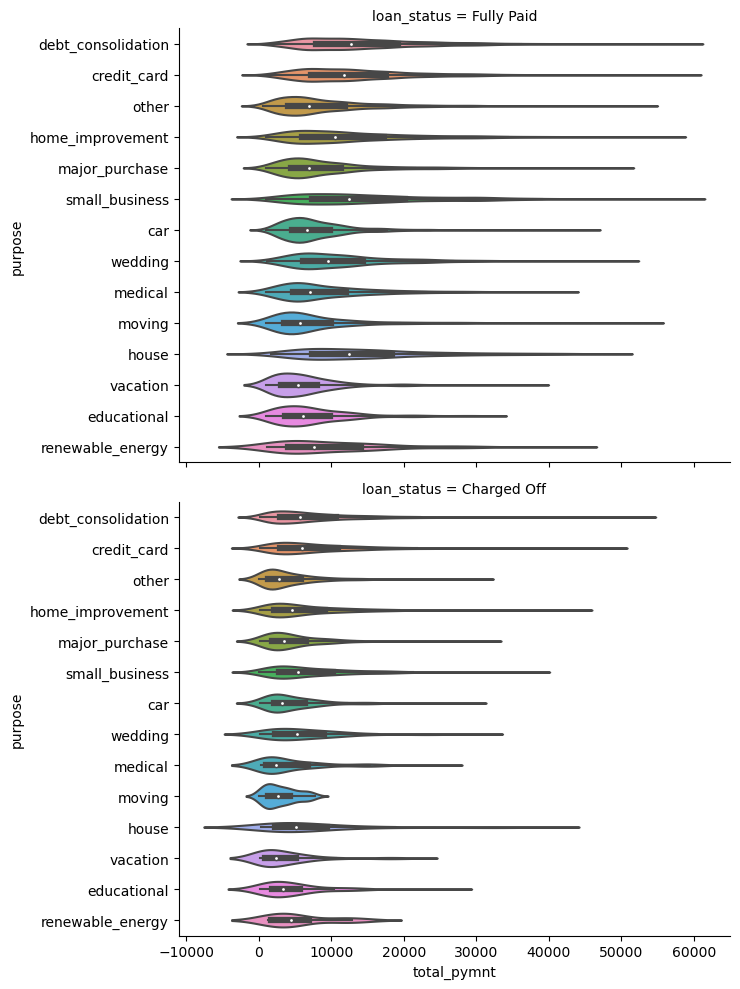

EMP_LENGTH
------------------------------------------------------------
loan_status  Charged Off    Fully Paid
emp_length                            
mid              4822.67  10929.368105
new              4269.01   9638.243640
old              5833.20  11933.882860
------------------------------------------------------------





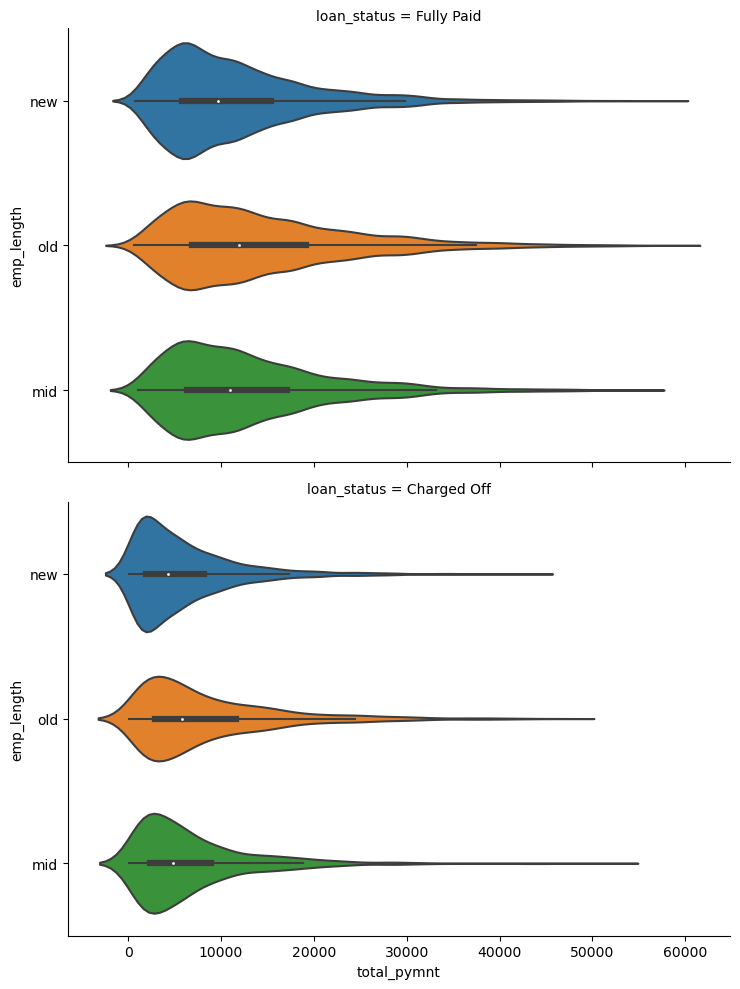

HOME_OWNERSHIP
------------------------------------------------------------
loan_status     Charged Off    Fully Paid
home_ownership                           
MORTGAGE        5835.100000  11933.252655
OTHER           5942.854242   9207.683749
OWN             4540.360000   9672.820810
RENT            4225.820000   9675.919064
------------------------------------------------------------





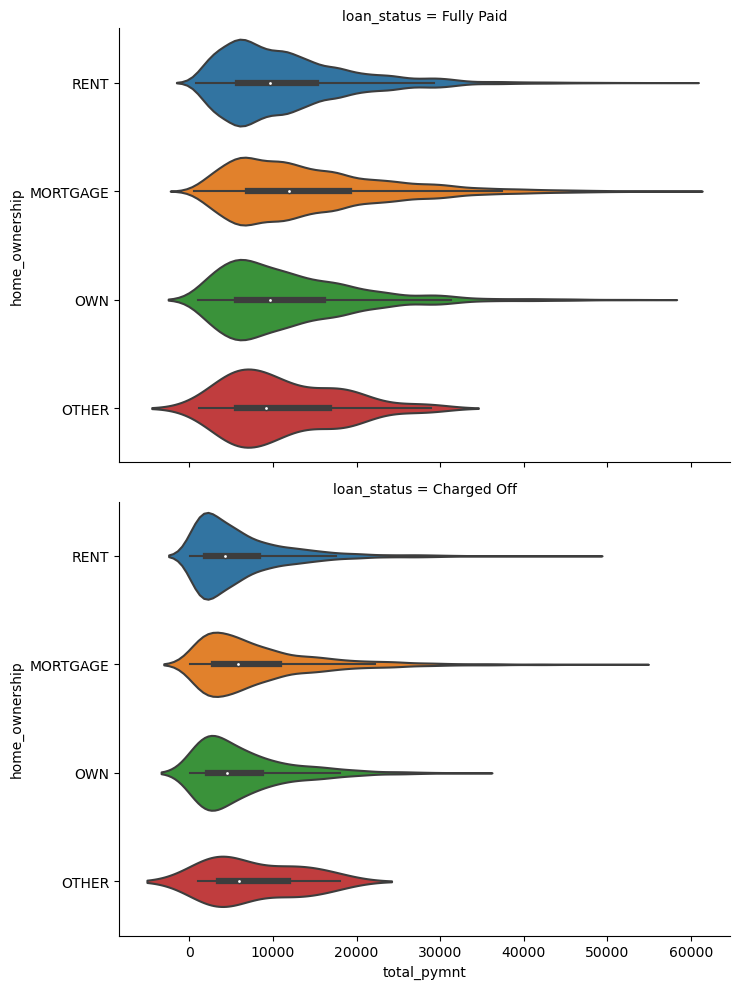

VERIFICATION_STATUS
------------------------------------------------------------
loan_status          Charged Off    Fully Paid
verification_status                           
Not Verified            3629.990   8448.406021
Source Verified         4258.395  10033.559620
Verified                7441.835  16884.153790
------------------------------------------------------------





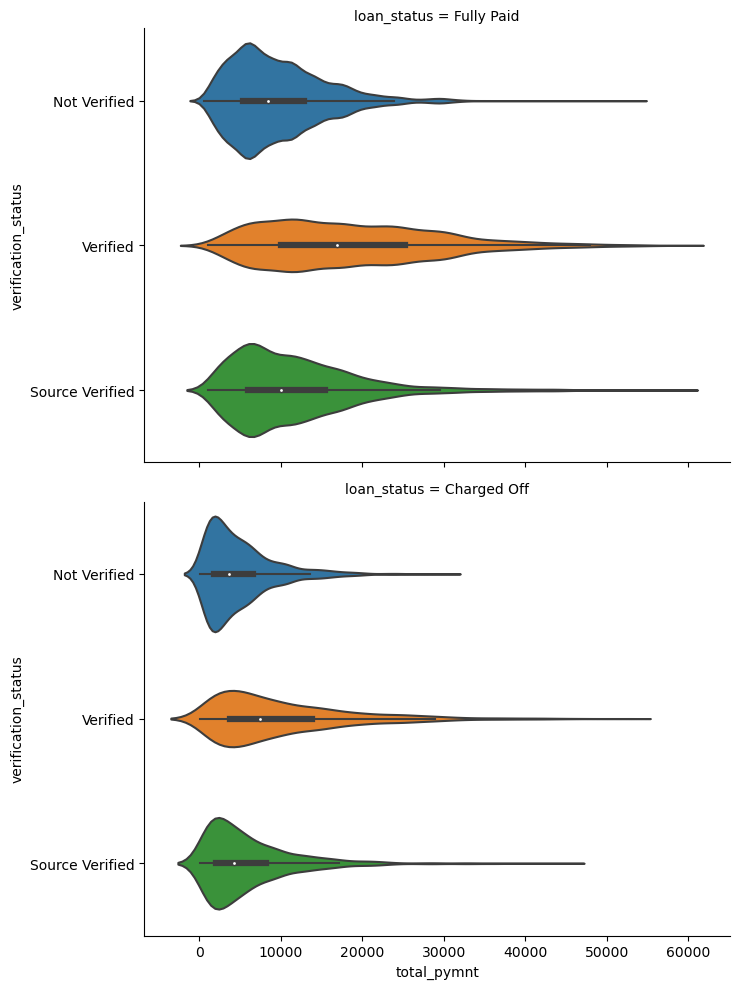

In [38]:
for i in final_cat:
    get_pivot_plots(df, num = 'total_pymnt', cat = i)

In [26]:
for i in final_cat:
    print(i.upper())
    print('--'*50)
    print(pd.pivot_table(df, values = final_num, columns = 'loan_status', index = i,
            aggfunc = np.median))
    print('\n\n')

TERM
----------------------------------------------------------------------------------------------------
             annual_inc                    dti            installment  \
loan_status Charged Off Fully Paid Charged Off Fully Paid Charged Off   
term                                                                    
 36 months      50000.0    58800.0       14.00      12.96     260.950   
 60 months      60000.0    65000.0       14.87      14.24     348.435   

                          int_rate              loan_amnt             \
loan_status Fully Paid Charged Off Fully Paid Charged Off Fully Paid   
term                                                                   
 36 months      264.61      12.530      10.99        8000       8000   
 60 months      318.64      16.005      14.27       15000      14500   

              revol_bal             revol_util            total_pymnt  \
loan_status Charged Off Fully Paid Charged Off Fully Paid Charged Off   
term                 

In [39]:
final_report = pd.pivot_table(df, values = final_num, columns = 'loan_status', index = final_cat,
            aggfunc = np.median)

In [40]:
#final_report.to_csv('final_report.csv', sep = ',', index = True )

#### Analysis:

    Loan amount, interest rate, Dti, revol_bal and revol_util are generally more in each category for charged
    off than those who have fully paid the loans. Whereas, annual income and total payment are high for those
    who have fully paid the loans.
    
    Interest rates are always higher for those who have defaulted.
    
    
    Term:
        loans of 60 months have high median for income, int_rate, total_pymnt, revol_bal, revol_util,
        dti. Also those that have been charged off have low income and payment but high int_rate, dti,
        revol_bal and revol_util.
        
    Grade:
        Grade G loans are highest medians in all numeric. Also charged off loans have comparatively higher 
        int_rate, dti, revol_bal and revol_util, with low income and payment.
        
    Purpose:
        
         Loans for small business, debt_consolidation, home_improvement have highest amounts. They have higher
         income, and interest rates are highest for credit cards. Also charged off loans have low annual income
         but high int_rate, dti, revol_bal and revol_util.
         
         
    Emp_length:
        Older employees have higher loans, higher income, higher payments as well as higher dti.
        But int_rate across employment years are same. Also charged off loans have lower income but higher 
        int_rate, dti, revol_bal and revol_util.
        
    Home_ownership:
        Those that have mortagage have high income, loan amount and revol_bal, but int_rates are 
        similar across home_ownership. Also charged off have higher int_rates, dti, revol_bal
        and revol_util but low income.
        
    Verification status:
        Verified loans are higher in amount, int_rates, income and all other numerics.
        Also charged off loans have comparatively higher 
        int_rate, dti, revol_bal and revol_util, with low income and payment.
    